In [2]:
#Code checked: 09/22/2024, Dumi

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error

# Import the dataset
df = pd.read_csv('new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['mass', 'z','fov','mlt', 'age', 'teff', 'lum']], df['log_k'], test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D input (add an extra dimension for channels)
X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

In [2]:
# Import necessary libraries
from sklearn.metrics import r2_score
import tensorflow.keras.backend as K
import time

from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Define the list of epoch amounts to try, set metrics
set_epochs = 100

losses = []
mses = []
maes = []
r2s = []
set_batch_size = 16

# Define CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])
    
optimizer_selected = SGD(learning_rate=0.1)

# Define R-squared as a custom metric
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the model
model.compile(optimizer=optimizer_selected, loss='mean_squared_error', metrics=['mse', 'mae', r2])

history = model.fit(X_train_reshaped, y_train, epochs=set_epochs, batch_size=set_batch_size, validation_split=0.1)

# Collect metrics for each epoch batch
losses.append(history.history['val_loss'])
mses.append(history.history['val_mse'])
maes.append(history.history['val_mae'])
r2s.append(history.history['val_r2'])

# Plot epoch vs validation loss
x = range(1, set_epochs + 1)
plt.figure()
plt.plot(x, losses[0], label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print results for the SGD optimizer
print("Results with optimizer [SGD] MSE: {} MAE: {} R2: {}".format(mses[0][-1], maes[0][-1], r2s[0][-1]))


/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


InternalError: cudaSetDevice() on GPU:0 failed. Status: out of memory

1526/1879 [=======================>......] - ETA: 0s - loss: 0.0198 - mse: 0.0198 - mae: 0.0908 - r2: 0.5912

1546/1879 [=======================>......] - ETA: 0s - loss: 0.0196 - mse: 0.0196 - mae: 0.0903 - r2: 0.5955

1565/1879 [=======================>......] - ETA: 0s - loss: 0.0194 - mse: 0.0194 - mae: 0.0899 - r2: 0.5987

1583/1879 [========================>.....] - ETA: 0s - loss: 0.0192 - mse: 0.0192 - mae: 0.0894 - r2: 0.6022

1602/1879 [========================>.....] - ETA: 0s - loss: 0.0191 - mse: 0.0191 - mae: 0.0891 - r2: 0.6055

1615/1879 [========================>.....] - ETA: 0s - loss: 0.0190 - mse: 0.0190 - mae: 0.0888 - r2: 0.6079

1634/1879 [=========================>....] - ETA: 0s - loss: 0.0188 - mse: 0.0188 - mae: 0.0883 - r2: 0.6115

1642/1879 [=========================>....] - ETA: 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.0881 - r2: 0.6128

1657/1879 [=========================>....] - ETA: 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.0878 - r2: 0.6155

1676/1879 [=========================>....] - ETA: 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.0875 - r2: 0.6182

1702/1879 [==========================>...] - ETA: 0s - loss: 0.0183 - mse: 0.0183 - mae: 0.0869 - r2: 0.6223

1726/1879 [==========================>...] - ETA: 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.0865 - r2: 0.6261

1746/1879 [==========================>...] - ETA: 0s - loss: 0.0179 - mse: 0.0179 - mae: 0.0860 - r2: 0.6293

1770/1879 [===========================>..] - ETA: 0s - loss: 0.0178 - mse: 0.0178 - mae: 0.0857 - r2: 0.6325

1794/1879 [===========================>..] - ETA: 0s - loss: 0.0176 - mse: 0.0176 - mae: 0.0853 - r2: 0.6357

1819/1879 [============================>.] - ETA: 0s - loss: 0.0175 - mse: 0.0175 - mae: 0.0849 - r2: 0.6391

1843/1879 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173 - mae: 0.0846 - r2: 0.6420

1864/1879 [============================>.] - ETA: 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.0841 - r2: 0.6449

1879/1879 [==============================] - 5s 3ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0839 - r2: 0.6470 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0568 - val_r2: 0.8820


Epoch 2/100


   1/1879 [..............................] - ETA: 6s - loss: 0.0072 - mse: 0.0072 - mae: 0.0631 - r2: 0.8834

  28/1879 [..............................] - ETA: 3s - loss: 0.0049 - mse: 0.0049 - mae: 0.0517 - r2: 0.8955

  50/1879 [..............................] - ETA: 3s - loss: 0.0045 - mse: 0.0045 - mae: 0.0497 - r2: 0.9025

  81/1879 [>.............................] - ETA: 3s - loss: 0.0046 - mse: 0.0046 - mae: 0.0499 - r2: 0.9028

 109/1879 [>.............................] - ETA: 3s - loss: 0.0045 - mse: 0.0045 - mae: 0.0496 - r2: 0.9024

 137/1879 [=>............................] - ETA: 3s - loss: 0.0046 - mse: 0.0046 - mae: 0.0502 - r2: 0.9007

 166/1879 [=>............................] - ETA: 3s - loss: 0.0045 - mse: 0.0045 - mae: 0.0497 - r2: 0.9020

 194/1879 [==>...........................] - ETA: 3s - loss: 0.0046 - mse: 0.0046 - mae: 0.0505 - r2: 0.9004

 225/1879 [==>...........................] - ETA: 3s - loss: 0.0048 - mse: 0.0048 - mae: 0.0512 - r2: 0.8975

 253/1879 [===>..........................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0507 - r2: 0.9001

 281/1879 [===>..........................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0509 - r2: 0.8999

 310/1879 [===>..........................] - ETA: 2s - loss: 0.0050 - mse: 0.0050 - mae: 0.0524 - r2: 0.8943

 337/1879 [====>.........................] - ETA: 2s - loss: 0.0050 - mse: 0.0050 - mae: 0.0526 - r2: 0.8933

 364/1879 [====>.........................] - ETA: 2s - loss: 0.0050 - mse: 0.0050 - mae: 0.0522 - r2: 0.8950

 391/1879 [=====>........................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0518 - r2: 0.8958

 412/1879 [=====>........................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0519 - r2: 0.8950

 439/1879 [======>.......................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0520 - r2: 0.8953

 469/1879 [======>.......................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0518 - r2: 0.8953

 499/1879 [======>.......................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0519 - r2: 0.8948

 528/1879 [=======>......................] - ETA: 2s - loss: 0.0049 - mse: 0.0049 - mae: 0.0517 - r2: 0.8952

 555/1879 [=======>......................] - ETA: 2s - loss: 0.0048 - mse: 0.0048 - mae: 0.0512 - r2: 0.8971

 581/1879 [========>.....................] - ETA: 2s - loss: 0.0048 - mse: 0.0048 - mae: 0.0512 - r2: 0.8963

 613/1879 [========>.....................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0507 - r2: 0.8976

 641/1879 [=========>....................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0506 - r2: 0.8985

 669/1879 [=========>....................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0504 - r2: 0.8992

 697/1879 [==========>...................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0500 - r2: 0.9007

 721/1879 [==========>...................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0502 - r2: 0.9002

 751/1879 [==========>...................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0502 - r2: 0.9001

 776/1879 [===========>..................] - ETA: 2s - loss: 0.0047 - mse: 0.0047 - mae: 0.0501 - r2: 0.9000

 789/1879 [===========>..................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0500 - r2: 0.9006

 805/1879 [===========>..................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0499 - r2: 0.9012

 823/1879 [============>.................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0498 - r2: 0.9013

 838/1879 [============>.................] - ETA: 2s - loss: 0.0046 - mse: 0.0046 - mae: 0.0498 - r2: 0.9013

 861/1879 [============>.................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0497 - r2: 0.9015

 891/1879 [=============>................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0496 - r2: 0.9018

 920/1879 [=============>................] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0495 - r2: 0.9020

 948/1879 [==============>...............] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0493 - r2: 0.9026

 975/1879 [==============>...............] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0490 - r2: 0.9039

1004/1879 [===============>..............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0489 - r2: 0.9048

1032/1879 [===============>..............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0490 - r2: 0.9050

1060/1879 [===============>..............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0489 - r2: 0.9052

1085/1879 [================>.............] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0492 - r2: 0.9044

1111/1879 [================>.............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0490 - r2: 0.9052

1139/1879 [=================>............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0489 - r2: 0.9054

1166/1879 [=================>............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0487 - r2: 0.9061

1190/1879 [=================>............] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0487 - r2: 0.9065

1218/1879 [==================>...........] - ETA: 1s - loss: 0.0044 - mse: 0.0044 - mae: 0.0486 - r2: 0.9067

1247/1879 [==================>...........] - ETA: 1s - loss: 0.0043 - mse: 0.0043 - mae: 0.0485 - r2: 0.9073

1273/1879 [===================>..........] - ETA: 1s - loss: 0.0043 - mse: 0.0043 - mae: 0.0484 - r2: 0.9078

1300/1879 [===================>..........] - ETA: 1s - loss: 0.0043 - mse: 0.0043 - mae: 0.0483 - r2: 0.9082

1326/1879 [====================>.........] - ETA: 1s - loss: 0.0043 - mse: 0.0043 - mae: 0.0482 - r2: 0.9086

1350/1879 [====================>.........] - ETA: 1s - loss: 0.0042 - mse: 0.0042 - mae: 0.0480 - r2: 0.9090

1379/1879 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0480 - r2: 0.9089

1407/1879 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0480 - r2: 0.9091

1436/1879 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0480 - r2: 0.9087

1463/1879 [======================>.......] - ETA: 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0481 - r2: 0.9081

1489/1879 [======================>.......] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0480 - r2: 0.9085

1516/1879 [=======================>......] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0479 - r2: 0.9087

1543/1879 [=======================>......] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0479 - r2: 0.9088

1571/1879 [========================>.....] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0478 - r2: 0.9092

1598/1879 [========================>.....] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0477 - r2: 0.9097

1625/1879 [========================>.....] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0476 - r2: 0.9097

1653/1879 [=========================>....] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0475 - r2: 0.9101

1676/1879 [=========================>....] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0474 - r2: 0.9104

1704/1879 [==========================>...] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0473 - r2: 0.9109

1730/1879 [==========================>...] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0472 - r2: 0.9114

1759/1879 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0470 - r2: 0.9119

1778/1879 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0469 - r2: 0.9122

1805/1879 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0469 - r2: 0.9125

1831/1879 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0468 - r2: 0.9129

1861/1879 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0467 - r2: 0.9130

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0467 - r2: 0.9132 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0366 - val_r2: 0.9432


Epoch 3/100


   1/1879 [..............................] - ETA: 13s - loss: 0.0051 - mse: 0.0051 - mae: 0.0525 - r2: 0.9238

  11/1879 [..............................] - ETA: 9s - loss: 0.0019 - mse: 0.0019 - mae: 0.0328 - r2: 0.9658 

  23/1879 [..............................] - ETA: 8s - loss: 0.0020 - mse: 0.0020 - mae: 0.0338 - r2: 0.9569

  40/1879 [..............................] - ETA: 7s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9474

  60/1879 [..............................] - ETA: 6s - loss: 0.0030 - mse: 0.0030 - mae: 0.0393 - r2: 0.9335

  89/1879 [>.............................] - ETA: 5s - loss: 0.0030 - mse: 0.0030 - mae: 0.0401 - r2: 0.9327

 111/1879 [>.............................] - ETA: 4s - loss: 0.0031 - mse: 0.0031 - mae: 0.0408 - r2: 0.9324

 136/1879 [=>............................] - ETA: 4s - loss: 0.0031 - mse: 0.0031 - mae: 0.0412 - r2: 0.9309

 164/1879 [=>............................] - ETA: 4s - loss: 0.0031 - mse: 0.0031 - mae: 0.0410 - r2: 0.9298

 192/1879 [==>...........................] - ETA: 4s - loss: 0.0031 - mse: 0.0031 - mae: 0.0414 - r2: 0.9303

 218/1879 [==>...........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0411 - r2: 0.9311

 243/1879 [==>...........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0415 - r2: 0.9304

 272/1879 [===>..........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0416 - r2: 0.9306

 297/1879 [===>..........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0412 - r2: 0.9319

 313/1879 [===>..........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0412 - r2: 0.9325

 324/1879 [====>.........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0410 - r2: 0.9332

 346/1879 [====>.........................] - ETA: 3s - loss: 0.0031 - mse: 0.0031 - mae: 0.0410 - r2: 0.9338

 369/1879 [====>.........................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0409 - r2: 0.9341

 396/1879 [=====>........................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9347

 422/1879 [=====>........................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9349

 448/1879 [======>.......................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9347

 475/1879 [======>.......................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9351

 503/1879 [=======>......................] - ETA: 3s - loss: 0.0029 - mse: 0.0029 - mae: 0.0401 - r2: 0.9363

 531/1879 [=======>......................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0403 - r2: 0.9360

 556/1879 [=======>......................] - ETA: 2s - loss: 0.0029 - mse: 0.0029 - mae: 0.0401 - r2: 0.9367

 575/1879 [========>.....................] - ETA: 2s - loss: 0.0029 - mse: 0.0029 - mae: 0.0399 - r2: 0.9374

 581/1879 [========>.....................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0402 - r2: 0.9358

 595/1879 [========>.....................] - ETA: 3s - loss: 0.0030 - mse: 0.0030 - mae: 0.0403 - r2: 0.9357

 619/1879 [========>.....................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0403 - r2: 0.9358

 646/1879 [=========>....................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0403 - r2: 0.9359

 675/1879 [=========>....................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9354

 700/1879 [==========>...................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9355

 726/1879 [==========>...................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9357

 750/1879 [==========>...................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9359

 766/1879 [===========>..................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9355

 782/1879 [===========>..................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9358

 800/1879 [===========>..................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0404 - r2: 0.9364

 829/1879 [============>.................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0406 - r2: 0.9359

 851/1879 [============>.................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0405 - r2: 0.9358

 880/1879 [=============>................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0404 - r2: 0.9363

 907/1879 [=============>................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0403 - r2: 0.9366

 935/1879 [=============>................] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0402 - r2: 0.9365

 963/1879 [==============>...............] - ETA: 2s - loss: 0.0030 - mse: 0.0030 - mae: 0.0401 - r2: 0.9367

 987/1879 [==============>...............] - ETA: 2s - loss: 0.0029 - mse: 0.0029 - mae: 0.0400 - r2: 0.9370

1012/1879 [===============>..............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0400 - r2: 0.9372

1039/1879 [===============>..............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0398 - r2: 0.9375

1064/1879 [===============>..............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0398 - r2: 0.9377

1091/1879 [================>.............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0399 - r2: 0.9375

1110/1879 [================>.............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0398 - r2: 0.9375

1136/1879 [=================>............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0398 - r2: 0.9375

1164/1879 [=================>............] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0397 - r2: 0.9379

1192/1879 [==================>...........] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0396 - r2: 0.9381

1218/1879 [==================>...........] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0396 - r2: 0.9382

1246/1879 [==================>...........] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0396 - r2: 0.9382

1274/1879 [===================>..........] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0394 - r2: 0.9387

1301/1879 [===================>..........] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0394 - r2: 0.9388

1328/1879 [====================>.........] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0393 - r2: 0.9389

1354/1879 [====================>.........] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0393 - r2: 0.9389

1383/1879 [=====================>........] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - r2: 0.9392

1408/1879 [=====================>........] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - r2: 0.9394

1435/1879 [=====================>........] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - r2: 0.9395

1462/1879 [======================>.......] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - r2: 0.9396

1491/1879 [======================>.......] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - r2: 0.9395

1515/1879 [=======================>......] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9397

1542/1879 [=======================>......] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9396

1567/1879 [========================>.....] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9398

1595/1879 [========================>.....] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9398

1624/1879 [========================>.....] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9399

1651/1879 [=========================>....] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0391 - r2: 0.9401

1679/1879 [=========================>....] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0390 - r2: 0.9403

1704/1879 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0390 - r2: 0.9404

1723/1879 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0390 - r2: 0.9405

1744/1879 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0390 - r2: 0.9404

1770/1879 [===========================>..] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0389 - r2: 0.9406

1797/1879 [===========================>..] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0389 - r2: 0.9407

1824/1879 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0388 - r2: 0.9409

1852/1879 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0388 - r2: 0.9411

1879/1879 [==============================] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0388 - r2: 0.9410

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0388 - r2: 0.9410 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0392 - val_r2: 0.9426


Epoch 4/100


   1/1879 [..............................] - ETA: 6s - loss: 0.0022 - mse: 0.0022 - mae: 0.0415 - r2: 0.9614

  28/1879 [..............................] - ETA: 3s - loss: 0.0021 - mse: 0.0021 - mae: 0.0349 - r2: 0.9440

  54/1879 [..............................] - ETA: 3s - loss: 0.0022 - mse: 0.0022 - mae: 0.0355 - r2: 0.9444

  82/1879 [>.............................] - ETA: 3s - loss: 0.0022 - mse: 0.0022 - mae: 0.0351 - r2: 0.9467

 111/1879 [>.............................] - ETA: 3s - loss: 0.0023 - mse: 0.0023 - mae: 0.0357 - r2: 0.9442

 139/1879 [=>............................] - ETA: 3s - loss: 0.0023 - mse: 0.0023 - mae: 0.0354 - r2: 0.9460

 168/1879 [=>............................] - ETA: 3s - loss: 0.0023 - mse: 0.0023 - mae: 0.0355 - r2: 0.9464

 196/1879 [==>...........................] - ETA: 3s - loss: 0.0023 - mse: 0.0023 - mae: 0.0355 - r2: 0.9469

 222/1879 [==>...........................] - ETA: 3s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9485

 250/1879 [==>...........................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9490

 277/1879 [===>..........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9474

 300/1879 [===>..........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0363 - r2: 0.9465

 327/1879 [====>.........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0364 - r2: 0.9462

 354/1879 [====>.........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0363 - r2: 0.9469

 380/1879 [=====>........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0361 - r2: 0.9473

 401/1879 [=====>........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9477

 416/1879 [=====>........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9480

 430/1879 [=====>........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9483

 451/1879 [======>.......................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0360 - r2: 0.9481

 472/1879 [======>.......................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0359 - r2: 0.9485

 499/1879 [======>.......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0358 - r2: 0.9489

 523/1879 [=======>......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0356 - r2: 0.9488

 552/1879 [=======>......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0356 - r2: 0.9489

 575/1879 [========>.....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0358 - r2: 0.9485

 589/1879 [========>.....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0358 - r2: 0.9486

 600/1879 [========>.....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0359 - r2: 0.9485

 622/1879 [========>.....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0358 - r2: 0.9487

 642/1879 [=========>....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0356 - r2: 0.9492

 657/1879 [=========>....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0356 - r2: 0.9493

 674/1879 [=========>....................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9500

 691/1879 [==========>...................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9503

 721/1879 [==========>...................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9508

 748/1879 [==========>...................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9508

 775/1879 [===========>..................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9507

 805/1879 [===========>..................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9505

 835/1879 [============>.................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9506

 861/1879 [============>.................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9507

 887/1879 [=============>................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - r2: 0.9506

 914/1879 [=============>................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9505

 941/1879 [==============>...............] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0352 - r2: 0.9507

 970/1879 [==============>...............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9509

 995/1879 [==============>...............] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0351 - r2: 0.9510

1013/1879 [===============>..............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9513

1033/1879 [===============>..............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9513

1063/1879 [===============>..............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9516

1091/1879 [================>.............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9515

1105/1879 [================>.............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9517

1118/1879 [================>.............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0349 - r2: 0.9518

1145/1879 [=================>............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9516

1170/1879 [=================>............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9515

1196/1879 [==================>...........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - r2: 0.9515

1226/1879 [==================>...........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0349 - r2: 0.9517

1254/1879 [===================>..........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0348 - r2: 0.9519

1283/1879 [===================>..........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0348 - r2: 0.9521

1311/1879 [===================>..........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0347 - r2: 0.9523

1339/1879 [====================>.........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0347 - r2: 0.9524

1367/1879 [====================>.........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0347 - r2: 0.9524

1395/1879 [=====================>........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0346 - r2: 0.9525

1422/1879 [=====================>........] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0346 - r2: 0.9528

1447/1879 [======================>.......] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0345 - r2: 0.9530

1475/1879 [======================>.......] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0344 - r2: 0.9531

1503/1879 [======================>.......] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0343 - r2: 0.9534

1530/1879 [=======================>......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9535

1560/1879 [=======================>......] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0344 - r2: 0.9534

1589/1879 [========================>.....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9535

1619/1879 [========================>.....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9537

1649/1879 [=========================>....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9538

1677/1879 [=========================>....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9538

1705/1879 [==========================>...] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9539

1734/1879 [==========================>...] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9538

1761/1879 [===========================>..] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9535

1789/1879 [===========================>..] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9535

1818/1879 [============================>.] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9535

1838/1879 [============================>.] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9536

1866/1879 [============================>.] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0343 - r2: 0.9536

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0344 - r2: 0.9534 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0840 - val_r2: 0.8036


Epoch 5/100


   1/1879 [..............................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0796 - r2: 0.8767

  27/1879 [..............................] - ETA: 3s - loss: 0.0021 - mse: 0.0021 - mae: 0.0346 - r2: 0.9591

  33/1879 [..............................] - ETA: 6s - loss: 0.0024 - mse: 0.0024 - mae: 0.0369 - r2: 0.9535

  51/1879 [..............................] - ETA: 5s - loss: 0.0021 - mse: 0.0021 - mae: 0.0347 - r2: 0.9559

  76/1879 [>.............................] - ETA: 5s - loss: 0.0021 - mse: 0.0021 - mae: 0.0342 - r2: 0.9574

 105/1879 [>.............................] - ETA: 4s - loss: 0.0020 - mse: 0.0020 - mae: 0.0336 - r2: 0.9575

 133/1879 [=>............................] - ETA: 4s - loss: 0.0019 - mse: 0.0019 - mae: 0.0327 - r2: 0.9591

 161/1879 [=>............................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0332 - r2: 0.9588

 185/1879 [=>............................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0335 - r2: 0.9581

 201/1879 [==>...........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0334 - r2: 0.9574

 217/1879 [==>...........................] - ETA: 3s - loss: 0.0021 - mse: 0.0021 - mae: 0.0337 - r2: 0.9568

 237/1879 [==>...........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0334 - r2: 0.9568

 266/1879 [===>..........................] - ETA: 3s - loss: 0.0021 - mse: 0.0021 - mae: 0.0338 - r2: 0.9560

 288/1879 [===>..........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0337 - r2: 0.9565

 315/1879 [====>.........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0336 - r2: 0.9565

 336/1879 [====>.........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0334 - r2: 0.9567

 361/1879 [====>.........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0333 - r2: 0.9571

 385/1879 [=====>........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0331 - r2: 0.9578

 403/1879 [=====>........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0331 - r2: 0.9578

 429/1879 [=====>........................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0335 - r2: 0.9574

 458/1879 [======>.......................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0332 - r2: 0.9577

 485/1879 [======>.......................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0330 - r2: 0.9581

 513/1879 [=======>......................] - ETA: 3s - loss: 0.0020 - mse: 0.0020 - mae: 0.0332 - r2: 0.9580

 539/1879 [=======>......................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0330 - r2: 0.9583

 565/1879 [========>.....................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0330 - r2: 0.9580

 592/1879 [========>.....................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0332 - r2: 0.9574

 610/1879 [========>.....................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0331 - r2: 0.9575

 636/1879 [=========>....................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0331 - r2: 0.9574

 663/1879 [=========>....................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0331 - r2: 0.9575

 689/1879 [==========>...................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0328 - r2: 0.9579

 717/1879 [==========>...................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0328 - r2: 0.9581

 746/1879 [==========>...................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0327 - r2: 0.9585

 771/1879 [===========>..................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0325 - r2: 0.9589

 799/1879 [===========>..................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0326 - r2: 0.9589

 827/1879 [============>.................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0325 - r2: 0.9592

 833/1879 [============>.................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0325 - r2: 0.9593

 852/1879 [============>.................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0325 - r2: 0.9592

 878/1879 [=============>................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0324 - r2: 0.9595

 900/1879 [=============>................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0324 - r2: 0.9594

 924/1879 [=============>................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0324 - r2: 0.9595

 952/1879 [==============>...............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0323 - r2: 0.9596

 975/1879 [==============>...............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0323 - r2: 0.9597

1004/1879 [===============>..............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0322 - r2: 0.9597

1034/1879 [===============>..............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0321 - r2: 0.9600

1062/1879 [===============>..............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0320 - r2: 0.9603

1089/1879 [================>.............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9604

1115/1879 [================>.............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0320 - r2: 0.9603

1137/1879 [=================>............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0320 - r2: 0.9602

1158/1879 [=================>............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0320 - r2: 0.9602

1181/1879 [=================>............] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9603

1207/1879 [==================>...........] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9606

1234/1879 [==================>...........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - r2: 0.9607

1264/1879 [===================>..........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - r2: 0.9608

1294/1879 [===================>..........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - r2: 0.9609

1320/1879 [====================>.........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9611

1340/1879 [====================>.........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9611

1366/1879 [====================>.........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9611

1389/1879 [=====================>........] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0317 - r2: 0.9611

1412/1879 [=====================>........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0317 - r2: 0.9611

1436/1879 [=====================>........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9613

1464/1879 [======================>.......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1493/1879 [======================>.......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1515/1879 [=======================>......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9611

1531/1879 [=======================>......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1545/1879 [=======================>......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9613

1554/1879 [=======================>......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1570/1879 [========================>.....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9613

1587/1879 [========================>.....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1609/1879 [========================>.....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0317 - r2: 0.9611

1636/1879 [=========================>....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0316 - r2: 0.9612

1662/1879 [=========================>....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0317 - r2: 0.9610

1689/1879 [=========================>....] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - r2: 0.9609

1717/1879 [==========================>...] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0319 - r2: 0.9607

1745/1879 [==========================>...] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0320 - r2: 0.9605

1772/1879 [===========================>..] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9605

1800/1879 [===========================>..] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0319 - r2: 0.9606

1830/1879 [============================>.] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9604

1858/1879 [============================>.] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9606

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0319 - r2: 0.9607 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0267 - val_r2: 0.9702


Epoch 6/100


   1/1879 [..............................] - ETA: 9s - loss: 0.0013 - mse: 0.0013 - mae: 0.0299 - r2: 0.9740

  26/1879 [..............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0294 - r2: 0.9685

  54/1879 [..............................] - ETA: 3s - loss: 0.0017 - mse: 0.0017 - mae: 0.0311 - r2: 0.9642

  71/1879 [>.............................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0304 - r2: 0.9652

  95/1879 [>.............................] - ETA: 3s - loss: 0.0017 - mse: 0.0017 - mae: 0.0314 - r2: 0.9632

 122/1879 [>.............................] - ETA: 3s - loss: 0.0017 - mse: 0.0017 - mae: 0.0311 - r2: 0.9623

 150/1879 [=>............................] - ETA: 3s - loss: 0.0017 - mse: 0.0017 - mae: 0.0306 - r2: 0.9636

 177/1879 [=>............................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0302 - r2: 0.9643

 203/1879 [==>...........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9659

 232/1879 [==>...........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0302 - r2: 0.9646

 261/1879 [===>..........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0299 - r2: 0.9647

 281/1879 [===>..........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0298 - r2: 0.9651

 310/1879 [===>..........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9656

 338/1879 [====>.........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0294 - r2: 0.9659

 364/1879 [====>.........................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9655

 389/1879 [=====>........................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9655

 401/1879 [=====>........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9654

 421/1879 [=====>........................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0297 - r2: 0.9649

 443/1879 [======>.......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0297 - r2: 0.9649

 469/1879 [======>.......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9651

 496/1879 [======>.......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9655

 510/1879 [=======>......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9652

 526/1879 [=======>......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - r2: 0.9652

 554/1879 [=======>......................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0294 - r2: 0.9654

 584/1879 [========>.....................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9654

 610/1879 [========>.....................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9653

 636/1879 [=========>....................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - r2: 0.9655

 665/1879 [=========>....................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0294 - r2: 0.9653

 689/1879 [==========>...................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0293 - r2: 0.9655

 717/1879 [==========>...................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0292 - r2: 0.9660

 744/1879 [==========>...................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0292 - r2: 0.9660

 773/1879 [===========>..................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0293 - r2: 0.9657

 801/1879 [===========>..................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0292 - r2: 0.9661

 821/1879 [============>.................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9664

 840/1879 [============>.................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9665

 856/1879 [============>.................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9665

 882/1879 [=============>................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9666

 912/1879 [=============>................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9664

 938/1879 [=============>................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9666

 967/1879 [==============>...............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9668

 993/1879 [==============>...............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9667

1021/1879 [===============>..............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9669

1050/1879 [===============>..............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1079/1879 [================>.............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1092/1879 [================>.............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1111/1879 [================>.............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9669

1136/1879 [=================>............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9668

1155/1879 [=================>............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9669

1175/1879 [=================>............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1193/1879 [==================>...........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9671

1216/1879 [==================>...........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9669

1243/1879 [==================>...........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9668

1269/1879 [===================>..........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9668

1292/1879 [===================>..........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9667

1308/1879 [===================>..........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0291 - r2: 0.9667

1331/1879 [====================>.........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9669

1347/1879 [====================>.........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9669

1373/1879 [====================>.........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9669

1399/1879 [=====================>........] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1426/1879 [=====================>........] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1437/1879 [=====================>........] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1462/1879 [======================>.......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9672

1488/1879 [======================>.......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9672

1514/1879 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9672

1532/1879 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9672

1548/1879 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1559/1879 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1575/1879 [========================>.....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1601/1879 [========================>.....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1626/1879 [========================>.....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9671

1652/1879 [=========================>....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9672

1679/1879 [=========================>....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9672

1687/1879 [=========================>....] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9672

1702/1879 [==========================>...] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1729/1879 [==========================>...] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671

1756/1879 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1785/1879 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9672

1812/1879 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0289 - r2: 0.9672

1839/1879 [============================>.] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1859/1879 [============================>.] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9670

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - r2: 0.9671 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0287 - val_r2: 0.9663


Epoch 7/100


   1/1879 [..............................] - ETA: 7s - loss: 0.0010 - mse: 0.0010 - mae: 0.0295 - r2: 0.9833

  30/1879 [..............................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0276 - r2: 0.9721

  59/1879 [..............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0283 - r2: 0.9695

  86/1879 [>.............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0281 - r2: 0.9696

 111/1879 [>.............................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0287 - r2: 0.9676

 138/1879 [=>............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0285 - r2: 0.9687

 165/1879 [=>............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0284 - r2: 0.9694

 188/1879 [==>...........................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0286 - r2: 0.9687

 214/1879 [==>...........................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0286 - r2: 0.9689

 240/1879 [==>...........................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0282 - r2: 0.9696

 267/1879 [===>..........................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0281 - r2: 0.9699

 295/1879 [===>..........................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0282 - r2: 0.9698

 320/1879 [====>.........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0282 - r2: 0.9698

 329/1879 [====>.........................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0281 - r2: 0.9700

 344/1879 [====>.........................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0282 - r2: 0.9697

 370/1879 [====>.........................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0285 - r2: 0.9689

 398/1879 [=====>........................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0284 - r2: 0.9690

 425/1879 [=====>........................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0285 - r2: 0.9690

 445/1879 [======>.......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0283 - r2: 0.9695

 474/1879 [======>.......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0283 - r2: 0.9692

 500/1879 [======>.......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0282 - r2: 0.9693

 522/1879 [=======>......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0282 - r2: 0.9692

 548/1879 [=======>......................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0280 - r2: 0.9696

 578/1879 [========>.....................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0280 - r2: 0.9696

 606/1879 [========>.....................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0280 - r2: 0.9698

 636/1879 [=========>....................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - r2: 0.9700

 662/1879 [=========>....................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - r2: 0.9701

 690/1879 [==========>...................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - r2: 0.9699

 718/1879 [==========>...................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - r2: 0.9700

 743/1879 [==========>...................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - r2: 0.9700

 771/1879 [===========>..................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - r2: 0.9701

 798/1879 [===========>..................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0276 - r2: 0.9704

 826/1879 [============>.................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0276 - r2: 0.9703

 854/1879 [============>.................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0276 - r2: 0.9705

 882/1879 [=============>................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9706

 908/1879 [=============>................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9704

 931/1879 [=============>................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9704

 957/1879 [==============>...............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9704

 980/1879 [==============>...............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9702

 995/1879 [==============>...............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9702

1014/1879 [===============>..............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9703

1033/1879 [===============>..............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9701

1057/1879 [===============>..............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9702

1083/1879 [================>.............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9705

1112/1879 [================>.............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9706

1139/1879 [=================>............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9704

1167/1879 [=================>............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9704

1184/1879 [=================>............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9704

1204/1879 [==================>...........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9705

1233/1879 [==================>...........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0272 - r2: 0.9708

1261/1879 [===================>..........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9709

1284/1879 [===================>..........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0271 - r2: 0.9707

1309/1879 [===================>..........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0272 - r2: 0.9707

1335/1879 [====================>.........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9708

1360/1879 [====================>.........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9708

1388/1879 [=====================>........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0272 - r2: 0.9708

1418/1879 [=====================>........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0271 - r2: 0.9708

1447/1879 [======================>.......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9709

1475/1879 [======================>.......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9710

1504/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9712

1525/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9710

1552/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9711

1581/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9711

1593/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9710

1609/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9708

1636/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9708

1662/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9709

1690/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9709

1717/1879 [==========================>...] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9710

1745/1879 [==========================>...] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9710

1774/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9710

1799/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9711

1828/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9712

1847/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9712

1873/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9712

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9712 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0247 - val_r2: 0.9754


Epoch 8/100


   1/1879 [..............................] - ETA: 11s - loss: 0.0020 - mse: 0.0020 - mae: 0.0310 - r2: 0.9581

  25/1879 [..............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0294 - r2: 0.9654 

  50/1879 [..............................] - ETA: 3s - loss: 0.0016 - mse: 0.0016 - mae: 0.0297 - r2: 0.9630

  76/1879 [>.............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0287 - r2: 0.9666

 103/1879 [>.............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0288 - r2: 0.9661

 132/1879 [=>............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0284 - r2: 0.9677

 145/1879 [=>............................] - ETA: 3s - loss: 0.0015 - mse: 0.0015 - mae: 0.0283 - r2: 0.9680

 159/1879 [=>............................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9683

 174/1879 [=>............................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0284 - r2: 0.9683

 180/1879 [=>............................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0281 - r2: 0.9687

 194/1879 [==>...........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0279 - r2: 0.9685

 210/1879 [==>...........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0281 - r2: 0.9686

 221/1879 [==>...........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - r2: 0.9692

 236/1879 [==>...........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0279 - r2: 0.9690

 246/1879 [==>...........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - r2: 0.9691

 258/1879 [===>..........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9698

 272/1879 [===>..........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9700

 289/1879 [===>..........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9699

 308/1879 [===>..........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9698

 326/1879 [====>.........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0272 - r2: 0.9702

 354/1879 [====>.........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0276 - r2: 0.9696

 373/1879 [====>.........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9697

 396/1879 [=====>........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0275 - r2: 0.9698

 421/1879 [=====>........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9702

 437/1879 [=====>........................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9702

 450/1879 [======>.......................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9704

 467/1879 [======>.......................] - ETA: 4s - loss: 0.0013 - mse: 0.0013 - mae: 0.0272 - r2: 0.9705

 490/1879 [======>.......................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0273 - r2: 0.9707

 514/1879 [=======>......................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9706

 519/1879 [=======>......................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - r2: 0.9705

 537/1879 [=======>......................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0273 - r2: 0.9706

 557/1879 [=======>......................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9704

 577/1879 [========>.....................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0273 - r2: 0.9707

 592/1879 [========>.....................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0272 - r2: 0.9709

 606/1879 [========>.....................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9707

 632/1879 [=========>....................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0273 - r2: 0.9707

 652/1879 [=========>....................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0273 - r2: 0.9706

 679/1879 [=========>....................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0272 - r2: 0.9708

 703/1879 [==========>...................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0271 - r2: 0.9710

 726/1879 [==========>...................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9714

 749/1879 [==========>...................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9715

 768/1879 [===========>..................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9717

 793/1879 [===========>..................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9718

 818/1879 [============>.................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9719

 842/1879 [============>.................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9718

 865/1879 [============>.................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9718

 885/1879 [=============>................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9719

 908/1879 [=============>................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9715

 927/1879 [=============>................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9716

 940/1879 [==============>...............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9716

 954/1879 [==============>...............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9716

 968/1879 [==============>...............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9717

 990/1879 [==============>...............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - r2: 0.9718

1001/1879 [==============>...............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9718

1018/1879 [===============>..............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - r2: 0.9718

1042/1879 [===============>..............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - r2: 0.9720

1058/1879 [===============>..............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - r2: 0.9720

1075/1879 [================>.............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - r2: 0.9720

1091/1879 [================>.............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - r2: 0.9720

1105/1879 [================>.............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9721

1121/1879 [================>.............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9721

1137/1879 [=================>............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9722

1152/1879 [=================>............] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9722

1169/1879 [=================>............] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9722

1190/1879 [=================>............] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9723

1210/1879 [==================>...........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1224/1879 [==================>...........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9721

1250/1879 [==================>...........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9723

1269/1879 [===================>..........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1284/1879 [===================>..........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9725

1299/1879 [===================>..........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9726

1310/1879 [===================>..........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1319/1879 [====================>.........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1340/1879 [====================>.........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9723

1362/1879 [====================>.........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1386/1879 [=====================>........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9725

1403/1879 [=====================>........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1425/1879 [=====================>........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1436/1879 [=====================>........] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1451/1879 [======================>.......] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1464/1879 [======================>.......] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9725

1487/1879 [======================>.......] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9725

1509/1879 [=======================>......] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1527/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1546/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1562/1879 [=======================>......] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1577/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1588/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1605/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - r2: 0.9724

1622/1879 [========================>.....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1638/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1653/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1665/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1679/1879 [=========================>....] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1696/1879 [==========================>...] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1711/1879 [==========================>...] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1736/1879 [==========================>...] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1755/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1771/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1786/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1794/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1813/1879 [===========================>..] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1832/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9724

1852/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1873/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725

1879/1879 [==============================] - 6s 3ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0264 - r2: 0.9725 - val_loss: 9.2390e-04 - val_mse: 9.2390e-04 - val_mae: 0.0217 - val_r2: 0.9796


Epoch 9/100


   1/1879 [..............................] - ETA: 11s - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - r2: 0.9641

  14/1879 [..............................] - ETA: 7s - loss: 0.0014 - mse: 0.0014 - mae: 0.0279 - r2: 0.9735 

  27/1879 [..............................] - ETA: 7s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9775

  40/1879 [..............................] - ETA: 7s - loss: 0.0011 - mse: 0.0011 - mae: 0.0243 - r2: 0.9775

  55/1879 [..............................] - ETA: 6s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9774

  74/1879 [>.............................] - ETA: 6s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9767

  91/1879 [>.............................] - ETA: 6s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9776

 112/1879 [>.............................] - ETA: 5s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9767

 129/1879 [=>............................] - ETA: 5s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9772

 135/1879 [=>............................] - ETA: 6s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9773

 144/1879 [=>............................] - ETA: 6s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9776

 160/1879 [=>............................] - ETA: 6s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9773

 182/1879 [=>............................] - ETA: 5s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9771

 203/1879 [==>...........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9772

 225/1879 [==>...........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9776

 234/1879 [==>...........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9777

 253/1879 [===>..........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0243 - r2: 0.9769

 273/1879 [===>..........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0243 - r2: 0.9770

 294/1879 [===>..........................] - ETA: 5s - loss: 0.0010 - mse: 0.0010 - mae: 0.0242 - r2: 0.9769

 314/1879 [====>.........................] - ETA: 4s - loss: 0.0010 - mse: 0.0010 - mae: 0.0242 - r2: 0.9765

 336/1879 [====>.........................] - ETA: 4s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9768

 357/1879 [====>.........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9760

 376/1879 [=====>........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - r2: 0.9757

 402/1879 [=====>........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9759

 424/1879 [=====>........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9759

 430/1879 [=====>........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9759

 438/1879 [=====>........................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - r2: 0.9760

 450/1879 [======>.......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - r2: 0.9759

 465/1879 [======>.......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0248 - r2: 0.9756

 486/1879 [======>.......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0249 - r2: 0.9754

 504/1879 [=======>......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0249 - r2: 0.9753

 520/1879 [=======>......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0249 - r2: 0.9752

 538/1879 [=======>......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9750

 559/1879 [=======>......................] - ETA: 4s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9751

 575/1879 [========>.....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9753

 587/1879 [========>.....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9753

 609/1879 [========>.....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9753

 630/1879 [=========>....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9752

 652/1879 [=========>....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9752

 666/1879 [=========>....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

 686/1879 [=========>....................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

 700/1879 [==========>...................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9751

 713/1879 [==========>...................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9750

 725/1879 [==========>...................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9750

 736/1879 [==========>...................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

 747/1879 [==========>...................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

 760/1879 [===========>..................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9749

 775/1879 [===========>..................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9750

 796/1879 [===========>..................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

 817/1879 [============>.................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

 837/1879 [============>.................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9748

 864/1879 [============>.................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9749

 885/1879 [=============>................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9749

 909/1879 [=============>................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

 930/1879 [=============>................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9752

 954/1879 [==============>...............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9751

 977/1879 [==============>...............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9752

1000/1879 [==============>...............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1024/1879 [===============>..............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1045/1879 [===============>..............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9754

1052/1879 [===============>..............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9754

1059/1879 [===============>..............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9755

1071/1879 [================>.............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9756

1094/1879 [================>.............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9756

1111/1879 [================>.............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9757

1127/1879 [================>.............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9756

1147/1879 [=================>............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9757

1171/1879 [=================>............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9756

1197/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9755

1225/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1251/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1279/1879 [===================>..........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1295/1879 [===================>..........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9755

1318/1879 [====================>.........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9756

1323/1879 [====================>.........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9755

1338/1879 [====================>.........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9755

1356/1879 [====================>.........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9754

1380/1879 [=====================>........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9750

1406/1879 [=====================>........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9750

1433/1879 [=====================>........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9751

1445/1879 [======================>.......] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9751

1473/1879 [======================>.......] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9751

1500/1879 [======================>.......] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9751

1527/1879 [=======================>......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9752

1542/1879 [=======================>......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9752

1568/1879 [========================>.....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1587/1879 [========================>.....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1616/1879 [========================>.....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9755

1633/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1647/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1664/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1681/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1696/1879 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1713/1879 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1736/1879 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1758/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1785/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1812/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9753

1840/1879 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1865/1879 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9754

1879/1879 [==============================] - 5s 3ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - r2: 0.9753 - val_loss: 9.1547e-04 - val_mse: 9.1547e-04 - val_mae: 0.0220 - val_r2: 0.9800


Epoch 10/100


   1/1879 [..............................] - ETA: 5s - loss: 9.6035e-04 - mse: 9.6035e-04 - mae: 0.0219 - r2: 0.9434

  25/1879 [..............................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0259 - r2: 0.9677        

  51/1879 [..............................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0241 - r2: 0.9753

  74/1879 [>.............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0237 - r2: 0.9770

 101/1879 [>.............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0234 - r2: 0.9783

 129/1879 [=>............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9777

 140/1879 [=>............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9779

 158/1879 [=>............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0235 - r2: 0.9786

 177/1879 [=>............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0234 - r2: 0.9784

 202/1879 [==>...........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0236 - r2: 0.9785

 228/1879 [==>...........................] - ETA: 3s - loss: 9.9025e-04 - mse: 9.9025e-04 - mae: 0.0233 - r2: 0.9791

 252/1879 [===>..........................] - ETA: 3s - loss: 9.9486e-04 - mse: 9.9486e-04 - mae: 0.0234 - r2: 0.9789

 276/1879 [===>..........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0237 - r2: 0.9782        

 303/1879 [===>..........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0237 - r2: 0.9784

 329/1879 [====>.........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9781

 354/1879 [====>.........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0238 - r2: 0.9779

 381/1879 [=====>........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9777

 407/1879 [=====>........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9775

 434/1879 [=====>........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9776

 460/1879 [======>.......................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9777

 467/1879 [======>.......................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9777

 488/1879 [======>.......................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 505/1879 [=======>......................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0242 - r2: 0.9774

 522/1879 [=======>......................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 547/1879 [=======>......................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 569/1879 [========>.....................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 590/1879 [========>.....................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0242 - r2: 0.9774

 616/1879 [========>.....................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 642/1879 [=========>....................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9776

 670/1879 [=========>....................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9775

 696/1879 [==========>...................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9776

 721/1879 [==========>...................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9775

 746/1879 [==========>...................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9773

 773/1879 [===========>..................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9773

 801/1879 [===========>..................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9767

 829/1879 [============>.................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9768

 833/1879 [============>.................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9768

 849/1879 [============>.................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9769

 869/1879 [============>.................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9768

 897/1879 [=============>................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9769

 922/1879 [=============>................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9767

 949/1879 [==============>...............] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9768

 979/1879 [==============>...............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9769

1006/1879 [===============>..............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9769

1033/1879 [===============>..............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9770

1057/1879 [===============>..............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - r2: 0.9770

1082/1879 [================>.............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0243 - r2: 0.9771

1100/1879 [================>.............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0243 - r2: 0.9771

1116/1879 [================>.............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0243 - r2: 0.9771

1131/1879 [=================>............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9771

1154/1879 [=================>............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9771

1171/1879 [=================>............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9772

1179/1879 [=================>............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9771

1199/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9772

1221/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9771

1248/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0242 - r2: 0.9771

1278/1879 [===================>..........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0241 - r2: 0.9771

1305/1879 [===================>..........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0241 - r2: 0.9772

1329/1879 [====================>.........] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9773

1354/1879 [====================>.........] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1369/1879 [====================>.........] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9774

1386/1879 [=====================>........] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9774

1414/1879 [=====================>........] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9775

1435/1879 [=====================>........] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9775

1464/1879 [======================>.......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9774

1490/1879 [======================>.......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1519/1879 [=======================>......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1534/1879 [=======================>......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1549/1879 [=======================>......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1570/1879 [========================>.....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1595/1879 [========================>.....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0241 - r2: 0.9771

1619/1879 [========================>.....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9772

1640/1879 [=========================>....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1662/1879 [=========================>....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9773

1677/1879 [=========================>....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1691/1879 [=========================>....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1707/1879 [==========================>...] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1730/1879 [==========================>...] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1753/1879 [==========================>...] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1770/1879 [===========================>..] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0239 - r2: 0.9774

1783/1879 [===========================>..] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1800/1879 [===========================>..] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1805/1879 [===========================>..] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1820/1879 [============================>.] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1837/1879 [============================>.] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9772

1859/1879 [============================>.] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9773

1879/1879 [==============================] - 5s 3ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0240 - r2: 0.9772 - val_loss: 9.7494e-04 - val_mse: 9.7494e-04 - val_mae: 0.0234 - val_r2: 0.9782


Epoch 11/100


   1/1879 [..............................] - ETA: 6s - loss: 5.3923e-04 - mse: 5.3923e-04 - mae: 0.0186 - r2: 0.9898

  27/1879 [..............................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0237 - r2: 0.9759        

  57/1879 [..............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0237 - r2: 0.9766

  88/1879 [>.............................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - r2: 0.9759

 115/1879 [>.............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0233 - r2: 0.9776

 140/1879 [=>............................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0233 - r2: 0.9778

 168/1879 [=>............................] - ETA: 3s - loss: 9.8514e-04 - mse: 9.8514e-04 - mae: 0.0232 - r2: 0.9786

 189/1879 [==>...........................] - ETA: 3s - loss: 0.0010 - mse: 0.0010 - mae: 0.0234 - r2: 0.9782        

 215/1879 [==>...........................] - ETA: 3s - loss: 9.7055e-04 - mse: 9.7055e-04 - mae: 0.0230 - r2: 0.9789

 223/1879 [==>...........................] - ETA: 3s - loss: 9.6845e-04 - mse: 9.6845e-04 - mae: 0.0230 - r2: 0.9789

 241/1879 [==>...........................] - ETA: 3s - loss: 9.6873e-04 - mse: 9.6873e-04 - mae: 0.0230 - r2: 0.9789

 270/1879 [===>..........................] - ETA: 3s - loss: 9.6965e-04 - mse: 9.6965e-04 - mae: 0.0231 - r2: 0.9790

 299/1879 [===>..........................] - ETA: 3s - loss: 9.8317e-04 - mse: 9.8317e-04 - mae: 0.0232 - r2: 0.9787

 327/1879 [====>.........................] - ETA: 3s - loss: 9.7250e-04 - mse: 9.7250e-04 - mae: 0.0231 - r2: 0.9790

 356/1879 [====>.........................] - ETA: 3s - loss: 9.7945e-04 - mse: 9.7945e-04 - mae: 0.0232 - r2: 0.9786

 386/1879 [=====>........................] - ETA: 2s - loss: 9.7494e-04 - mse: 9.7494e-04 - mae: 0.0232 - r2: 0.9786

 412/1879 [=====>........................] - ETA: 2s - loss: 9.8317e-04 - mse: 9.8317e-04 - mae: 0.0232 - r2: 0.9784

 441/1879 [======>.......................] - ETA: 2s - loss: 9.8419e-04 - mse: 9.8419e-04 - mae: 0.0232 - r2: 0.9783

 471/1879 [======>.......................] - ETA: 2s - loss: 9.8968e-04 - mse: 9.8968e-04 - mae: 0.0232 - r2: 0.9782

 499/1879 [======>.......................] - ETA: 2s - loss: 9.8493e-04 - mse: 9.8493e-04 - mae: 0.0231 - r2: 0.9783

 528/1879 [=======>......................] - ETA: 2s - loss: 9.8825e-04 - mse: 9.8825e-04 - mae: 0.0232 - r2: 0.9782

 555/1879 [=======>......................] - ETA: 2s - loss: 9.8135e-04 - mse: 9.8135e-04 - mae: 0.0231 - r2: 0.9785

 582/1879 [========>.....................] - ETA: 2s - loss: 9.8205e-04 - mse: 9.8205e-04 - mae: 0.0231 - r2: 0.9785

 601/1879 [========>.....................] - ETA: 2s - loss: 9.7241e-04 - mse: 9.7241e-04 - mae: 0.0230 - r2: 0.9787

 605/1879 [========>.....................] - ETA: 2s - loss: 9.7731e-04 - mse: 9.7731e-04 - mae: 0.0231 - r2: 0.9786

 617/1879 [========>.....................] - ETA: 2s - loss: 9.8078e-04 - mse: 9.8078e-04 - mae: 0.0231 - r2: 0.9786

 646/1879 [=========>....................] - ETA: 2s - loss: 9.7057e-04 - mse: 9.7057e-04 - mae: 0.0230 - r2: 0.9788

 669/1879 [=========>....................] - ETA: 2s - loss: 9.7390e-04 - mse: 9.7390e-04 - mae: 0.0231 - r2: 0.9787

 695/1879 [==========>...................] - ETA: 2s - loss: 9.7904e-04 - mse: 9.7904e-04 - mae: 0.0232 - r2: 0.9786

 715/1879 [==========>...................] - ETA: 2s - loss: 9.7829e-04 - mse: 9.7829e-04 - mae: 0.0231 - r2: 0.9785

 733/1879 [==========>...................] - ETA: 2s - loss: 9.7316e-04 - mse: 9.7316e-04 - mae: 0.0231 - r2: 0.9786

 761/1879 [===========>..................] - ETA: 2s - loss: 9.7778e-04 - mse: 9.7778e-04 - mae: 0.0231 - r2: 0.9785

 788/1879 [===========>..................] - ETA: 2s - loss: 9.7868e-04 - mse: 9.7868e-04 - mae: 0.0232 - r2: 0.9784

 816/1879 [============>.................] - ETA: 2s - loss: 9.8464e-04 - mse: 9.8464e-04 - mae: 0.0233 - r2: 0.9783

 842/1879 [============>.................] - ETA: 2s - loss: 9.8147e-04 - mse: 9.8147e-04 - mae: 0.0232 - r2: 0.9784

 872/1879 [============>.................] - ETA: 2s - loss: 9.7511e-04 - mse: 9.7511e-04 - mae: 0.0231 - r2: 0.9786

 895/1879 [=============>................] - ETA: 2s - loss: 9.7366e-04 - mse: 9.7366e-04 - mae: 0.0231 - r2: 0.9787

 922/1879 [=============>................] - ETA: 1s - loss: 9.8259e-04 - mse: 9.8259e-04 - mae: 0.0232 - r2: 0.9785

 932/1879 [=============>................] - ETA: 1s - loss: 9.8234e-04 - mse: 9.8234e-04 - mae: 0.0232 - r2: 0.9786

 947/1879 [==============>...............] - ETA: 1s - loss: 9.8375e-04 - mse: 9.8375e-04 - mae: 0.0232 - r2: 0.9786

 967/1879 [==============>...............] - ETA: 1s - loss: 9.8634e-04 - mse: 9.8634e-04 - mae: 0.0232 - r2: 0.9784

 993/1879 [==============>...............] - ETA: 1s - loss: 9.9225e-04 - mse: 9.9225e-04 - mae: 0.0233 - r2: 0.9783

1021/1879 [===============>..............] - ETA: 1s - loss: 9.9614e-04 - mse: 9.9614e-04 - mae: 0.0233 - r2: 0.9783

1050/1879 [===============>..............] - ETA: 1s - loss: 9.9453e-04 - mse: 9.9453e-04 - mae: 0.0233 - r2: 0.9784

1079/1879 [================>.............] - ETA: 1s - loss: 9.8696e-04 - mse: 9.8696e-04 - mae: 0.0232 - r2: 0.9785

1100/1879 [================>.............] - ETA: 1s - loss: 9.8755e-04 - mse: 9.8755e-04 - mae: 0.0232 - r2: 0.9785

1118/1879 [================>.............] - ETA: 1s - loss: 9.8442e-04 - mse: 9.8442e-04 - mae: 0.0232 - r2: 0.9786

1145/1879 [=================>............] - ETA: 1s - loss: 9.8074e-04 - mse: 9.8074e-04 - mae: 0.0232 - r2: 0.9787

1174/1879 [=================>............] - ETA: 1s - loss: 9.8068e-04 - mse: 9.8068e-04 - mae: 0.0232 - r2: 0.9786

1202/1879 [==================>...........] - ETA: 1s - loss: 9.8191e-04 - mse: 9.8191e-04 - mae: 0.0232 - r2: 0.9786

1228/1879 [==================>...........] - ETA: 1s - loss: 9.7881e-04 - mse: 9.7881e-04 - mae: 0.0232 - r2: 0.9786

1255/1879 [===================>..........] - ETA: 1s - loss: 9.8331e-04 - mse: 9.8331e-04 - mae: 0.0232 - r2: 0.9785

1283/1879 [===================>..........] - ETA: 1s - loss: 9.8048e-04 - mse: 9.8048e-04 - mae: 0.0232 - r2: 0.9785

1309/1879 [===================>..........] - ETA: 1s - loss: 9.8118e-04 - mse: 9.8118e-04 - mae: 0.0232 - r2: 0.9786

1328/1879 [====================>.........] - ETA: 1s - loss: 9.8201e-04 - mse: 9.8201e-04 - mae: 0.0232 - r2: 0.9786

1342/1879 [====================>.........] - ETA: 1s - loss: 9.8052e-04 - mse: 9.8052e-04 - mae: 0.0232 - r2: 0.9786

1365/1879 [====================>.........] - ETA: 1s - loss: 9.7808e-04 - mse: 9.7808e-04 - mae: 0.0231 - r2: 0.9787

1392/1879 [=====================>........] - ETA: 1s - loss: 9.7364e-04 - mse: 9.7364e-04 - mae: 0.0231 - r2: 0.9788

1420/1879 [=====================>........] - ETA: 0s - loss: 9.7201e-04 - mse: 9.7201e-04 - mae: 0.0231 - r2: 0.9788

1447/1879 [======================>.......] - ETA: 0s - loss: 9.7604e-04 - mse: 9.7604e-04 - mae: 0.0231 - r2: 0.9787

1474/1879 [======================>.......] - ETA: 0s - loss: 9.7467e-04 - mse: 9.7467e-04 - mae: 0.0231 - r2: 0.9787

1500/1879 [======================>.......] - ETA: 0s - loss: 9.7300e-04 - mse: 9.7300e-04 - mae: 0.0231 - r2: 0.9787

1528/1879 [=======================>......] - ETA: 0s - loss: 9.7842e-04 - mse: 9.7842e-04 - mae: 0.0231 - r2: 0.9786

1553/1879 [=======================>......] - ETA: 0s - loss: 9.7894e-04 - mse: 9.7894e-04 - mae: 0.0232 - r2: 0.9786

1581/1879 [========================>.....] - ETA: 0s - loss: 9.7471e-04 - mse: 9.7471e-04 - mae: 0.0231 - r2: 0.9787

1608/1879 [========================>.....] - ETA: 0s - loss: 9.7439e-04 - mse: 9.7439e-04 - mae: 0.0231 - r2: 0.9787

1632/1879 [=========================>....] - ETA: 0s - loss: 9.7278e-04 - mse: 9.7278e-04 - mae: 0.0231 - r2: 0.9788

1656/1879 [=========================>....] - ETA: 0s - loss: 9.7195e-04 - mse: 9.7195e-04 - mae: 0.0231 - r2: 0.9788

1666/1879 [=========================>....] - ETA: 0s - loss: 9.7031e-04 - mse: 9.7031e-04 - mae: 0.0231 - r2: 0.9788

1684/1879 [=========================>....] - ETA: 0s - loss: 9.6657e-04 - mse: 9.6657e-04 - mae: 0.0230 - r2: 0.9789

1709/1879 [==========================>...] - ETA: 0s - loss: 9.6602e-04 - mse: 9.6602e-04 - mae: 0.0230 - r2: 0.9789

1727/1879 [==========================>...] - ETA: 0s - loss: 9.6672e-04 - mse: 9.6672e-04 - mae: 0.0230 - r2: 0.9788

1753/1879 [==========================>...] - ETA: 0s - loss: 9.6606e-04 - mse: 9.6606e-04 - mae: 0.0230 - r2: 0.9789

1780/1879 [===========================>..] - ETA: 0s - loss: 9.6451e-04 - mse: 9.6451e-04 - mae: 0.0230 - r2: 0.9789

1806/1879 [===========================>..] - ETA: 0s - loss: 9.6512e-04 - mse: 9.6512e-04 - mae: 0.0231 - r2: 0.9789

1833/1879 [============================>.] - ETA: 0s - loss: 9.6554e-04 - mse: 9.6554e-04 - mae: 0.0231 - r2: 0.9789

1857/1879 [============================>.] - ETA: 0s - loss: 9.6484e-04 - mse: 9.6484e-04 - mae: 0.0231 - r2: 0.9789

1879/1879 [==============================] - 4s 2ms/step - loss: 9.6322e-04 - mse: 9.6322e-04 - mae: 0.0230 - r2: 0.9790 - val_loss: 8.5686e-04 - val_mse: 8.5686e-04 - val_mae: 0.0218 - val_r2: 0.9811


Epoch 12/100


   1/1879 [..............................] - ETA: 6s - loss: 7.1022e-04 - mse: 7.1022e-04 - mae: 0.0222 - r2: 0.9823

  22/1879 [..............................] - ETA: 4s - loss: 8.0200e-04 - mse: 8.0200e-04 - mae: 0.0214 - r2: 0.9819

  30/1879 [..............................] - ETA: 7s - loss: 8.6257e-04 - mse: 8.6257e-04 - mae: 0.0221 - r2: 0.9808

  42/1879 [..............................] - ETA: 7s - loss: 7.9606e-04 - mse: 7.9606e-04 - mae: 0.0212 - r2: 0.9827

  59/1879 [..............................] - ETA: 6s - loss: 8.1986e-04 - mse: 8.1986e-04 - mae: 0.0214 - r2: 0.9823

  70/1879 [>.............................] - ETA: 7s - loss: 8.1274e-04 - mse: 8.1274e-04 - mae: 0.0214 - r2: 0.9825

  92/1879 [>.............................] - ETA: 6s - loss: 7.7446e-04 - mse: 7.7446e-04 - mae: 0.0210 - r2: 0.9832

 120/1879 [>.............................] - ETA: 5s - loss: 8.5188e-04 - mse: 8.5188e-04 - mae: 0.0219 - r2: 0.9820

 148/1879 [=>............................] - ETA: 5s - loss: 8.6507e-04 - mse: 8.6507e-04 - mae: 0.0221 - r2: 0.9817

 176/1879 [=>............................] - ETA: 4s - loss: 8.7412e-04 - mse: 8.7412e-04 - mae: 0.0222 - r2: 0.9813

 203/1879 [==>...........................] - ETA: 4s - loss: 8.7927e-04 - mse: 8.7927e-04 - mae: 0.0222 - r2: 0.9813

 230/1879 [==>...........................] - ETA: 4s - loss: 9.1271e-04 - mse: 9.1271e-04 - mae: 0.0226 - r2: 0.9808

 258/1879 [===>..........................] - ETA: 3s - loss: 9.0741e-04 - mse: 9.0741e-04 - mae: 0.0224 - r2: 0.9810

 285/1879 [===>..........................] - ETA: 3s - loss: 9.1558e-04 - mse: 9.1558e-04 - mae: 0.0224 - r2: 0.9807

 310/1879 [===>..........................] - ETA: 3s - loss: 9.0740e-04 - mse: 9.0740e-04 - mae: 0.0224 - r2: 0.9809

 338/1879 [====>.........................] - ETA: 3s - loss: 9.3965e-04 - mse: 9.3965e-04 - mae: 0.0227 - r2: 0.9803

 341/1879 [====>.........................] - ETA: 3s - loss: 9.4012e-04 - mse: 9.4012e-04 - mae: 0.0227 - r2: 0.9802

 356/1879 [====>.........................] - ETA: 3s - loss: 9.4056e-04 - mse: 9.4056e-04 - mae: 0.0227 - r2: 0.9802

 374/1879 [====>.........................] - ETA: 3s - loss: 9.4198e-04 - mse: 9.4198e-04 - mae: 0.0227 - r2: 0.9802

 400/1879 [=====>........................] - ETA: 3s - loss: 9.4114e-04 - mse: 9.4114e-04 - mae: 0.0227 - r2: 0.9800

 426/1879 [=====>........................] - ETA: 3s - loss: 9.3988e-04 - mse: 9.3988e-04 - mae: 0.0227 - r2: 0.9800

 453/1879 [======>.......................] - ETA: 3s - loss: 9.4019e-04 - mse: 9.4019e-04 - mae: 0.0228 - r2: 0.9800

 478/1879 [======>.......................] - ETA: 3s - loss: 9.3314e-04 - mse: 9.3314e-04 - mae: 0.0227 - r2: 0.9801

 508/1879 [=======>......................] - ETA: 3s - loss: 9.2962e-04 - mse: 9.2962e-04 - mae: 0.0226 - r2: 0.9802

 536/1879 [=======>......................] - ETA: 3s - loss: 9.3061e-04 - mse: 9.3061e-04 - mae: 0.0226 - r2: 0.9801

 563/1879 [=======>......................] - ETA: 3s - loss: 9.2364e-04 - mse: 9.2364e-04 - mae: 0.0225 - r2: 0.9802

 589/1879 [========>.....................] - ETA: 2s - loss: 9.2555e-04 - mse: 9.2555e-04 - mae: 0.0225 - r2: 0.9803

 614/1879 [========>.....................] - ETA: 2s - loss: 9.2310e-04 - mse: 9.2310e-04 - mae: 0.0225 - r2: 0.9803

 637/1879 [=========>....................] - ETA: 2s - loss: 9.2440e-04 - mse: 9.2440e-04 - mae: 0.0225 - r2: 0.9802

 660/1879 [=========>....................] - ETA: 2s - loss: 9.1855e-04 - mse: 9.1855e-04 - mae: 0.0225 - r2: 0.9803

 686/1879 [=========>....................] - ETA: 2s - loss: 9.2121e-04 - mse: 9.2121e-04 - mae: 0.0225 - r2: 0.9803

 700/1879 [==========>...................] - ETA: 2s - loss: 9.2233e-04 - mse: 9.2233e-04 - mae: 0.0225 - r2: 0.9803

 718/1879 [==========>...................] - ETA: 2s - loss: 9.1916e-04 - mse: 9.1916e-04 - mae: 0.0225 - r2: 0.9803

 736/1879 [==========>...................] - ETA: 2s - loss: 9.1962e-04 - mse: 9.1962e-04 - mae: 0.0225 - r2: 0.9803

 762/1879 [===========>..................] - ETA: 2s - loss: 9.2354e-04 - mse: 9.2354e-04 - mae: 0.0225 - r2: 0.9803

 791/1879 [===========>..................] - ETA: 2s - loss: 9.2345e-04 - mse: 9.2345e-04 - mae: 0.0225 - r2: 0.9803

 816/1879 [============>.................] - ETA: 2s - loss: 9.2530e-04 - mse: 9.2530e-04 - mae: 0.0225 - r2: 0.9803

 840/1879 [============>.................] - ETA: 2s - loss: 9.1942e-04 - mse: 9.1942e-04 - mae: 0.0224 - r2: 0.9804

 864/1879 [============>.................] - ETA: 2s - loss: 9.2078e-04 - mse: 9.2078e-04 - mae: 0.0224 - r2: 0.9804

 887/1879 [=============>................] - ETA: 2s - loss: 9.2232e-04 - mse: 9.2232e-04 - mae: 0.0224 - r2: 0.9803

 913/1879 [=============>................] - ETA: 2s - loss: 9.2082e-04 - mse: 9.2082e-04 - mae: 0.0224 - r2: 0.9804

 928/1879 [=============>................] - ETA: 2s - loss: 9.2485e-04 - mse: 9.2485e-04 - mae: 0.0225 - r2: 0.9803

 940/1879 [==============>...............] - ETA: 2s - loss: 9.2342e-04 - mse: 9.2342e-04 - mae: 0.0224 - r2: 0.9803

 963/1879 [==============>...............] - ETA: 2s - loss: 9.2492e-04 - mse: 9.2492e-04 - mae: 0.0225 - r2: 0.9802

 990/1879 [==============>...............] - ETA: 2s - loss: 9.3510e-04 - mse: 9.3510e-04 - mae: 0.0226 - r2: 0.9800

1007/1879 [===============>..............] - ETA: 2s - loss: 9.3893e-04 - mse: 9.3893e-04 - mae: 0.0226 - r2: 0.9800

1025/1879 [===============>..............] - ETA: 1s - loss: 9.3746e-04 - mse: 9.3746e-04 - mae: 0.0226 - r2: 0.9800

1046/1879 [===============>..............] - ETA: 1s - loss: 9.3873e-04 - mse: 9.3873e-04 - mae: 0.0226 - r2: 0.9799

1073/1879 [================>.............] - ETA: 1s - loss: 9.3623e-04 - mse: 9.3623e-04 - mae: 0.0226 - r2: 0.9800

1099/1879 [================>.............] - ETA: 1s - loss: 9.3570e-04 - mse: 9.3570e-04 - mae: 0.0226 - r2: 0.9800

1130/1879 [=================>............] - ETA: 1s - loss: 9.3400e-04 - mse: 9.3400e-04 - mae: 0.0226 - r2: 0.9800

1159/1879 [=================>............] - ETA: 1s - loss: 9.2958e-04 - mse: 9.2958e-04 - mae: 0.0225 - r2: 0.9800

1187/1879 [=================>............] - ETA: 1s - loss: 9.2681e-04 - mse: 9.2681e-04 - mae: 0.0225 - r2: 0.9801

1202/1879 [==================>...........] - ETA: 1s - loss: 9.2341e-04 - mse: 9.2341e-04 - mae: 0.0225 - r2: 0.9802

1220/1879 [==================>...........] - ETA: 1s - loss: 9.2431e-04 - mse: 9.2431e-04 - mae: 0.0225 - r2: 0.9801

1238/1879 [==================>...........] - ETA: 1s - loss: 9.2648e-04 - mse: 9.2648e-04 - mae: 0.0225 - r2: 0.9800

1262/1879 [===================>..........] - ETA: 1s - loss: 9.2726e-04 - mse: 9.2726e-04 - mae: 0.0225 - r2: 0.9800

1288/1879 [===================>..........] - ETA: 1s - loss: 9.2655e-04 - mse: 9.2655e-04 - mae: 0.0225 - r2: 0.9801

1313/1879 [===================>..........] - ETA: 1s - loss: 9.2326e-04 - mse: 9.2326e-04 - mae: 0.0225 - r2: 0.9801

1339/1879 [====================>.........] - ETA: 1s - loss: 9.2416e-04 - mse: 9.2416e-04 - mae: 0.0225 - r2: 0.9801

1352/1879 [====================>.........] - ETA: 1s - loss: 9.2171e-04 - mse: 9.2171e-04 - mae: 0.0225 - r2: 0.9802

1369/1879 [====================>.........] - ETA: 1s - loss: 9.1994e-04 - mse: 9.1994e-04 - mae: 0.0225 - r2: 0.9802

1388/1879 [=====================>........] - ETA: 1s - loss: 9.2133e-04 - mse: 9.2133e-04 - mae: 0.0225 - r2: 0.9802

1409/1879 [=====================>........] - ETA: 1s - loss: 9.1926e-04 - mse: 9.1926e-04 - mae: 0.0225 - r2: 0.9802

1435/1879 [=====================>........] - ETA: 1s - loss: 9.2182e-04 - mse: 9.2182e-04 - mae: 0.0225 - r2: 0.9802

1462/1879 [======================>.......] - ETA: 0s - loss: 9.2219e-04 - mse: 9.2219e-04 - mae: 0.0225 - r2: 0.9801

1489/1879 [======================>.......] - ETA: 0s - loss: 9.2206e-04 - mse: 9.2206e-04 - mae: 0.0225 - r2: 0.9801

1505/1879 [=======================>......] - ETA: 0s - loss: 9.1988e-04 - mse: 9.1988e-04 - mae: 0.0225 - r2: 0.9801

1524/1879 [=======================>......] - ETA: 0s - loss: 9.1782e-04 - mse: 9.1782e-04 - mae: 0.0224 - r2: 0.9801

1540/1879 [=======================>......] - ETA: 0s - loss: 9.1872e-04 - mse: 9.1872e-04 - mae: 0.0225 - r2: 0.9801

1555/1879 [=======================>......] - ETA: 0s - loss: 9.2083e-04 - mse: 9.2083e-04 - mae: 0.0225 - r2: 0.9801

1583/1879 [========================>.....] - ETA: 0s - loss: 9.1647e-04 - mse: 9.1647e-04 - mae: 0.0224 - r2: 0.9802

1602/1879 [========================>.....] - ETA: 0s - loss: 9.1475e-04 - mse: 9.1475e-04 - mae: 0.0224 - r2: 0.9802

1630/1879 [=========================>....] - ETA: 0s - loss: 9.1300e-04 - mse: 9.1300e-04 - mae: 0.0224 - r2: 0.9803

1645/1879 [=========================>....] - ETA: 0s - loss: 9.1288e-04 - mse: 9.1288e-04 - mae: 0.0224 - r2: 0.9803

1662/1879 [=========================>....] - ETA: 0s - loss: 9.1553e-04 - mse: 9.1553e-04 - mae: 0.0224 - r2: 0.9802

1680/1879 [=========================>....] - ETA: 0s - loss: 9.1467e-04 - mse: 9.1467e-04 - mae: 0.0224 - r2: 0.9803

1708/1879 [==========================>...] - ETA: 0s - loss: 9.1180e-04 - mse: 9.1180e-04 - mae: 0.0224 - r2: 0.9803

1734/1879 [==========================>...] - ETA: 0s - loss: 9.1300e-04 - mse: 9.1300e-04 - mae: 0.0224 - r2: 0.9803

1759/1879 [===========================>..] - ETA: 0s - loss: 9.1382e-04 - mse: 9.1382e-04 - mae: 0.0224 - r2: 0.9803

1783/1879 [===========================>..] - ETA: 0s - loss: 9.1235e-04 - mse: 9.1235e-04 - mae: 0.0224 - r2: 0.9803

1809/1879 [===========================>..] - ETA: 0s - loss: 9.1027e-04 - mse: 9.1027e-04 - mae: 0.0224 - r2: 0.9803

1835/1879 [============================>.] - ETA: 0s - loss: 9.0573e-04 - mse: 9.0573e-04 - mae: 0.0224 - r2: 0.9805

1861/1879 [============================>.] - ETA: 0s - loss: 9.0510e-04 - mse: 9.0510e-04 - mae: 0.0223 - r2: 0.9805

1879/1879 [==============================] - 5s 2ms/step - loss: 9.0375e-04 - mse: 9.0375e-04 - mae: 0.0223 - r2: 0.9805 - val_loss: 7.5827e-04 - val_mse: 7.5827e-04 - val_mae: 0.0201 - val_r2: 0.9833


Epoch 13/100


   1/1879 [..............................] - ETA: 5s - loss: 7.8588e-04 - mse: 7.8588e-04 - mae: 0.0167 - r2: 0.9846

  20/1879 [..............................] - ETA: 4s - loss: 7.2892e-04 - mse: 7.2892e-04 - mae: 0.0205 - r2: 0.9839

  38/1879 [..............................] - ETA: 5s - loss: 8.5172e-04 - mse: 8.5172e-04 - mae: 0.0213 - r2: 0.9814

  54/1879 [..............................] - ETA: 5s - loss: 7.9664e-04 - mse: 7.9664e-04 - mae: 0.0207 - r2: 0.9824

  78/1879 [>.............................] - ETA: 4s - loss: 7.6435e-04 - mse: 7.6435e-04 - mae: 0.0205 - r2: 0.9837

 101/1879 [>.............................] - ETA: 4s - loss: 7.7984e-04 - mse: 7.7984e-04 - mae: 0.0207 - r2: 0.9831

 119/1879 [>.............................] - ETA: 4s - loss: 8.7945e-04 - mse: 8.7945e-04 - mae: 0.0217 - r2: 0.9810

 135/1879 [=>............................] - ETA: 4s - loss: 8.7614e-04 - mse: 8.7614e-04 - mae: 0.0217 - r2: 0.9812

 161/1879 [=>............................] - ETA: 4s - loss: 8.5581e-04 - mse: 8.5581e-04 - mae: 0.0215 - r2: 0.9817

 187/1879 [=>............................] - ETA: 4s - loss: 8.2385e-04 - mse: 8.2385e-04 - mae: 0.0210 - r2: 0.9821

 211/1879 [==>...........................] - ETA: 4s - loss: 8.2296e-04 - mse: 8.2296e-04 - mae: 0.0211 - r2: 0.9822

 231/1879 [==>...........................] - ETA: 4s - loss: 8.1534e-04 - mse: 8.1534e-04 - mae: 0.0210 - r2: 0.9824

 258/1879 [===>..........................] - ETA: 3s - loss: 8.2732e-04 - mse: 8.2732e-04 - mae: 0.0212 - r2: 0.9822

 279/1879 [===>..........................] - ETA: 3s - loss: 8.3125e-04 - mse: 8.3125e-04 - mae: 0.0213 - r2: 0.9823

 296/1879 [===>..........................] - ETA: 3s - loss: 8.2247e-04 - mse: 8.2247e-04 - mae: 0.0212 - r2: 0.9825

 313/1879 [===>..........................] - ETA: 3s - loss: 8.3025e-04 - mse: 8.3025e-04 - mae: 0.0213 - r2: 0.9825

 330/1879 [====>.........................] - ETA: 3s - loss: 8.3905e-04 - mse: 8.3905e-04 - mae: 0.0214 - r2: 0.9823

 344/1879 [====>.........................] - ETA: 3s - loss: 8.6193e-04 - mse: 8.6193e-04 - mae: 0.0217 - r2: 0.9818

 365/1879 [====>.........................] - ETA: 3s - loss: 8.6671e-04 - mse: 8.6671e-04 - mae: 0.0218 - r2: 0.9818

 385/1879 [=====>........................] - ETA: 3s - loss: 8.6949e-04 - mse: 8.6949e-04 - mae: 0.0217 - r2: 0.9816

 410/1879 [=====>........................] - ETA: 3s - loss: 8.7785e-04 - mse: 8.7785e-04 - mae: 0.0218 - r2: 0.9815

 426/1879 [=====>........................] - ETA: 3s - loss: 8.8454e-04 - mse: 8.8454e-04 - mae: 0.0219 - r2: 0.9813

 446/1879 [======>.......................] - ETA: 3s - loss: 8.8284e-04 - mse: 8.8284e-04 - mae: 0.0220 - r2: 0.9814

 472/1879 [======>.......................] - ETA: 3s - loss: 8.8270e-04 - mse: 8.8270e-04 - mae: 0.0219 - r2: 0.9815

 497/1879 [======>.......................] - ETA: 3s - loss: 8.8135e-04 - mse: 8.8135e-04 - mae: 0.0219 - r2: 0.9815

 524/1879 [=======>......................] - ETA: 3s - loss: 8.8124e-04 - mse: 8.8124e-04 - mae: 0.0219 - r2: 0.9811

 552/1879 [=======>......................] - ETA: 3s - loss: 8.8135e-04 - mse: 8.8135e-04 - mae: 0.0219 - r2: 0.9811

 578/1879 [========>.....................] - ETA: 3s - loss: 8.7281e-04 - mse: 8.7281e-04 - mae: 0.0218 - r2: 0.9814

 592/1879 [========>.....................] - ETA: 3s - loss: 8.7538e-04 - mse: 8.7538e-04 - mae: 0.0218 - r2: 0.9814

 602/1879 [========>.....................] - ETA: 3s - loss: 8.8059e-04 - mse: 8.8059e-04 - mae: 0.0219 - r2: 0.9813

 622/1879 [========>.....................] - ETA: 3s - loss: 8.8705e-04 - mse: 8.8705e-04 - mae: 0.0220 - r2: 0.9812

 647/1879 [=========>....................] - ETA: 3s - loss: 8.8532e-04 - mse: 8.8532e-04 - mae: 0.0219 - r2: 0.9812

 674/1879 [=========>....................] - ETA: 2s - loss: 8.7884e-04 - mse: 8.7884e-04 - mae: 0.0219 - r2: 0.9813

 699/1879 [==========>...................] - ETA: 2s - loss: 8.8307e-04 - mse: 8.8307e-04 - mae: 0.0219 - r2: 0.9812

 728/1879 [==========>...................] - ETA: 2s - loss: 8.8202e-04 - mse: 8.8202e-04 - mae: 0.0219 - r2: 0.9812

 754/1879 [===========>..................] - ETA: 2s - loss: 8.8635e-04 - mse: 8.8635e-04 - mae: 0.0220 - r2: 0.9811

 780/1879 [===========>..................] - ETA: 2s - loss: 8.8492e-04 - mse: 8.8492e-04 - mae: 0.0220 - r2: 0.9811

 808/1879 [===========>..................] - ETA: 2s - loss: 8.8682e-04 - mse: 8.8682e-04 - mae: 0.0220 - r2: 0.9809

 836/1879 [============>.................] - ETA: 2s - loss: 8.8273e-04 - mse: 8.8273e-04 - mae: 0.0220 - r2: 0.9810

 862/1879 [============>.................] - ETA: 2s - loss: 8.8712e-04 - mse: 8.8712e-04 - mae: 0.0220 - r2: 0.9809

 877/1879 [=============>................] - ETA: 2s - loss: 8.8556e-04 - mse: 8.8556e-04 - mae: 0.0220 - r2: 0.9809

 893/1879 [=============>................] - ETA: 2s - loss: 8.8928e-04 - mse: 8.8928e-04 - mae: 0.0220 - r2: 0.9808

 916/1879 [=============>................] - ETA: 2s - loss: 8.9277e-04 - mse: 8.9277e-04 - mae: 0.0221 - r2: 0.9807

 940/1879 [==============>...............] - ETA: 2s - loss: 8.9291e-04 - mse: 8.9291e-04 - mae: 0.0221 - r2: 0.9807

 967/1879 [==============>...............] - ETA: 2s - loss: 9.0016e-04 - mse: 9.0016e-04 - mae: 0.0222 - r2: 0.9806

 993/1879 [==============>...............] - ETA: 2s - loss: 9.0499e-04 - mse: 9.0499e-04 - mae: 0.0222 - r2: 0.9805

1020/1879 [===============>..............] - ETA: 1s - loss: 9.0386e-04 - mse: 9.0386e-04 - mae: 0.0222 - r2: 0.9805

1047/1879 [===============>..............] - ETA: 1s - loss: 9.0555e-04 - mse: 9.0555e-04 - mae: 0.0222 - r2: 0.9805

1074/1879 [================>.............] - ETA: 1s - loss: 8.9953e-04 - mse: 8.9953e-04 - mae: 0.0222 - r2: 0.9806

1101/1879 [================>.............] - ETA: 1s - loss: 8.9449e-04 - mse: 8.9449e-04 - mae: 0.0221 - r2: 0.9807

1129/1879 [=================>............] - ETA: 1s - loss: 8.9234e-04 - mse: 8.9234e-04 - mae: 0.0221 - r2: 0.9807

1154/1879 [=================>............] - ETA: 1s - loss: 8.8651e-04 - mse: 8.8651e-04 - mae: 0.0220 - r2: 0.9808

1173/1879 [=================>............] - ETA: 1s - loss: 8.8391e-04 - mse: 8.8391e-04 - mae: 0.0220 - r2: 0.9808

1180/1879 [=================>............] - ETA: 1s - loss: 8.8277e-04 - mse: 8.8277e-04 - mae: 0.0220 - r2: 0.9809

1196/1879 [==================>...........] - ETA: 1s - loss: 8.8231e-04 - mse: 8.8231e-04 - mae: 0.0220 - r2: 0.9809

1216/1879 [==================>...........] - ETA: 1s - loss: 8.8064e-04 - mse: 8.8064e-04 - mae: 0.0220 - r2: 0.9809

1242/1879 [==================>...........] - ETA: 1s - loss: 8.8232e-04 - mse: 8.8232e-04 - mae: 0.0220 - r2: 0.9809

1268/1879 [===================>..........] - ETA: 1s - loss: 8.8181e-04 - mse: 8.8181e-04 - mae: 0.0220 - r2: 0.9809

1288/1879 [===================>..........] - ETA: 1s - loss: 8.7886e-04 - mse: 8.7886e-04 - mae: 0.0219 - r2: 0.9809

1312/1879 [===================>..........] - ETA: 1s - loss: 8.8129e-04 - mse: 8.8129e-04 - mae: 0.0220 - r2: 0.9809

1339/1879 [====================>.........] - ETA: 1s - loss: 8.8190e-04 - mse: 8.8190e-04 - mae: 0.0220 - r2: 0.9809

1366/1879 [====================>.........] - ETA: 1s - loss: 8.8044e-04 - mse: 8.8044e-04 - mae: 0.0219 - r2: 0.9809

1393/1879 [=====================>........] - ETA: 1s - loss: 8.8302e-04 - mse: 8.8302e-04 - mae: 0.0220 - r2: 0.9809

1403/1879 [=====================>........] - ETA: 1s - loss: 8.8088e-04 - mse: 8.8088e-04 - mae: 0.0220 - r2: 0.9810

1421/1879 [=====================>........] - ETA: 1s - loss: 8.8210e-04 - mse: 8.8210e-04 - mae: 0.0220 - r2: 0.9809

1440/1879 [=====================>........] - ETA: 1s - loss: 8.8143e-04 - mse: 8.8143e-04 - mae: 0.0220 - r2: 0.9809

1464/1879 [======================>.......] - ETA: 0s - loss: 8.8042e-04 - mse: 8.8042e-04 - mae: 0.0219 - r2: 0.9810

1492/1879 [======================>.......] - ETA: 0s - loss: 8.7965e-04 - mse: 8.7965e-04 - mae: 0.0220 - r2: 0.9809

1514/1879 [=======================>......] - ETA: 0s - loss: 8.7717e-04 - mse: 8.7717e-04 - mae: 0.0219 - r2: 0.9810

1538/1879 [=======================>......] - ETA: 0s - loss: 8.7561e-04 - mse: 8.7561e-04 - mae: 0.0219 - r2: 0.9810

1552/1879 [=======================>......] - ETA: 0s - loss: 8.7442e-04 - mse: 8.7442e-04 - mae: 0.0219 - r2: 0.9810

1578/1879 [========================>.....] - ETA: 0s - loss: 8.7451e-04 - mse: 8.7451e-04 - mae: 0.0219 - r2: 0.9811

1604/1879 [========================>.....] - ETA: 0s - loss: 8.7653e-04 - mse: 8.7653e-04 - mae: 0.0219 - r2: 0.9810

1633/1879 [=========================>....] - ETA: 0s - loss: 8.7568e-04 - mse: 8.7568e-04 - mae: 0.0219 - r2: 0.9811

1660/1879 [=========================>....] - ETA: 0s - loss: 8.7554e-04 - mse: 8.7554e-04 - mae: 0.0219 - r2: 0.9811

1688/1879 [=========================>....] - ETA: 0s - loss: 8.7147e-04 - mse: 8.7147e-04 - mae: 0.0219 - r2: 0.9811

1699/1879 [==========================>...] - ETA: 0s - loss: 8.7120e-04 - mse: 8.7120e-04 - mae: 0.0219 - r2: 0.9811

1718/1879 [==========================>...] - ETA: 0s - loss: 8.7274e-04 - mse: 8.7274e-04 - mae: 0.0219 - r2: 0.9811

1741/1879 [==========================>...] - ETA: 0s - loss: 8.6980e-04 - mse: 8.6980e-04 - mae: 0.0219 - r2: 0.9812

1765/1879 [===========================>..] - ETA: 0s - loss: 8.6825e-04 - mse: 8.6825e-04 - mae: 0.0218 - r2: 0.9812

1791/1879 [===========================>..] - ETA: 0s - loss: 8.6834e-04 - mse: 8.6834e-04 - mae: 0.0219 - r2: 0.9812

1817/1879 [============================>.] - ETA: 0s - loss: 8.6815e-04 - mse: 8.6815e-04 - mae: 0.0219 - r2: 0.9812

1845/1879 [============================>.] - ETA: 0s - loss: 8.6762e-04 - mse: 8.6762e-04 - mae: 0.0219 - r2: 0.9812

1872/1879 [============================>.] - ETA: 0s - loss: 8.6764e-04 - mse: 8.6764e-04 - mae: 0.0219 - r2: 0.9812

1879/1879 [==============================] - 5s 2ms/step - loss: 8.6776e-04 - mse: 8.6776e-04 - mae: 0.0219 - r2: 0.9812 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0273 - val_r2: 0.9730


Epoch 14/100


   1/1879 [..............................] - ETA: 5s - loss: 8.3315e-04 - mse: 8.3315e-04 - mae: 0.0247 - r2: 0.9883

  11/1879 [..............................] - ETA: 10s - loss: 6.1669e-04 - mse: 6.1669e-04 - mae: 0.0188 - r2: 0.9883

  24/1879 [..............................] - ETA: 8s - loss: 7.2195e-04 - mse: 7.2195e-04 - mae: 0.0208 - r2: 0.9847 

  41/1879 [..............................] - ETA: 7s - loss: 8.1028e-04 - mse: 8.1028e-04 - mae: 0.0214 - r2: 0.9830

  56/1879 [..............................] - ETA: 6s - loss: 7.9396e-04 - mse: 7.9396e-04 - mae: 0.0212 - r2: 0.9836

  77/1879 [>.............................] - ETA: 6s - loss: 7.6576e-04 - mse: 7.6576e-04 - mae: 0.0206 - r2: 0.9840

  96/1879 [>.............................] - ETA: 5s - loss: 8.0097e-04 - mse: 8.0097e-04 - mae: 0.0211 - r2: 0.9827

 111/1879 [>.............................] - ETA: 5s - loss: 8.3440e-04 - mse: 8.3440e-04 - mae: 0.0214 - r2: 0.9819

 138/1879 [=>............................] - ETA: 5s - loss: 8.1804e-04 - mse: 8.1804e-04 - mae: 0.0213 - r2: 0.9823

 164/1879 [=>............................] - ETA: 4s - loss: 8.5682e-04 - mse: 8.5682e-04 - mae: 0.0218 - r2: 0.9815

 189/1879 [==>...........................] - ETA: 4s - loss: 8.2752e-04 - mse: 8.2752e-04 - mae: 0.0214 - r2: 0.9821

 196/1879 [==>...........................] - ETA: 4s - loss: 8.4359e-04 - mse: 8.4359e-04 - mae: 0.0216 - r2: 0.9816

 209/1879 [==>...........................] - ETA: 4s - loss: 8.2930e-04 - mse: 8.2930e-04 - mae: 0.0214 - r2: 0.9820

 234/1879 [==>...........................] - ETA: 4s - loss: 8.4475e-04 - mse: 8.4475e-04 - mae: 0.0216 - r2: 0.9819

 258/1879 [===>..........................] - ETA: 4s - loss: 8.3921e-04 - mse: 8.3921e-04 - mae: 0.0217 - r2: 0.9821

 285/1879 [===>..........................] - ETA: 4s - loss: 8.4649e-04 - mse: 8.4649e-04 - mae: 0.0218 - r2: 0.9821

 304/1879 [===>..........................] - ETA: 4s - loss: 8.5623e-04 - mse: 8.5623e-04 - mae: 0.0219 - r2: 0.9821

 321/1879 [====>.........................] - ETA: 4s - loss: 8.7641e-04 - mse: 8.7641e-04 - mae: 0.0221 - r2: 0.9816

 340/1879 [====>.........................] - ETA: 4s - loss: 8.6916e-04 - mse: 8.6916e-04 - mae: 0.0220 - r2: 0.9816

 362/1879 [====>.........................] - ETA: 4s - loss: 8.7056e-04 - mse: 8.7056e-04 - mae: 0.0220 - r2: 0.9815

 376/1879 [=====>........................] - ETA: 4s - loss: 8.7198e-04 - mse: 8.7198e-04 - mae: 0.0220 - r2: 0.9815

 387/1879 [=====>........................] - ETA: 4s - loss: 8.7416e-04 - mse: 8.7416e-04 - mae: 0.0221 - r2: 0.9815

 393/1879 [=====>........................] - ETA: 4s - loss: 8.7195e-04 - mse: 8.7195e-04 - mae: 0.0220 - r2: 0.9815

 407/1879 [=====>........................] - ETA: 4s - loss: 8.6880e-04 - mse: 8.6880e-04 - mae: 0.0220 - r2: 0.9816

 421/1879 [=====>........................] - ETA: 4s - loss: 8.6555e-04 - mse: 8.6555e-04 - mae: 0.0219 - r2: 0.9816

 440/1879 [======>.......................] - ETA: 4s - loss: 8.6283e-04 - mse: 8.6283e-04 - mae: 0.0219 - r2: 0.9817

 463/1879 [======>.......................] - ETA: 4s - loss: 8.5318e-04 - mse: 8.5318e-04 - mae: 0.0218 - r2: 0.9819

 491/1879 [======>.......................] - ETA: 3s - loss: 8.5795e-04 - mse: 8.5795e-04 - mae: 0.0218 - r2: 0.9817

 518/1879 [=======>......................] - ETA: 3s - loss: 8.5445e-04 - mse: 8.5445e-04 - mae: 0.0217 - r2: 0.9818

 540/1879 [=======>......................] - ETA: 3s - loss: 8.4895e-04 - mse: 8.4895e-04 - mae: 0.0217 - r2: 0.9819

 563/1879 [=======>......................] - ETA: 3s - loss: 8.4854e-04 - mse: 8.4854e-04 - mae: 0.0216 - r2: 0.9820

 586/1879 [========>.....................] - ETA: 3s - loss: 8.5131e-04 - mse: 8.5131e-04 - mae: 0.0216 - r2: 0.9819

 614/1879 [========>.....................] - ETA: 3s - loss: 8.4653e-04 - mse: 8.4653e-04 - mae: 0.0216 - r2: 0.9820

 643/1879 [=========>....................] - ETA: 3s - loss: 8.3833e-04 - mse: 8.3833e-04 - mae: 0.0215 - r2: 0.9821

 658/1879 [=========>....................] - ETA: 3s - loss: 8.3688e-04 - mse: 8.3688e-04 - mae: 0.0215 - r2: 0.9820

 671/1879 [=========>....................] - ETA: 3s - loss: 8.3177e-04 - mse: 8.3177e-04 - mae: 0.0214 - r2: 0.9821

 689/1879 [==========>...................] - ETA: 3s - loss: 8.3382e-04 - mse: 8.3382e-04 - mae: 0.0214 - r2: 0.9821

 718/1879 [==========>...................] - ETA: 3s - loss: 8.3285e-04 - mse: 8.3285e-04 - mae: 0.0214 - r2: 0.9821

 746/1879 [==========>...................] - ETA: 2s - loss: 8.3675e-04 - mse: 8.3675e-04 - mae: 0.0214 - r2: 0.9820

 773/1879 [===========>..................] - ETA: 2s - loss: 8.3403e-04 - mse: 8.3403e-04 - mae: 0.0214 - r2: 0.9821

 799/1879 [===========>..................] - ETA: 2s - loss: 8.3735e-04 - mse: 8.3735e-04 - mae: 0.0214 - r2: 0.9820

 825/1879 [============>.................] - ETA: 2s - loss: 8.3166e-04 - mse: 8.3166e-04 - mae: 0.0213 - r2: 0.9821

 854/1879 [============>.................] - ETA: 2s - loss: 8.3036e-04 - mse: 8.3036e-04 - mae: 0.0213 - r2: 0.9821

 880/1879 [=============>................] - ETA: 2s - loss: 8.2600e-04 - mse: 8.2600e-04 - mae: 0.0213 - r2: 0.9822

 905/1879 [=============>................] - ETA: 2s - loss: 8.2735e-04 - mse: 8.2735e-04 - mae: 0.0212 - r2: 0.9822

 930/1879 [=============>................] - ETA: 2s - loss: 8.2829e-04 - mse: 8.2829e-04 - mae: 0.0213 - r2: 0.9821

 939/1879 [=============>................] - ETA: 2s - loss: 8.2752e-04 - mse: 8.2752e-04 - mae: 0.0213 - r2: 0.9821

 953/1879 [==============>...............] - ETA: 2s - loss: 8.2461e-04 - mse: 8.2461e-04 - mae: 0.0212 - r2: 0.9822

 968/1879 [==============>...............] - ETA: 2s - loss: 8.2299e-04 - mse: 8.2299e-04 - mae: 0.0212 - r2: 0.9822

 991/1879 [==============>...............] - ETA: 2s - loss: 8.2565e-04 - mse: 8.2565e-04 - mae: 0.0212 - r2: 0.9822

1012/1879 [===============>..............] - ETA: 2s - loss: 8.3476e-04 - mse: 8.3476e-04 - mae: 0.0213 - r2: 0.9820

1035/1879 [===============>..............] - ETA: 2s - loss: 8.3590e-04 - mse: 8.3590e-04 - mae: 0.0214 - r2: 0.9820

1061/1879 [===============>..............] - ETA: 2s - loss: 8.3161e-04 - mse: 8.3161e-04 - mae: 0.0213 - r2: 0.9820

1087/1879 [================>.............] - ETA: 1s - loss: 8.3545e-04 - mse: 8.3545e-04 - mae: 0.0214 - r2: 0.9819

1112/1879 [================>.............] - ETA: 1s - loss: 8.3406e-04 - mse: 8.3406e-04 - mae: 0.0214 - r2: 0.9819

1136/1879 [=================>............] - ETA: 1s - loss: 8.3938e-04 - mse: 8.3938e-04 - mae: 0.0214 - r2: 0.9818

1150/1879 [=================>............] - ETA: 1s - loss: 8.3889e-04 - mse: 8.3889e-04 - mae: 0.0214 - r2: 0.9819

1161/1879 [=================>............] - ETA: 1s - loss: 8.3814e-04 - mse: 8.3814e-04 - mae: 0.0214 - r2: 0.9819

1165/1879 [=================>............] - ETA: 1s - loss: 8.3762e-04 - mse: 8.3762e-04 - mae: 0.0214 - r2: 0.9818

1177/1879 [=================>............] - ETA: 1s - loss: 8.3877e-04 - mse: 8.3877e-04 - mae: 0.0214 - r2: 0.9817

1187/1879 [=================>............] - ETA: 1s - loss: 8.3581e-04 - mse: 8.3581e-04 - mae: 0.0214 - r2: 0.9818

1199/1879 [==================>...........] - ETA: 1s - loss: 8.3374e-04 - mse: 8.3374e-04 - mae: 0.0214 - r2: 0.9818

1221/1879 [==================>...........] - ETA: 1s - loss: 8.3372e-04 - mse: 8.3372e-04 - mae: 0.0214 - r2: 0.9818

1245/1879 [==================>...........] - ETA: 1s - loss: 8.3165e-04 - mse: 8.3165e-04 - mae: 0.0214 - r2: 0.9819

1272/1879 [===================>..........] - ETA: 1s - loss: 8.3025e-04 - mse: 8.3025e-04 - mae: 0.0213 - r2: 0.9819

1298/1879 [===================>..........] - ETA: 1s - loss: 8.3299e-04 - mse: 8.3299e-04 - mae: 0.0214 - r2: 0.9819

1318/1879 [====================>.........] - ETA: 1s - loss: 8.3125e-04 - mse: 8.3125e-04 - mae: 0.0213 - r2: 0.9819

1340/1879 [====================>.........] - ETA: 1s - loss: 8.3263e-04 - mse: 8.3263e-04 - mae: 0.0214 - r2: 0.9819

1368/1879 [====================>.........] - ETA: 1s - loss: 8.3638e-04 - mse: 8.3638e-04 - mae: 0.0214 - r2: 0.9818

1396/1879 [=====================>........] - ETA: 1s - loss: 8.3590e-04 - mse: 8.3590e-04 - mae: 0.0214 - r2: 0.9818

1405/1879 [=====================>........] - ETA: 1s - loss: 8.3695e-04 - mse: 8.3695e-04 - mae: 0.0214 - r2: 0.9818

1419/1879 [=====================>........] - ETA: 1s - loss: 8.4086e-04 - mse: 8.4086e-04 - mae: 0.0215 - r2: 0.9817

1434/1879 [=====================>........] - ETA: 1s - loss: 8.4043e-04 - mse: 8.4043e-04 - mae: 0.0215 - r2: 0.9818

1460/1879 [======================>.......] - ETA: 1s - loss: 8.4752e-04 - mse: 8.4752e-04 - mae: 0.0216 - r2: 0.9816

1487/1879 [======================>.......] - ETA: 1s - loss: 8.4576e-04 - mse: 8.4576e-04 - mae: 0.0215 - r2: 0.9817

1514/1879 [=======================>......] - ETA: 0s - loss: 8.4467e-04 - mse: 8.4467e-04 - mae: 0.0215 - r2: 0.9817

1543/1879 [=======================>......] - ETA: 0s - loss: 8.4238e-04 - mse: 8.4238e-04 - mae: 0.0215 - r2: 0.9817

1569/1879 [========================>.....] - ETA: 0s - loss: 8.4554e-04 - mse: 8.4554e-04 - mae: 0.0215 - r2: 0.9817

1596/1879 [========================>.....] - ETA: 0s - loss: 8.4866e-04 - mse: 8.4866e-04 - mae: 0.0216 - r2: 0.9816

1624/1879 [========================>.....] - ETA: 0s - loss: 8.5581e-04 - mse: 8.5581e-04 - mae: 0.0217 - r2: 0.9814

1650/1879 [=========================>....] - ETA: 0s - loss: 8.5860e-04 - mse: 8.5860e-04 - mae: 0.0217 - r2: 0.9813

1677/1879 [=========================>....] - ETA: 0s - loss: 8.5358e-04 - mse: 8.5358e-04 - mae: 0.0216 - r2: 0.9814

1684/1879 [=========================>....] - ETA: 0s - loss: 8.5275e-04 - mse: 8.5275e-04 - mae: 0.0216 - r2: 0.9815

1697/1879 [==========================>...] - ETA: 0s - loss: 8.5099e-04 - mse: 8.5099e-04 - mae: 0.0216 - r2: 0.9815

1715/1879 [==========================>...] - ETA: 0s - loss: 8.5136e-04 - mse: 8.5136e-04 - mae: 0.0216 - r2: 0.9815

1728/1879 [==========================>...] - ETA: 0s - loss: 8.4873e-04 - mse: 8.4873e-04 - mae: 0.0216 - r2: 0.9815

1745/1879 [==========================>...] - ETA: 0s - loss: 8.4974e-04 - mse: 8.4974e-04 - mae: 0.0216 - r2: 0.9815

1770/1879 [===========================>..] - ETA: 0s - loss: 8.5064e-04 - mse: 8.5064e-04 - mae: 0.0216 - r2: 0.9815

1795/1879 [===========================>..] - ETA: 0s - loss: 8.5188e-04 - mse: 8.5188e-04 - mae: 0.0216 - r2: 0.9814

1822/1879 [============================>.] - ETA: 0s - loss: 8.5023e-04 - mse: 8.5023e-04 - mae: 0.0216 - r2: 0.9815

1848/1879 [============================>.] - ETA: 0s - loss: 8.4926e-04 - mse: 8.4926e-04 - mae: 0.0216 - r2: 0.9815

1876/1879 [============================>.] - ETA: 0s - loss: 8.4786e-04 - mse: 8.4786e-04 - mae: 0.0216 - r2: 0.9815

1879/1879 [==============================] - 5s 3ms/step - loss: 8.4739e-04 - mse: 8.4739e-04 - mae: 0.0216 - r2: 0.9816 - val_loss: 7.1281e-04 - val_mse: 7.1281e-04 - val_mae: 0.0194 - val_r2: 0.9842


Epoch 15/100


   1/1879 [..............................] - ETA: 14s - loss: 7.4951e-04 - mse: 7.4951e-04 - mae: 0.0235 - r2: 0.9823

  17/1879 [..............................] - ETA: 6s - loss: 5.4302e-04 - mse: 5.4302e-04 - mae: 0.0184 - r2: 0.9868 

  33/1879 [..............................] - ETA: 5s - loss: 7.2781e-04 - mse: 7.2781e-04 - mae: 0.0199 - r2: 0.9832

  51/1879 [..............................] - ETA: 5s - loss: 6.9860e-04 - mse: 6.9860e-04 - mae: 0.0195 - r2: 0.9841

  71/1879 [>.............................] - ETA: 5s - loss: 7.7803e-04 - mse: 7.7803e-04 - mae: 0.0202 - r2: 0.9834

  94/1879 [>.............................] - ETA: 4s - loss: 8.0998e-04 - mse: 8.0998e-04 - mae: 0.0206 - r2: 0.9833

 120/1879 [>.............................] - ETA: 4s - loss: 7.9135e-04 - mse: 7.9135e-04 - mae: 0.0206 - r2: 0.9834

 146/1879 [=>............................] - ETA: 4s - loss: 8.0682e-04 - mse: 8.0682e-04 - mae: 0.0209 - r2: 0.9832

 163/1879 [=>............................] - ETA: 4s - loss: 8.1071e-04 - mse: 8.1071e-04 - mae: 0.0211 - r2: 0.9831

 180/1879 [=>............................] - ETA: 4s - loss: 8.1189e-04 - mse: 8.1189e-04 - mae: 0.0211 - r2: 0.9827

 200/1879 [==>...........................] - ETA: 4s - loss: 7.9840e-04 - mse: 7.9840e-04 - mae: 0.0210 - r2: 0.9830

 221/1879 [==>...........................] - ETA: 4s - loss: 7.8762e-04 - mse: 7.8762e-04 - mae: 0.0209 - r2: 0.9832

 248/1879 [==>...........................] - ETA: 4s - loss: 8.0918e-04 - mse: 8.0918e-04 - mae: 0.0211 - r2: 0.9827

 275/1879 [===>..........................] - ETA: 3s - loss: 8.1127e-04 - mse: 8.1127e-04 - mae: 0.0211 - r2: 0.9826

 304/1879 [===>..........................] - ETA: 3s - loss: 8.0496e-04 - mse: 8.0496e-04 - mae: 0.0210 - r2: 0.9828

 332/1879 [====>.........................] - ETA: 3s - loss: 8.0495e-04 - mse: 8.0495e-04 - mae: 0.0210 - r2: 0.9828

 357/1879 [====>.........................] - ETA: 3s - loss: 8.0106e-04 - mse: 8.0106e-04 - mae: 0.0210 - r2: 0.9828

 384/1879 [=====>........................] - ETA: 3s - loss: 7.9082e-04 - mse: 7.9082e-04 - mae: 0.0209 - r2: 0.9831

 407/1879 [=====>........................] - ETA: 3s - loss: 8.0293e-04 - mse: 8.0293e-04 - mae: 0.0210 - r2: 0.9829

 416/1879 [=====>........................] - ETA: 3s - loss: 8.0553e-04 - mse: 8.0553e-04 - mae: 0.0211 - r2: 0.9828

 435/1879 [=====>........................] - ETA: 3s - loss: 8.0733e-04 - mse: 8.0733e-04 - mae: 0.0211 - r2: 0.9828

 449/1879 [======>.......................] - ETA: 3s - loss: 8.0589e-04 - mse: 8.0589e-04 - mae: 0.0211 - r2: 0.9828

 459/1879 [======>.......................] - ETA: 3s - loss: 8.0595e-04 - mse: 8.0595e-04 - mae: 0.0211 - r2: 0.9828

 472/1879 [======>.......................] - ETA: 3s - loss: 8.0446e-04 - mse: 8.0446e-04 - mae: 0.0210 - r2: 0.9828

 480/1879 [======>.......................] - ETA: 3s - loss: 8.0391e-04 - mse: 8.0391e-04 - mae: 0.0210 - r2: 0.9829

 499/1879 [======>.......................] - ETA: 3s - loss: 8.0236e-04 - mse: 8.0236e-04 - mae: 0.0210 - r2: 0.9828

 522/1879 [=======>......................] - ETA: 3s - loss: 8.0147e-04 - mse: 8.0147e-04 - mae: 0.0210 - r2: 0.9829

 541/1879 [=======>......................] - ETA: 3s - loss: 7.9616e-04 - mse: 7.9616e-04 - mae: 0.0209 - r2: 0.9831

 553/1879 [=======>......................] - ETA: 3s - loss: 7.9446e-04 - mse: 7.9446e-04 - mae: 0.0209 - r2: 0.9831

 566/1879 [========>.....................] - ETA: 3s - loss: 7.9236e-04 - mse: 7.9236e-04 - mae: 0.0209 - r2: 0.9831

 581/1879 [========>.....................] - ETA: 3s - loss: 7.9478e-04 - mse: 7.9478e-04 - mae: 0.0209 - r2: 0.9831

 596/1879 [========>.....................] - ETA: 3s - loss: 7.9296e-04 - mse: 7.9296e-04 - mae: 0.0209 - r2: 0.9830

 603/1879 [========>.....................] - ETA: 3s - loss: 7.9948e-04 - mse: 7.9948e-04 - mae: 0.0209 - r2: 0.9828

 609/1879 [========>.....................] - ETA: 3s - loss: 7.9566e-04 - mse: 7.9566e-04 - mae: 0.0209 - r2: 0.9828

 612/1879 [========>.....................] - ETA: 3s - loss: 7.9500e-04 - mse: 7.9500e-04 - mae: 0.0209 - r2: 0.9828

 615/1879 [========>.....................] - ETA: 3s - loss: 7.9396e-04 - mse: 7.9396e-04 - mae: 0.0209 - r2: 0.9829

 628/1879 [=========>....................] - ETA: 3s - loss: 7.9327e-04 - mse: 7.9327e-04 - mae: 0.0209 - r2: 0.9829

 638/1879 [=========>....................] - ETA: 3s - loss: 7.9087e-04 - mse: 7.9087e-04 - mae: 0.0208 - r2: 0.9830

 647/1879 [=========>....................] - ETA: 3s - loss: 7.9095e-04 - mse: 7.9095e-04 - mae: 0.0209 - r2: 0.9829

 660/1879 [=========>....................] - ETA: 3s - loss: 7.8905e-04 - mse: 7.8905e-04 - mae: 0.0208 - r2: 0.9830

 667/1879 [=========>....................] - ETA: 3s - loss: 7.8859e-04 - mse: 7.8859e-04 - mae: 0.0208 - r2: 0.9830

 681/1879 [=========>....................] - ETA: 3s - loss: 7.8912e-04 - mse: 7.8912e-04 - mae: 0.0208 - r2: 0.9830

 695/1879 [==========>...................] - ETA: 3s - loss: 7.9021e-04 - mse: 7.9021e-04 - mae: 0.0209 - r2: 0.9830

 709/1879 [==========>...................] - ETA: 3s - loss: 7.9164e-04 - mse: 7.9164e-04 - mae: 0.0209 - r2: 0.9830

 716/1879 [==========>...................] - ETA: 3s - loss: 7.8920e-04 - mse: 7.8920e-04 - mae: 0.0208 - r2: 0.9830

 723/1879 [==========>...................] - ETA: 3s - loss: 7.9661e-04 - mse: 7.9661e-04 - mae: 0.0209 - r2: 0.9828

 735/1879 [==========>...................] - ETA: 3s - loss: 7.9185e-04 - mse: 7.9185e-04 - mae: 0.0209 - r2: 0.9830

 750/1879 [==========>...................] - ETA: 3s - loss: 7.9305e-04 - mse: 7.9305e-04 - mae: 0.0209 - r2: 0.9830

 766/1879 [===========>..................] - ETA: 3s - loss: 7.9276e-04 - mse: 7.9276e-04 - mae: 0.0209 - r2: 0.9830

 784/1879 [===========>..................] - ETA: 3s - loss: 7.9034e-04 - mse: 7.9034e-04 - mae: 0.0209 - r2: 0.9830

 802/1879 [===========>..................] - ETA: 3s - loss: 7.8676e-04 - mse: 7.8676e-04 - mae: 0.0209 - r2: 0.9831

 818/1879 [============>.................] - ETA: 3s - loss: 7.8681e-04 - mse: 7.8681e-04 - mae: 0.0209 - r2: 0.9832

 837/1879 [============>.................] - ETA: 3s - loss: 7.8887e-04 - mse: 7.8887e-04 - mae: 0.0209 - r2: 0.9831

 855/1879 [============>.................] - ETA: 3s - loss: 7.8708e-04 - mse: 7.8708e-04 - mae: 0.0209 - r2: 0.9831

 870/1879 [============>.................] - ETA: 3s - loss: 7.9475e-04 - mse: 7.9475e-04 - mae: 0.0210 - r2: 0.9829

 890/1879 [=============>................] - ETA: 3s - loss: 7.9385e-04 - mse: 7.9385e-04 - mae: 0.0210 - r2: 0.9830

 914/1879 [=============>................] - ETA: 3s - loss: 7.9765e-04 - mse: 7.9765e-04 - mae: 0.0210 - r2: 0.9829

 941/1879 [==============>...............] - ETA: 2s - loss: 8.0229e-04 - mse: 8.0229e-04 - mae: 0.0210 - r2: 0.9828

 967/1879 [==============>...............] - ETA: 2s - loss: 8.0094e-04 - mse: 8.0094e-04 - mae: 0.0210 - r2: 0.9828

 993/1879 [==============>...............] - ETA: 2s - loss: 7.9531e-04 - mse: 7.9531e-04 - mae: 0.0210 - r2: 0.9829

1019/1879 [===============>..............] - ETA: 2s - loss: 7.9241e-04 - mse: 7.9241e-04 - mae: 0.0209 - r2: 0.9830

1045/1879 [===============>..............] - ETA: 2s - loss: 7.9608e-04 - mse: 7.9608e-04 - mae: 0.0210 - r2: 0.9829

1060/1879 [===============>..............] - ETA: 2s - loss: 8.0262e-04 - mse: 8.0262e-04 - mae: 0.0210 - r2: 0.9827

1070/1879 [================>.............] - ETA: 2s - loss: 8.0225e-04 - mse: 8.0225e-04 - mae: 0.0210 - r2: 0.9827

1086/1879 [================>.............] - ETA: 2s - loss: 7.9948e-04 - mse: 7.9948e-04 - mae: 0.0210 - r2: 0.9828

1106/1879 [================>.............] - ETA: 2s - loss: 7.9591e-04 - mse: 7.9591e-04 - mae: 0.0210 - r2: 0.9829

1127/1879 [================>.............] - ETA: 2s - loss: 7.9530e-04 - mse: 7.9530e-04 - mae: 0.0209 - r2: 0.9828

1154/1879 [=================>............] - ETA: 2s - loss: 7.9505e-04 - mse: 7.9505e-04 - mae: 0.0209 - r2: 0.9828

1181/1879 [=================>............] - ETA: 2s - loss: 7.9581e-04 - mse: 7.9581e-04 - mae: 0.0210 - r2: 0.9828

1207/1879 [==================>...........] - ETA: 1s - loss: 7.9231e-04 - mse: 7.9231e-04 - mae: 0.0209 - r2: 0.9828

1234/1879 [==================>...........] - ETA: 1s - loss: 7.9230e-04 - mse: 7.9230e-04 - mae: 0.0210 - r2: 0.9828

1250/1879 [==================>...........] - ETA: 1s - loss: 7.9160e-04 - mse: 7.9160e-04 - mae: 0.0209 - r2: 0.9829

1261/1879 [===================>..........] - ETA: 1s - loss: 7.9089e-04 - mse: 7.9089e-04 - mae: 0.0209 - r2: 0.9829

1272/1879 [===================>..........] - ETA: 1s - loss: 7.8935e-04 - mse: 7.8935e-04 - mae: 0.0209 - r2: 0.9829

1290/1879 [===================>..........] - ETA: 1s - loss: 7.8797e-04 - mse: 7.8797e-04 - mae: 0.0209 - r2: 0.9830

1305/1879 [===================>..........] - ETA: 1s - loss: 7.8789e-04 - mse: 7.8789e-04 - mae: 0.0209 - r2: 0.9830

1324/1879 [====================>.........] - ETA: 1s - loss: 7.8770e-04 - mse: 7.8770e-04 - mae: 0.0209 - r2: 0.9829

1344/1879 [====================>.........] - ETA: 1s - loss: 7.8851e-04 - mse: 7.8851e-04 - mae: 0.0209 - r2: 0.9830

1371/1879 [====================>.........] - ETA: 1s - loss: 7.8567e-04 - mse: 7.8567e-04 - mae: 0.0209 - r2: 0.9830

1396/1879 [=====================>........] - ETA: 1s - loss: 7.8440e-04 - mse: 7.8440e-04 - mae: 0.0209 - r2: 0.9830

1422/1879 [=====================>........] - ETA: 1s - loss: 7.8270e-04 - mse: 7.8270e-04 - mae: 0.0208 - r2: 0.9830

1442/1879 [======================>.......] - ETA: 1s - loss: 7.8252e-04 - mse: 7.8252e-04 - mae: 0.0208 - r2: 0.9830

1453/1879 [======================>.......] - ETA: 1s - loss: 7.8092e-04 - mse: 7.8092e-04 - mae: 0.0208 - r2: 0.9830

1469/1879 [======================>.......] - ETA: 1s - loss: 7.8201e-04 - mse: 7.8201e-04 - mae: 0.0208 - r2: 0.9830

1489/1879 [======================>.......] - ETA: 1s - loss: 7.7869e-04 - mse: 7.7869e-04 - mae: 0.0208 - r2: 0.9831

1514/1879 [=======================>......] - ETA: 1s - loss: 7.7837e-04 - mse: 7.7837e-04 - mae: 0.0208 - r2: 0.9831

1542/1879 [=======================>......] - ETA: 0s - loss: 7.7809e-04 - mse: 7.7809e-04 - mae: 0.0208 - r2: 0.9831

1568/1879 [========================>.....] - ETA: 0s - loss: 7.7922e-04 - mse: 7.7922e-04 - mae: 0.0208 - r2: 0.9832

1595/1879 [========================>.....] - ETA: 0s - loss: 7.8215e-04 - mse: 7.8215e-04 - mae: 0.0208 - r2: 0.9831

1620/1879 [========================>.....] - ETA: 0s - loss: 7.8093e-04 - mse: 7.8093e-04 - mae: 0.0208 - r2: 0.9831

1643/1879 [=========================>....] - ETA: 0s - loss: 7.8023e-04 - mse: 7.8023e-04 - mae: 0.0208 - r2: 0.9832

1651/1879 [=========================>....] - ETA: 0s - loss: 7.7991e-04 - mse: 7.7991e-04 - mae: 0.0208 - r2: 0.9832

1669/1879 [=========================>....] - ETA: 0s - loss: 7.8031e-04 - mse: 7.8031e-04 - mae: 0.0208 - r2: 0.9832

1683/1879 [=========================>....] - ETA: 0s - loss: 7.8008e-04 - mse: 7.8008e-04 - mae: 0.0208 - r2: 0.9832

1697/1879 [==========================>...] - ETA: 0s - loss: 7.8257e-04 - mse: 7.8257e-04 - mae: 0.0208 - r2: 0.9831

1709/1879 [==========================>...] - ETA: 0s - loss: 7.8208e-04 - mse: 7.8208e-04 - mae: 0.0208 - r2: 0.9831

1724/1879 [==========================>...] - ETA: 0s - loss: 7.8423e-04 - mse: 7.8423e-04 - mae: 0.0208 - r2: 0.9830

1737/1879 [==========================>...] - ETA: 0s - loss: 7.8430e-04 - mse: 7.8430e-04 - mae: 0.0208 - r2: 0.9831

1761/1879 [===========================>..] - ETA: 0s - loss: 7.8294e-04 - mse: 7.8294e-04 - mae: 0.0208 - r2: 0.9831

1788/1879 [===========================>..] - ETA: 0s - loss: 7.8402e-04 - mse: 7.8402e-04 - mae: 0.0208 - r2: 0.9831

1801/1879 [===========================>..] - ETA: 0s - loss: 7.8447e-04 - mse: 7.8447e-04 - mae: 0.0208 - r2: 0.9831

1821/1879 [============================>.] - ETA: 0s - loss: 7.8340e-04 - mse: 7.8340e-04 - mae: 0.0208 - r2: 0.9831

1842/1879 [============================>.] - ETA: 0s - loss: 7.8484e-04 - mse: 7.8484e-04 - mae: 0.0208 - r2: 0.9830

1867/1879 [============================>.] - ETA: 0s - loss: 7.8299e-04 - mse: 7.8299e-04 - mae: 0.0208 - r2: 0.9830

1879/1879 [==============================] - 6s 3ms/step - loss: 7.8366e-04 - mse: 7.8366e-04 - mae: 0.0208 - r2: 0.9830 - val_loss: 6.5553e-04 - val_mse: 6.5553e-04 - val_mae: 0.0187 - val_r2: 0.9854


Epoch 16/100


   1/1879 [..............................] - ETA: 9s - loss: 6.5259e-04 - mse: 6.5259e-04 - mae: 0.0209 - r2: 0.9779

  15/1879 [..............................] - ETA: 6s - loss: 6.4885e-04 - mse: 6.4885e-04 - mae: 0.0200 - r2: 0.9847

  21/1879 [..............................] - ETA: 11s - loss: 7.8771e-04 - mse: 7.8771e-04 - mae: 0.0224 - r2: 0.9791

  32/1879 [..............................] - ETA: 10s - loss: 8.0953e-04 - mse: 8.0953e-04 - mae: 0.0223 - r2: 0.9805

  39/1879 [..............................] - ETA: 11s - loss: 7.5588e-04 - mse: 7.5588e-04 - mae: 0.0215 - r2: 0.9816

  48/1879 [..............................] - ETA: 10s - loss: 7.8761e-04 - mse: 7.8761e-04 - mae: 0.0216 - r2: 0.9809

  64/1879 [>.............................] - ETA: 9s - loss: 8.1386e-04 - mse: 8.1386e-04 - mae: 0.0216 - r2: 0.9816 

  72/1879 [>.............................] - ETA: 9s - loss: 7.9439e-04 - mse: 7.9439e-04 - mae: 0.0213 - r2: 0.9821

  79/1879 [>.............................] - ETA: 10s - loss: 7.7799e-04 - mse: 7.7799e-04 - mae: 0.0211 - r2: 0.9824

  86/1879 [>.............................] - ETA: 10s - loss: 7.6721e-04 - mse: 7.6721e-04 - mae: 0.0209 - r2: 0.9827

  97/1879 [>.............................] - ETA: 10s - loss: 7.4726e-04 - mse: 7.4726e-04 - mae: 0.0207 - r2: 0.9832

 108/1879 [>.............................] - ETA: 9s - loss: 7.6214e-04 - mse: 7.6214e-04 - mae: 0.0210 - r2: 0.9831 

 121/1879 [>.............................] - ETA: 9s - loss: 7.6508e-04 - mse: 7.6508e-04 - mae: 0.0211 - r2: 0.9832

 137/1879 [=>............................] - ETA: 8s - loss: 8.3993e-04 - mse: 8.3993e-04 - mae: 0.0219 - r2: 0.9816

 155/1879 [=>............................] - ETA: 8s - loss: 8.2649e-04 - mse: 8.2649e-04 - mae: 0.0217 - r2: 0.9821

 178/1879 [=>............................] - ETA: 7s - loss: 8.1001e-04 - mse: 8.1001e-04 - mae: 0.0214 - r2: 0.9826

 195/1879 [==>...........................] - ETA: 7s - loss: 7.9508e-04 - mse: 7.9508e-04 - mae: 0.0212 - r2: 0.9831

 214/1879 [==>...........................] - ETA: 7s - loss: 7.8878e-04 - mse: 7.8878e-04 - mae: 0.0210 - r2: 0.9832

 230/1879 [==>...........................] - ETA: 6s - loss: 7.8790e-04 - mse: 7.8790e-04 - mae: 0.0209 - r2: 0.9831

 245/1879 [==>...........................] - ETA: 6s - loss: 7.8932e-04 - mse: 7.8932e-04 - mae: 0.0209 - r2: 0.9830

 264/1879 [===>..........................] - ETA: 6s - loss: 7.9768e-04 - mse: 7.9768e-04 - mae: 0.0211 - r2: 0.9827

 270/1879 [===>..........................] - ETA: 6s - loss: 8.0241e-04 - mse: 8.0241e-04 - mae: 0.0212 - r2: 0.9826

 281/1879 [===>..........................] - ETA: 6s - loss: 8.1229e-04 - mse: 8.1229e-04 - mae: 0.0213 - r2: 0.9826

 295/1879 [===>..........................] - ETA: 6s - loss: 8.0803e-04 - mse: 8.0803e-04 - mae: 0.0212 - r2: 0.9825

 311/1879 [===>..........................] - ETA: 6s - loss: 8.0155e-04 - mse: 8.0155e-04 - mae: 0.0212 - r2: 0.9827

 328/1879 [====>.........................] - ETA: 6s - loss: 8.0029e-04 - mse: 8.0029e-04 - mae: 0.0212 - r2: 0.9828

 348/1879 [====>.........................] - ETA: 6s - loss: 8.0656e-04 - mse: 8.0656e-04 - mae: 0.0212 - r2: 0.9827

 367/1879 [====>.........................] - ETA: 5s - loss: 8.1061e-04 - mse: 8.1061e-04 - mae: 0.0212 - r2: 0.9826

 383/1879 [=====>........................] - ETA: 5s - loss: 8.0770e-04 - mse: 8.0770e-04 - mae: 0.0212 - r2: 0.9827

 397/1879 [=====>........................] - ETA: 5s - loss: 8.0394e-04 - mse: 8.0394e-04 - mae: 0.0211 - r2: 0.9827

 411/1879 [=====>........................] - ETA: 5s - loss: 8.0250e-04 - mse: 8.0250e-04 - mae: 0.0211 - r2: 0.9827

 418/1879 [=====>........................] - ETA: 5s - loss: 8.0814e-04 - mse: 8.0814e-04 - mae: 0.0212 - r2: 0.9826

 425/1879 [=====>........................] - ETA: 5s - loss: 8.0125e-04 - mse: 8.0125e-04 - mae: 0.0211 - r2: 0.9828

 435/1879 [=====>........................] - ETA: 5s - loss: 7.9705e-04 - mse: 7.9705e-04 - mae: 0.0211 - r2: 0.9828

 449/1879 [======>.......................] - ETA: 5s - loss: 8.0282e-04 - mse: 8.0282e-04 - mae: 0.0211 - r2: 0.9827

 466/1879 [======>.......................] - ETA: 5s - loss: 8.0570e-04 - mse: 8.0570e-04 - mae: 0.0212 - r2: 0.9827

 485/1879 [======>.......................] - ETA: 5s - loss: 8.0164e-04 - mse: 8.0164e-04 - mae: 0.0211 - r2: 0.9827

 505/1879 [=======>......................] - ETA: 5s - loss: 7.9907e-04 - mse: 7.9907e-04 - mae: 0.0211 - r2: 0.9828

 519/1879 [=======>......................] - ETA: 5s - loss: 7.9534e-04 - mse: 7.9534e-04 - mae: 0.0210 - r2: 0.9829

 542/1879 [=======>......................] - ETA: 5s - loss: 7.9600e-04 - mse: 7.9600e-04 - mae: 0.0210 - r2: 0.9829

 557/1879 [=======>......................] - ETA: 5s - loss: 7.9936e-04 - mse: 7.9936e-04 - mae: 0.0211 - r2: 0.9828

 575/1879 [========>.....................] - ETA: 4s - loss: 7.9300e-04 - mse: 7.9300e-04 - mae: 0.0210 - r2: 0.9830

 592/1879 [========>.....................] - ETA: 4s - loss: 7.9277e-04 - mse: 7.9277e-04 - mae: 0.0210 - r2: 0.9829

 598/1879 [========>.....................] - ETA: 4s - loss: 7.9074e-04 - mse: 7.9074e-04 - mae: 0.0210 - r2: 0.9830

 607/1879 [========>.....................] - ETA: 4s - loss: 7.9471e-04 - mse: 7.9471e-04 - mae: 0.0211 - r2: 0.9828

 620/1879 [========>.....................] - ETA: 4s - loss: 8.0157e-04 - mse: 8.0157e-04 - mae: 0.0211 - r2: 0.9827

 634/1879 [=========>....................] - ETA: 4s - loss: 7.9974e-04 - mse: 7.9974e-04 - mae: 0.0211 - r2: 0.9827

 652/1879 [=========>....................] - ETA: 4s - loss: 8.0377e-04 - mse: 8.0377e-04 - mae: 0.0211 - r2: 0.9827

 673/1879 [=========>....................] - ETA: 4s - loss: 8.0852e-04 - mse: 8.0852e-04 - mae: 0.0212 - r2: 0.9825

 694/1879 [==========>...................] - ETA: 4s - loss: 8.0395e-04 - mse: 8.0395e-04 - mae: 0.0211 - r2: 0.9826

 717/1879 [==========>...................] - ETA: 4s - loss: 8.0801e-04 - mse: 8.0801e-04 - mae: 0.0211 - r2: 0.9826

 738/1879 [==========>...................] - ETA: 4s - loss: 8.1041e-04 - mse: 8.1041e-04 - mae: 0.0212 - r2: 0.9825

 757/1879 [===========>..................] - ETA: 4s - loss: 8.0710e-04 - mse: 8.0710e-04 - mae: 0.0212 - r2: 0.9825

 780/1879 [===========>..................] - ETA: 3s - loss: 8.0624e-04 - mse: 8.0624e-04 - mae: 0.0212 - r2: 0.9825

 797/1879 [===========>..................] - ETA: 3s - loss: 8.0302e-04 - mse: 8.0302e-04 - mae: 0.0211 - r2: 0.9826

 801/1879 [===========>..................] - ETA: 3s - loss: 8.0364e-04 - mse: 8.0364e-04 - mae: 0.0211 - r2: 0.9826

 810/1879 [===========>..................] - ETA: 3s - loss: 8.0294e-04 - mse: 8.0294e-04 - mae: 0.0211 - r2: 0.9826

 824/1879 [============>.................] - ETA: 3s - loss: 8.0005e-04 - mse: 8.0005e-04 - mae: 0.0211 - r2: 0.9826

 844/1879 [============>.................] - ETA: 3s - loss: 7.9876e-04 - mse: 7.9876e-04 - mae: 0.0211 - r2: 0.9827

 870/1879 [============>.................] - ETA: 3s - loss: 7.9693e-04 - mse: 7.9693e-04 - mae: 0.0211 - r2: 0.9827

 889/1879 [=============>................] - ETA: 3s - loss: 7.9455e-04 - mse: 7.9455e-04 - mae: 0.0211 - r2: 0.9827

 909/1879 [=============>................] - ETA: 3s - loss: 7.9588e-04 - mse: 7.9588e-04 - mae: 0.0211 - r2: 0.9828

 934/1879 [=============>................] - ETA: 3s - loss: 7.9153e-04 - mse: 7.9153e-04 - mae: 0.0210 - r2: 0.9829

 954/1879 [==============>...............] - ETA: 3s - loss: 7.9653e-04 - mse: 7.9653e-04 - mae: 0.0211 - r2: 0.9828

 969/1879 [==============>...............] - ETA: 3s - loss: 7.9722e-04 - mse: 7.9722e-04 - mae: 0.0211 - r2: 0.9827

 978/1879 [==============>...............] - ETA: 3s - loss: 7.9424e-04 - mse: 7.9424e-04 - mae: 0.0210 - r2: 0.9828

 989/1879 [==============>...............] - ETA: 3s - loss: 7.9319e-04 - mse: 7.9319e-04 - mae: 0.0210 - r2: 0.9828

1002/1879 [==============>...............] - ETA: 3s - loss: 7.9123e-04 - mse: 7.9123e-04 - mae: 0.0210 - r2: 0.9828

1012/1879 [===============>..............] - ETA: 3s - loss: 7.9347e-04 - mse: 7.9347e-04 - mae: 0.0210 - r2: 0.9828

1025/1879 [===============>..............] - ETA: 3s - loss: 7.9461e-04 - mse: 7.9461e-04 - mae: 0.0210 - r2: 0.9828

1039/1879 [===============>..............] - ETA: 2s - loss: 7.9034e-04 - mse: 7.9034e-04 - mae: 0.0209 - r2: 0.9829

1051/1879 [===============>..............] - ETA: 2s - loss: 7.8820e-04 - mse: 7.8820e-04 - mae: 0.0209 - r2: 0.9829

1063/1879 [===============>..............] - ETA: 2s - loss: 7.8759e-04 - mse: 7.8759e-04 - mae: 0.0209 - r2: 0.9829

1077/1879 [================>.............] - ETA: 2s - loss: 7.8764e-04 - mse: 7.8764e-04 - mae: 0.0209 - r2: 0.9830

1093/1879 [================>.............] - ETA: 2s - loss: 7.8815e-04 - mse: 7.8815e-04 - mae: 0.0209 - r2: 0.9829

1108/1879 [================>.............] - ETA: 2s - loss: 7.8908e-04 - mse: 7.8908e-04 - mae: 0.0209 - r2: 0.9829

1122/1879 [================>.............] - ETA: 2s - loss: 7.8680e-04 - mse: 7.8680e-04 - mae: 0.0209 - r2: 0.9829

1137/1879 [=================>............] - ETA: 2s - loss: 7.8487e-04 - mse: 7.8487e-04 - mae: 0.0209 - r2: 0.9829

1153/1879 [=================>............] - ETA: 2s - loss: 7.8449e-04 - mse: 7.8449e-04 - mae: 0.0209 - r2: 0.9829

1175/1879 [=================>............] - ETA: 2s - loss: 7.8245e-04 - mse: 7.8245e-04 - mae: 0.0208 - r2: 0.9830

1201/1879 [==================>...........] - ETA: 2s - loss: 7.7934e-04 - mse: 7.7934e-04 - mae: 0.0208 - r2: 0.9830

1213/1879 [==================>...........] - ETA: 2s - loss: 7.7894e-04 - mse: 7.7894e-04 - mae: 0.0208 - r2: 0.9830

1234/1879 [==================>...........] - ETA: 2s - loss: 7.7696e-04 - mse: 7.7696e-04 - mae: 0.0208 - r2: 0.9831

1257/1879 [===================>..........] - ETA: 2s - loss: 7.7568e-04 - mse: 7.7568e-04 - mae: 0.0208 - r2: 0.9831

1279/1879 [===================>..........] - ETA: 2s - loss: 7.7218e-04 - mse: 7.7218e-04 - mae: 0.0207 - r2: 0.9832

1288/1879 [===================>..........] - ETA: 2s - loss: 7.7180e-04 - mse: 7.7180e-04 - mae: 0.0207 - r2: 0.9832

1299/1879 [===================>..........] - ETA: 2s - loss: 7.7093e-04 - mse: 7.7093e-04 - mae: 0.0207 - r2: 0.9832

1315/1879 [===================>..........] - ETA: 1s - loss: 7.6964e-04 - mse: 7.6964e-04 - mae: 0.0207 - r2: 0.9833

1329/1879 [====================>.........] - ETA: 1s - loss: 7.6806e-04 - mse: 7.6806e-04 - mae: 0.0206 - r2: 0.9833

1347/1879 [====================>.........] - ETA: 1s - loss: 7.6779e-04 - mse: 7.6779e-04 - mae: 0.0206 - r2: 0.9833

1367/1879 [====================>.........] - ETA: 1s - loss: 7.6671e-04 - mse: 7.6671e-04 - mae: 0.0206 - r2: 0.9833

1388/1879 [=====================>........] - ETA: 1s - loss: 7.6844e-04 - mse: 7.6844e-04 - mae: 0.0206 - r2: 0.9832

1410/1879 [=====================>........] - ETA: 1s - loss: 7.6848e-04 - mse: 7.6848e-04 - mae: 0.0207 - r2: 0.9832

1431/1879 [=====================>........] - ETA: 1s - loss: 7.6800e-04 - mse: 7.6800e-04 - mae: 0.0206 - r2: 0.9832

1442/1879 [======================>.......] - ETA: 1s - loss: 7.6963e-04 - mse: 7.6963e-04 - mae: 0.0207 - r2: 0.9831

1451/1879 [======================>.......] - ETA: 1s - loss: 7.6978e-04 - mse: 7.6978e-04 - mae: 0.0207 - r2: 0.9831

1461/1879 [======================>.......] - ETA: 1s - loss: 7.6924e-04 - mse: 7.6924e-04 - mae: 0.0206 - r2: 0.9831

1479/1879 [======================>.......] - ETA: 1s - loss: 7.6898e-04 - mse: 7.6898e-04 - mae: 0.0206 - r2: 0.9831

1494/1879 [======================>.......] - ETA: 1s - loss: 7.6970e-04 - mse: 7.6970e-04 - mae: 0.0207 - r2: 0.9831

1510/1879 [=======================>......] - ETA: 1s - loss: 7.6809e-04 - mse: 7.6809e-04 - mae: 0.0206 - r2: 0.9832

1530/1879 [=======================>......] - ETA: 1s - loss: 7.6684e-04 - mse: 7.6684e-04 - mae: 0.0206 - r2: 0.9832

1550/1879 [=======================>......] - ETA: 1s - loss: 7.6644e-04 - mse: 7.6644e-04 - mae: 0.0206 - r2: 0.9832

1566/1879 [========================>.....] - ETA: 1s - loss: 7.7002e-04 - mse: 7.7002e-04 - mae: 0.0207 - r2: 0.9830

1571/1879 [========================>.....] - ETA: 1s - loss: 7.6953e-04 - mse: 7.6953e-04 - mae: 0.0206 - r2: 0.9830

1584/1879 [========================>.....] - ETA: 1s - loss: 7.6804e-04 - mse: 7.6804e-04 - mae: 0.0206 - r2: 0.9831

1593/1879 [========================>.....] - ETA: 0s - loss: 7.6809e-04 - mse: 7.6809e-04 - mae: 0.0206 - r2: 0.9831

1605/1879 [========================>.....] - ETA: 0s - loss: 7.6841e-04 - mse: 7.6841e-04 - mae: 0.0206 - r2: 0.9831

1623/1879 [========================>.....] - ETA: 0s - loss: 7.6904e-04 - mse: 7.6904e-04 - mae: 0.0206 - r2: 0.9831

1642/1879 [=========================>....] - ETA: 0s - loss: 7.6891e-04 - mse: 7.6891e-04 - mae: 0.0206 - r2: 0.9831

1661/1879 [=========================>....] - ETA: 0s - loss: 7.6943e-04 - mse: 7.6943e-04 - mae: 0.0206 - r2: 0.9831

1679/1879 [=========================>....] - ETA: 0s - loss: 7.6841e-04 - mse: 7.6841e-04 - mae: 0.0206 - r2: 0.9831

1694/1879 [==========================>...] - ETA: 0s - loss: 7.6664e-04 - mse: 7.6664e-04 - mae: 0.0206 - r2: 0.9832

1718/1879 [==========================>...] - ETA: 0s - loss: 7.6686e-04 - mse: 7.6686e-04 - mae: 0.0206 - r2: 0.9832

1725/1879 [==========================>...] - ETA: 0s - loss: 7.6812e-04 - mse: 7.6812e-04 - mae: 0.0206 - r2: 0.9831

1740/1879 [==========================>...] - ETA: 0s - loss: 7.6849e-04 - mse: 7.6849e-04 - mae: 0.0206 - r2: 0.9831

1750/1879 [==========================>...] - ETA: 0s - loss: 7.6754e-04 - mse: 7.6754e-04 - mae: 0.0206 - r2: 0.9832

1762/1879 [===========================>..] - ETA: 0s - loss: 7.7003e-04 - mse: 7.7003e-04 - mae: 0.0207 - r2: 0.9831

1779/1879 [===========================>..] - ETA: 0s - loss: 7.6934e-04 - mse: 7.6934e-04 - mae: 0.0206 - r2: 0.9831

1796/1879 [===========================>..] - ETA: 0s - loss: 7.7012e-04 - mse: 7.7012e-04 - mae: 0.0207 - r2: 0.9831

1817/1879 [============================>.] - ETA: 0s - loss: 7.7180e-04 - mse: 7.7180e-04 - mae: 0.0207 - r2: 0.9831

1827/1879 [============================>.] - ETA: 0s - loss: 7.7090e-04 - mse: 7.7090e-04 - mae: 0.0207 - r2: 0.9831

1842/1879 [============================>.] - ETA: 0s - loss: 7.7036e-04 - mse: 7.7036e-04 - mae: 0.0207 - r2: 0.9832

1856/1879 [============================>.] - ETA: 0s - loss: 7.6962e-04 - mse: 7.6962e-04 - mae: 0.0207 - r2: 0.9831

1862/1879 [============================>.] - ETA: 0s - loss: 7.6830e-04 - mse: 7.6830e-04 - mae: 0.0206 - r2: 0.9832

1875/1879 [============================>.] - ETA: 0s - loss: 7.6919e-04 - mse: 7.6919e-04 - mae: 0.0206 - r2: 0.9831

1879/1879 [==============================] - 7s 4ms/step - loss: 7.6853e-04 - mse: 7.6853e-04 - mae: 0.0206 - r2: 0.9831 - val_loss: 6.7526e-04 - val_mse: 6.7526e-04 - val_mae: 0.0190 - val_r2: 0.9851


Epoch 17/100


   1/1879 [..............................] - ETA: 7s - loss: 4.3287e-04 - mse: 4.3287e-04 - mae: 0.0161 - r2: 0.9917

  14/1879 [..............................] - ETA: 7s - loss: 7.4336e-04 - mse: 7.4336e-04 - mae: 0.0205 - r2: 0.9830

  29/1879 [..............................] - ETA: 6s - loss: 8.2349e-04 - mse: 8.2349e-04 - mae: 0.0218 - r2: 0.9816

  44/1879 [..............................] - ETA: 6s - loss: 8.1977e-04 - mse: 8.1977e-04 - mae: 0.0214 - r2: 0.9816

  59/1879 [..............................] - ETA: 6s - loss: 7.8942e-04 - mse: 7.8942e-04 - mae: 0.0209 - r2: 0.9823

  71/1879 [>.............................] - ETA: 6s - loss: 7.6432e-04 - mse: 7.6432e-04 - mae: 0.0204 - r2: 0.9828

  86/1879 [>.............................] - ETA: 6s - loss: 7.6718e-04 - mse: 7.6718e-04 - mae: 0.0204 - r2: 0.9824

 102/1879 [>.............................] - ETA: 6s - loss: 7.6166e-04 - mse: 7.6166e-04 - mae: 0.0202 - r2: 0.9827

 120/1879 [>.............................] - ETA: 6s - loss: 7.6039e-04 - mse: 7.6039e-04 - mae: 0.0202 - r2: 0.9828

 134/1879 [=>............................] - ETA: 6s - loss: 7.7958e-04 - mse: 7.7958e-04 - mae: 0.0206 - r2: 0.9823

 151/1879 [=>............................] - ETA: 5s - loss: 7.9145e-04 - mse: 7.9145e-04 - mae: 0.0209 - r2: 0.9819

 172/1879 [=>............................] - ETA: 5s - loss: 7.7092e-04 - mse: 7.7092e-04 - mae: 0.0206 - r2: 0.9824

 191/1879 [==>...........................] - ETA: 5s - loss: 7.7017e-04 - mse: 7.7017e-04 - mae: 0.0206 - r2: 0.9826

 208/1879 [==>...........................] - ETA: 5s - loss: 7.7708e-04 - mse: 7.7708e-04 - mae: 0.0207 - r2: 0.9825

 221/1879 [==>...........................] - ETA: 5s - loss: 7.7855e-04 - mse: 7.7855e-04 - mae: 0.0207 - r2: 0.9825

 229/1879 [==>...........................] - ETA: 5s - loss: 7.7875e-04 - mse: 7.7875e-04 - mae: 0.0207 - r2: 0.9826

 240/1879 [==>...........................] - ETA: 5s - loss: 7.7852e-04 - mse: 7.7852e-04 - mae: 0.0206 - r2: 0.9825

 259/1879 [===>..........................] - ETA: 5s - loss: 7.6318e-04 - mse: 7.6318e-04 - mae: 0.0205 - r2: 0.9829

 276/1879 [===>..........................] - ETA: 5s - loss: 7.6992e-04 - mse: 7.6992e-04 - mae: 0.0206 - r2: 0.9829

 298/1879 [===>..........................] - ETA: 5s - loss: 7.6946e-04 - mse: 7.6946e-04 - mae: 0.0205 - r2: 0.9829

 321/1879 [====>.........................] - ETA: 5s - loss: 7.6317e-04 - mse: 7.6317e-04 - mae: 0.0205 - r2: 0.9831

 338/1879 [====>.........................] - ETA: 5s - loss: 7.6147e-04 - mse: 7.6147e-04 - mae: 0.0205 - r2: 0.9830

 362/1879 [====>.........................] - ETA: 4s - loss: 7.5312e-04 - mse: 7.5312e-04 - mae: 0.0204 - r2: 0.9832

 377/1879 [=====>........................] - ETA: 4s - loss: 7.5556e-04 - mse: 7.5556e-04 - mae: 0.0205 - r2: 0.9832

 392/1879 [=====>........................] - ETA: 4s - loss: 7.5479e-04 - mse: 7.5479e-04 - mae: 0.0205 - r2: 0.9832

 404/1879 [=====>........................] - ETA: 4s - loss: 7.4940e-04 - mse: 7.4940e-04 - mae: 0.0204 - r2: 0.9834

 414/1879 [=====>........................] - ETA: 4s - loss: 7.4717e-04 - mse: 7.4717e-04 - mae: 0.0204 - r2: 0.9834

 431/1879 [=====>........................] - ETA: 4s - loss: 7.4116e-04 - mse: 7.4116e-04 - mae: 0.0203 - r2: 0.9835

 439/1879 [======>.......................] - ETA: 4s - loss: 7.4081e-04 - mse: 7.4081e-04 - mae: 0.0203 - r2: 0.9836

 451/1879 [======>.......................] - ETA: 4s - loss: 7.3919e-04 - mse: 7.3919e-04 - mae: 0.0203 - r2: 0.9836

 475/1879 [======>.......................] - ETA: 4s - loss: 7.3762e-04 - mse: 7.3762e-04 - mae: 0.0202 - r2: 0.9836

 500/1879 [======>.......................] - ETA: 4s - loss: 7.4133e-04 - mse: 7.4133e-04 - mae: 0.0202 - r2: 0.9836

 515/1879 [=======>......................] - ETA: 4s - loss: 7.3639e-04 - mse: 7.3639e-04 - mae: 0.0202 - r2: 0.9837

 530/1879 [=======>......................] - ETA: 4s - loss: 7.2941e-04 - mse: 7.2941e-04 - mae: 0.0201 - r2: 0.9839

 535/1879 [=======>......................] - ETA: 4s - loss: 7.2882e-04 - mse: 7.2882e-04 - mae: 0.0201 - r2: 0.9839

 543/1879 [=======>......................] - ETA: 4s - loss: 7.3081e-04 - mse: 7.3081e-04 - mae: 0.0201 - r2: 0.9838

 557/1879 [=======>......................] - ETA: 4s - loss: 7.2742e-04 - mse: 7.2742e-04 - mae: 0.0201 - r2: 0.9839

 577/1879 [========>.....................] - ETA: 4s - loss: 7.2138e-04 - mse: 7.2138e-04 - mae: 0.0200 - r2: 0.9840

 597/1879 [========>.....................] - ETA: 4s - loss: 7.2156e-04 - mse: 7.2156e-04 - mae: 0.0200 - r2: 0.9840

 621/1879 [========>.....................] - ETA: 4s - loss: 7.2351e-04 - mse: 7.2351e-04 - mae: 0.0200 - r2: 0.9841

 642/1879 [=========>....................] - ETA: 4s - loss: 7.2585e-04 - mse: 7.2585e-04 - mae: 0.0200 - r2: 0.9840

 667/1879 [=========>....................] - ETA: 3s - loss: 7.2885e-04 - mse: 7.2885e-04 - mae: 0.0201 - r2: 0.9839

 683/1879 [=========>....................] - ETA: 3s - loss: 7.2828e-04 - mse: 7.2828e-04 - mae: 0.0201 - r2: 0.9839

 692/1879 [==========>...................] - ETA: 3s - loss: 7.2519e-04 - mse: 7.2519e-04 - mae: 0.0201 - r2: 0.9840

 702/1879 [==========>...................] - ETA: 3s - loss: 7.2387e-04 - mse: 7.2387e-04 - mae: 0.0200 - r2: 0.9841

 720/1879 [==========>...................] - ETA: 3s - loss: 7.3482e-04 - mse: 7.3482e-04 - mae: 0.0202 - r2: 0.9839

 740/1879 [==========>...................] - ETA: 3s - loss: 7.3206e-04 - mse: 7.3206e-04 - mae: 0.0201 - r2: 0.9840

 762/1879 [===========>..................] - ETA: 3s - loss: 7.3795e-04 - mse: 7.3795e-04 - mae: 0.0202 - r2: 0.9838

 777/1879 [===========>..................] - ETA: 3s - loss: 7.3372e-04 - mse: 7.3372e-04 - mae: 0.0201 - r2: 0.9839

 789/1879 [===========>..................] - ETA: 3s - loss: 7.3263e-04 - mse: 7.3263e-04 - mae: 0.0201 - r2: 0.9839

 801/1879 [===========>..................] - ETA: 3s - loss: 7.3197e-04 - mse: 7.3197e-04 - mae: 0.0201 - r2: 0.9839

 812/1879 [===========>..................] - ETA: 3s - loss: 7.3166e-04 - mse: 7.3166e-04 - mae: 0.0201 - r2: 0.9839

 825/1879 [============>.................] - ETA: 3s - loss: 7.3098e-04 - mse: 7.3098e-04 - mae: 0.0201 - r2: 0.9838

 836/1879 [============>.................] - ETA: 3s - loss: 7.3216e-04 - mse: 7.3216e-04 - mae: 0.0201 - r2: 0.9838

 845/1879 [============>.................] - ETA: 3s - loss: 7.3399e-04 - mse: 7.3399e-04 - mae: 0.0202 - r2: 0.9837

 857/1879 [============>.................] - ETA: 3s - loss: 7.3674e-04 - mse: 7.3674e-04 - mae: 0.0202 - r2: 0.9837

 871/1879 [============>.................] - ETA: 3s - loss: 7.4180e-04 - mse: 7.4180e-04 - mae: 0.0203 - r2: 0.9837

 890/1879 [=============>................] - ETA: 3s - loss: 7.4094e-04 - mse: 7.4094e-04 - mae: 0.0203 - r2: 0.9837

 915/1879 [=============>................] - ETA: 3s - loss: 7.4547e-04 - mse: 7.4547e-04 - mae: 0.0203 - r2: 0.9835

 934/1879 [=============>................] - ETA: 3s - loss: 7.4112e-04 - mse: 7.4112e-04 - mae: 0.0202 - r2: 0.9836

 946/1879 [==============>...............] - ETA: 3s - loss: 7.4378e-04 - mse: 7.4378e-04 - mae: 0.0203 - r2: 0.9836

 957/1879 [==============>...............] - ETA: 3s - loss: 7.4276e-04 - mse: 7.4276e-04 - mae: 0.0203 - r2: 0.9836

 969/1879 [==============>...............] - ETA: 3s - loss: 7.4378e-04 - mse: 7.4378e-04 - mae: 0.0203 - r2: 0.9836

 981/1879 [==============>...............] - ETA: 3s - loss: 7.4443e-04 - mse: 7.4443e-04 - mae: 0.0203 - r2: 0.9836

 989/1879 [==============>...............] - ETA: 3s - loss: 7.4311e-04 - mse: 7.4311e-04 - mae: 0.0203 - r2: 0.9836

1001/1879 [==============>...............] - ETA: 2s - loss: 7.4427e-04 - mse: 7.4427e-04 - mae: 0.0203 - r2: 0.9836

1014/1879 [===============>..............] - ETA: 2s - loss: 7.4443e-04 - mse: 7.4443e-04 - mae: 0.0203 - r2: 0.9836

1033/1879 [===============>..............] - ETA: 2s - loss: 7.4273e-04 - mse: 7.4273e-04 - mae: 0.0203 - r2: 0.9837

1051/1879 [===============>..............] - ETA: 2s - loss: 7.4334e-04 - mse: 7.4334e-04 - mae: 0.0203 - r2: 0.9836

1065/1879 [================>.............] - ETA: 2s - loss: 7.4203e-04 - mse: 7.4203e-04 - mae: 0.0202 - r2: 0.9837

1084/1879 [================>.............] - ETA: 2s - loss: 7.4277e-04 - mse: 7.4277e-04 - mae: 0.0203 - r2: 0.9837

1101/1879 [================>.............] - ETA: 2s - loss: 7.5072e-04 - mse: 7.5072e-04 - mae: 0.0204 - r2: 0.9834

1120/1879 [================>.............] - ETA: 2s - loss: 7.5197e-04 - mse: 7.5197e-04 - mae: 0.0204 - r2: 0.9835

1143/1879 [=================>............] - ETA: 2s - loss: 7.5197e-04 - mse: 7.5197e-04 - mae: 0.0204 - r2: 0.9834

1166/1879 [=================>............] - ETA: 2s - loss: 7.4880e-04 - mse: 7.4880e-04 - mae: 0.0203 - r2: 0.9835

1187/1879 [=================>............] - ETA: 2s - loss: 7.4602e-04 - mse: 7.4602e-04 - mae: 0.0203 - r2: 0.9835

1210/1879 [==================>...........] - ETA: 2s - loss: 7.4367e-04 - mse: 7.4367e-04 - mae: 0.0203 - r2: 0.9836

1236/1879 [==================>...........] - ETA: 2s - loss: 7.3991e-04 - mse: 7.3991e-04 - mae: 0.0202 - r2: 0.9837

1263/1879 [===================>..........] - ETA: 1s - loss: 7.4274e-04 - mse: 7.4274e-04 - mae: 0.0202 - r2: 0.9836

1275/1879 [===================>..........] - ETA: 1s - loss: 7.4765e-04 - mse: 7.4765e-04 - mae: 0.0203 - r2: 0.9836

1292/1879 [===================>..........] - ETA: 1s - loss: 7.5130e-04 - mse: 7.5130e-04 - mae: 0.0204 - r2: 0.9835

1308/1879 [===================>..........] - ETA: 1s - loss: 7.5068e-04 - mse: 7.5068e-04 - mae: 0.0204 - r2: 0.9835

1334/1879 [====================>.........] - ETA: 1s - loss: 7.4559e-04 - mse: 7.4559e-04 - mae: 0.0203 - r2: 0.9836

1362/1879 [====================>.........] - ETA: 1s - loss: 7.4465e-04 - mse: 7.4465e-04 - mae: 0.0203 - r2: 0.9836

1385/1879 [=====================>........] - ETA: 1s - loss: 7.4647e-04 - mse: 7.4647e-04 - mae: 0.0203 - r2: 0.9835

1408/1879 [=====================>........] - ETA: 1s - loss: 7.4635e-04 - mse: 7.4635e-04 - mae: 0.0203 - r2: 0.9836

1431/1879 [=====================>........] - ETA: 1s - loss: 7.4819e-04 - mse: 7.4819e-04 - mae: 0.0203 - r2: 0.9835

1451/1879 [======================>.......] - ETA: 1s - loss: 7.4553e-04 - mse: 7.4553e-04 - mae: 0.0203 - r2: 0.9836

1473/1879 [======================>.......] - ETA: 1s - loss: 7.4218e-04 - mse: 7.4218e-04 - mae: 0.0203 - r2: 0.9836

1489/1879 [======================>.......] - ETA: 1s - loss: 7.4052e-04 - mse: 7.4052e-04 - mae: 0.0202 - r2: 0.9837

1501/1879 [======================>.......] - ETA: 1s - loss: 7.4001e-04 - mse: 7.4001e-04 - mae: 0.0202 - r2: 0.9836

1518/1879 [=======================>......] - ETA: 1s - loss: 7.4000e-04 - mse: 7.4000e-04 - mae: 0.0202 - r2: 0.9837

1545/1879 [=======================>......] - ETA: 1s - loss: 7.3843e-04 - mse: 7.3843e-04 - mae: 0.0202 - r2: 0.9837

1571/1879 [========================>.....] - ETA: 0s - loss: 7.3785e-04 - mse: 7.3785e-04 - mae: 0.0202 - r2: 0.9838

1593/1879 [========================>.....] - ETA: 0s - loss: 7.4250e-04 - mse: 7.4250e-04 - mae: 0.0202 - r2: 0.9837

1616/1879 [========================>.....] - ETA: 0s - loss: 7.4317e-04 - mse: 7.4317e-04 - mae: 0.0202 - r2: 0.9836

1640/1879 [=========================>....] - ETA: 0s - loss: 7.4346e-04 - mse: 7.4346e-04 - mae: 0.0203 - r2: 0.9837

1665/1879 [=========================>....] - ETA: 0s - loss: 7.4579e-04 - mse: 7.4579e-04 - mae: 0.0203 - r2: 0.9836

1682/1879 [=========================>....] - ETA: 0s - loss: 7.4515e-04 - mse: 7.4515e-04 - mae: 0.0203 - r2: 0.9836

1696/1879 [==========================>...] - ETA: 0s - loss: 7.4524e-04 - mse: 7.4524e-04 - mae: 0.0203 - r2: 0.9836

1704/1879 [==========================>...] - ETA: 0s - loss: 7.4395e-04 - mse: 7.4395e-04 - mae: 0.0203 - r2: 0.9836

1716/1879 [==========================>...] - ETA: 0s - loss: 7.4557e-04 - mse: 7.4557e-04 - mae: 0.0203 - r2: 0.9836

1733/1879 [==========================>...] - ETA: 0s - loss: 7.4463e-04 - mse: 7.4463e-04 - mae: 0.0203 - r2: 0.9836

1757/1879 [===========================>..] - ETA: 0s - loss: 7.4570e-04 - mse: 7.4570e-04 - mae: 0.0203 - r2: 0.9836

1776/1879 [===========================>..] - ETA: 0s - loss: 7.4361e-04 - mse: 7.4361e-04 - mae: 0.0202 - r2: 0.9837

1800/1879 [===========================>..] - ETA: 0s - loss: 7.4396e-04 - mse: 7.4396e-04 - mae: 0.0202 - r2: 0.9837

1818/1879 [============================>.] - ETA: 0s - loss: 7.4573e-04 - mse: 7.4573e-04 - mae: 0.0203 - r2: 0.9836

1825/1879 [============================>.] - ETA: 0s - loss: 7.4547e-04 - mse: 7.4547e-04 - mae: 0.0203 - r2: 0.9836

1841/1879 [============================>.] - ETA: 0s - loss: 7.4672e-04 - mse: 7.4672e-04 - mae: 0.0203 - r2: 0.9836

1867/1879 [============================>.] - ETA: 0s - loss: 7.4615e-04 - mse: 7.4615e-04 - mae: 0.0203 - r2: 0.9836

1879/1879 [==============================] - 6s 3ms/step - loss: 7.4524e-04 - mse: 7.4524e-04 - mae: 0.0202 - r2: 0.9837 - val_loss: 8.3481e-04 - val_mse: 8.3481e-04 - val_mae: 0.0227 - val_r2: 0.9816


Epoch 18/100


   1/1879 [..............................] - ETA: 16s - loss: 6.1309e-04 - mse: 6.1309e-04 - mae: 0.0190 - r2: 0.9880

  22/1879 [..............................] - ETA: 4s - loss: 5.8753e-04 - mse: 5.8753e-04 - mae: 0.0180 - r2: 0.9880 

  46/1879 [..............................] - ETA: 4s - loss: 7.9868e-04 - mse: 7.9868e-04 - mae: 0.0209 - r2: 0.9831

  70/1879 [>.............................] - ETA: 4s - loss: 7.3367e-04 - mse: 7.3367e-04 - mae: 0.0201 - r2: 0.9841

  88/1879 [>.............................] - ETA: 4s - loss: 7.1855e-04 - mse: 7.1855e-04 - mae: 0.0198 - r2: 0.9845

 103/1879 [>.............................] - ETA: 4s - loss: 7.1160e-04 - mse: 7.1160e-04 - mae: 0.0196 - r2: 0.9846

 111/1879 [>.............................] - ETA: 4s - loss: 7.0721e-04 - mse: 7.0721e-04 - mae: 0.0196 - r2: 0.9847

 122/1879 [>.............................] - ETA: 5s - loss: 7.0592e-04 - mse: 7.0592e-04 - mae: 0.0196 - r2: 0.9848

 138/1879 [=>............................] - ETA: 5s - loss: 7.2754e-04 - mse: 7.2754e-04 - mae: 0.0199 - r2: 0.9835

 155/1879 [=>............................] - ETA: 5s - loss: 7.0036e-04 - mse: 7.0036e-04 - mae: 0.0196 - r2: 0.9842

 165/1879 [=>............................] - ETA: 5s - loss: 7.3596e-04 - mse: 7.3596e-04 - mae: 0.0200 - r2: 0.9835

 176/1879 [=>............................] - ETA: 5s - loss: 7.2811e-04 - mse: 7.2811e-04 - mae: 0.0199 - r2: 0.9838

 196/1879 [==>...........................] - ETA: 5s - loss: 7.1772e-04 - mse: 7.1772e-04 - mae: 0.0198 - r2: 0.9842

 224/1879 [==>...........................] - ETA: 4s - loss: 7.0560e-04 - mse: 7.0560e-04 - mae: 0.0196 - r2: 0.9844

 241/1879 [==>...........................] - ETA: 4s - loss: 7.0785e-04 - mse: 7.0785e-04 - mae: 0.0197 - r2: 0.9845

 256/1879 [===>..........................] - ETA: 4s - loss: 7.1904e-04 - mse: 7.1904e-04 - mae: 0.0199 - r2: 0.9843

 269/1879 [===>..........................] - ETA: 4s - loss: 7.1129e-04 - mse: 7.1129e-04 - mae: 0.0198 - r2: 0.9845

 286/1879 [===>..........................] - ETA: 4s - loss: 7.1212e-04 - mse: 7.1212e-04 - mae: 0.0198 - r2: 0.9845

 310/1879 [===>..........................] - ETA: 4s - loss: 7.0127e-04 - mse: 7.0127e-04 - mae: 0.0196 - r2: 0.9848

 334/1879 [====>.........................] - ETA: 4s - loss: 7.1306e-04 - mse: 7.1306e-04 - mae: 0.0198 - r2: 0.9845

 358/1879 [====>.........................] - ETA: 4s - loss: 7.0521e-04 - mse: 7.0521e-04 - mae: 0.0197 - r2: 0.9846

 386/1879 [=====>........................] - ETA: 4s - loss: 7.0353e-04 - mse: 7.0353e-04 - mae: 0.0197 - r2: 0.9847

 411/1879 [=====>........................] - ETA: 4s - loss: 7.0666e-04 - mse: 7.0666e-04 - mae: 0.0197 - r2: 0.9847

 440/1879 [======>.......................] - ETA: 3s - loss: 7.1392e-04 - mse: 7.1392e-04 - mae: 0.0198 - r2: 0.9846

 464/1879 [======>.......................] - ETA: 3s - loss: 7.1441e-04 - mse: 7.1441e-04 - mae: 0.0199 - r2: 0.9846

 471/1879 [======>.......................] - ETA: 3s - loss: 7.1395e-04 - mse: 7.1395e-04 - mae: 0.0199 - r2: 0.9846

 481/1879 [======>.......................] - ETA: 3s - loss: 7.2286e-04 - mse: 7.2286e-04 - mae: 0.0200 - r2: 0.9845

 492/1879 [======>.......................] - ETA: 3s - loss: 7.2340e-04 - mse: 7.2340e-04 - mae: 0.0201 - r2: 0.9845

 511/1879 [=======>......................] - ETA: 3s - loss: 7.2418e-04 - mse: 7.2418e-04 - mae: 0.0201 - r2: 0.9844

 528/1879 [=======>......................] - ETA: 3s - loss: 7.3756e-04 - mse: 7.3756e-04 - mae: 0.0202 - r2: 0.9842

 547/1879 [=======>......................] - ETA: 3s - loss: 7.3877e-04 - mse: 7.3877e-04 - mae: 0.0202 - r2: 0.9842

 573/1879 [========>.....................] - ETA: 3s - loss: 7.3284e-04 - mse: 7.3284e-04 - mae: 0.0202 - r2: 0.9843

 600/1879 [========>.....................] - ETA: 3s - loss: 7.2988e-04 - mse: 7.2988e-04 - mae: 0.0201 - r2: 0.9843

 626/1879 [========>.....................] - ETA: 3s - loss: 7.3091e-04 - mse: 7.3091e-04 - mae: 0.0201 - r2: 0.9843

 645/1879 [=========>....................] - ETA: 3s - loss: 7.2578e-04 - mse: 7.2578e-04 - mae: 0.0201 - r2: 0.9844

 660/1879 [=========>....................] - ETA: 3s - loss: 7.2198e-04 - mse: 7.2198e-04 - mae: 0.0200 - r2: 0.9845

 675/1879 [=========>....................] - ETA: 3s - loss: 7.2051e-04 - mse: 7.2051e-04 - mae: 0.0200 - r2: 0.9845

 701/1879 [==========>...................] - ETA: 3s - loss: 7.2578e-04 - mse: 7.2578e-04 - mae: 0.0200 - r2: 0.9844

 725/1879 [==========>...................] - ETA: 3s - loss: 7.2516e-04 - mse: 7.2516e-04 - mae: 0.0200 - r2: 0.9844

 750/1879 [==========>...................] - ETA: 3s - loss: 7.2741e-04 - mse: 7.2741e-04 - mae: 0.0200 - r2: 0.9843

 773/1879 [===========>..................] - ETA: 2s - loss: 7.2904e-04 - mse: 7.2904e-04 - mae: 0.0201 - r2: 0.9843

 798/1879 [===========>..................] - ETA: 2s - loss: 7.2954e-04 - mse: 7.2954e-04 - mae: 0.0201 - r2: 0.9843

 817/1879 [============>.................] - ETA: 2s - loss: 7.2651e-04 - mse: 7.2651e-04 - mae: 0.0200 - r2: 0.9843

 844/1879 [============>.................] - ETA: 2s - loss: 7.2584e-04 - mse: 7.2584e-04 - mae: 0.0200 - r2: 0.9843

 854/1879 [============>.................] - ETA: 2s - loss: 7.2407e-04 - mse: 7.2407e-04 - mae: 0.0200 - r2: 0.9844

 867/1879 [============>.................] - ETA: 2s - loss: 7.2040e-04 - mse: 7.2040e-04 - mae: 0.0199 - r2: 0.9844

 882/1879 [=============>................] - ETA: 2s - loss: 7.2189e-04 - mse: 7.2189e-04 - mae: 0.0200 - r2: 0.9844

 906/1879 [=============>................] - ETA: 2s - loss: 7.2019e-04 - mse: 7.2019e-04 - mae: 0.0200 - r2: 0.9844

 929/1879 [=============>................] - ETA: 2s - loss: 7.2106e-04 - mse: 7.2106e-04 - mae: 0.0200 - r2: 0.9844

 947/1879 [==============>...............] - ETA: 2s - loss: 7.2172e-04 - mse: 7.2172e-04 - mae: 0.0200 - r2: 0.9844

 963/1879 [==============>...............] - ETA: 2s - loss: 7.2052e-04 - mse: 7.2052e-04 - mae: 0.0200 - r2: 0.9844

 983/1879 [==============>...............] - ETA: 2s - loss: 7.1934e-04 - mse: 7.1934e-04 - mae: 0.0200 - r2: 0.9844

1007/1879 [===============>..............] - ETA: 2s - loss: 7.1694e-04 - mse: 7.1694e-04 - mae: 0.0199 - r2: 0.9844

1017/1879 [===============>..............] - ETA: 2s - loss: 7.1475e-04 - mse: 7.1475e-04 - mae: 0.0199 - r2: 0.9845

1027/1879 [===============>..............] - ETA: 2s - loss: 7.1304e-04 - mse: 7.1304e-04 - mae: 0.0198 - r2: 0.9845

1045/1879 [===============>..............] - ETA: 2s - loss: 7.1285e-04 - mse: 7.1285e-04 - mae: 0.0198 - r2: 0.9845

1069/1879 [================>.............] - ETA: 2s - loss: 7.1018e-04 - mse: 7.1018e-04 - mae: 0.0198 - r2: 0.9846

1092/1879 [================>.............] - ETA: 2s - loss: 7.0653e-04 - mse: 7.0653e-04 - mae: 0.0198 - r2: 0.9847

1119/1879 [================>.............] - ETA: 2s - loss: 7.0670e-04 - mse: 7.0670e-04 - mae: 0.0198 - r2: 0.9846

1146/1879 [=================>............] - ETA: 1s - loss: 7.0554e-04 - mse: 7.0554e-04 - mae: 0.0198 - r2: 0.9846

1170/1879 [=================>............] - ETA: 1s - loss: 7.0818e-04 - mse: 7.0818e-04 - mae: 0.0198 - r2: 0.9845

1184/1879 [=================>............] - ETA: 1s - loss: 7.0924e-04 - mse: 7.0924e-04 - mae: 0.0198 - r2: 0.9845

1190/1879 [=================>............] - ETA: 1s - loss: 7.1036e-04 - mse: 7.1036e-04 - mae: 0.0198 - r2: 0.9845

1204/1879 [==================>...........] - ETA: 1s - loss: 7.0934e-04 - mse: 7.0934e-04 - mae: 0.0198 - r2: 0.9845

1214/1879 [==================>...........] - ETA: 1s - loss: 7.0669e-04 - mse: 7.0669e-04 - mae: 0.0198 - r2: 0.9845

1240/1879 [==================>...........] - ETA: 1s - loss: 7.0652e-04 - mse: 7.0652e-04 - mae: 0.0198 - r2: 0.9845

1264/1879 [===================>..........] - ETA: 1s - loss: 7.0630e-04 - mse: 7.0630e-04 - mae: 0.0198 - r2: 0.9845

1292/1879 [===================>..........] - ETA: 1s - loss: 7.0710e-04 - mse: 7.0710e-04 - mae: 0.0198 - r2: 0.9846

1315/1879 [===================>..........] - ETA: 1s - loss: 7.0899e-04 - mse: 7.0899e-04 - mae: 0.0198 - r2: 0.9845

1338/1879 [====================>.........] - ETA: 1s - loss: 7.0767e-04 - mse: 7.0767e-04 - mae: 0.0198 - r2: 0.9845

1362/1879 [====================>.........] - ETA: 1s - loss: 7.0742e-04 - mse: 7.0742e-04 - mae: 0.0197 - r2: 0.9844

1376/1879 [====================>.........] - ETA: 1s - loss: 7.0903e-04 - mse: 7.0903e-04 - mae: 0.0198 - r2: 0.9844

1385/1879 [=====================>........] - ETA: 1s - loss: 7.0865e-04 - mse: 7.0865e-04 - mae: 0.0198 - r2: 0.9844

1399/1879 [=====================>........] - ETA: 1s - loss: 7.0848e-04 - mse: 7.0848e-04 - mae: 0.0198 - r2: 0.9844

1416/1879 [=====================>........] - ETA: 1s - loss: 7.0917e-04 - mse: 7.0917e-04 - mae: 0.0198 - r2: 0.9844

1434/1879 [=====================>........] - ETA: 1s - loss: 7.1193e-04 - mse: 7.1193e-04 - mae: 0.0198 - r2: 0.9844

1450/1879 [======================>.......] - ETA: 1s - loss: 7.1029e-04 - mse: 7.1029e-04 - mae: 0.0198 - r2: 0.9844

1465/1879 [======================>.......] - ETA: 1s - loss: 7.0955e-04 - mse: 7.0955e-04 - mae: 0.0198 - r2: 0.9844

1489/1879 [======================>.......] - ETA: 1s - loss: 7.0825e-04 - mse: 7.0825e-04 - mae: 0.0198 - r2: 0.9845

1499/1879 [======================>.......] - ETA: 1s - loss: 7.0696e-04 - mse: 7.0696e-04 - mae: 0.0197 - r2: 0.9845

1511/1879 [=======================>......] - ETA: 1s - loss: 7.0656e-04 - mse: 7.0656e-04 - mae: 0.0197 - r2: 0.9845

1525/1879 [=======================>......] - ETA: 0s - loss: 7.0696e-04 - mse: 7.0696e-04 - mae: 0.0197 - r2: 0.9845

1549/1879 [=======================>......] - ETA: 0s - loss: 7.0870e-04 - mse: 7.0870e-04 - mae: 0.0198 - r2: 0.9844

1572/1879 [========================>.....] - ETA: 0s - loss: 7.0602e-04 - mse: 7.0602e-04 - mae: 0.0197 - r2: 0.9845

1597/1879 [========================>.....] - ETA: 0s - loss: 7.1151e-04 - mse: 7.1151e-04 - mae: 0.0198 - r2: 0.9844

1623/1879 [========================>.....] - ETA: 0s - loss: 7.1296e-04 - mse: 7.1296e-04 - mae: 0.0198 - r2: 0.9843

1650/1879 [=========================>....] - ETA: 0s - loss: 7.1040e-04 - mse: 7.1040e-04 - mae: 0.0198 - r2: 0.9844

1676/1879 [=========================>....] - ETA: 0s - loss: 7.0946e-04 - mse: 7.0946e-04 - mae: 0.0198 - r2: 0.9844

1686/1879 [=========================>....] - ETA: 0s - loss: 7.0902e-04 - mse: 7.0902e-04 - mae: 0.0198 - r2: 0.9844

1692/1879 [==========================>...] - ETA: 0s - loss: 7.0824e-04 - mse: 7.0824e-04 - mae: 0.0197 - r2: 0.9844

1705/1879 [==========================>...] - ETA: 0s - loss: 7.0808e-04 - mse: 7.0808e-04 - mae: 0.0197 - r2: 0.9844

1722/1879 [==========================>...] - ETA: 0s - loss: 7.0567e-04 - mse: 7.0567e-04 - mae: 0.0197 - r2: 0.9845

1742/1879 [==========================>...] - ETA: 0s - loss: 7.0454e-04 - mse: 7.0454e-04 - mae: 0.0197 - r2: 0.9845

1766/1879 [===========================>..] - ETA: 0s - loss: 7.0336e-04 - mse: 7.0336e-04 - mae: 0.0197 - r2: 0.9845

1788/1879 [===========================>..] - ETA: 0s - loss: 7.0237e-04 - mse: 7.0237e-04 - mae: 0.0197 - r2: 0.9845

1814/1879 [===========================>..] - ETA: 0s - loss: 7.0007e-04 - mse: 7.0007e-04 - mae: 0.0196 - r2: 0.9846

1838/1879 [============================>.] - ETA: 0s - loss: 7.0251e-04 - mse: 7.0251e-04 - mae: 0.0196 - r2: 0.9845

1850/1879 [============================>.] - ETA: 0s - loss: 7.0195e-04 - mse: 7.0195e-04 - mae: 0.0196 - r2: 0.9846

1864/1879 [============================>.] - ETA: 0s - loss: 7.0317e-04 - mse: 7.0317e-04 - mae: 0.0196 - r2: 0.9845

1879/1879 [==============================] - 5s 3ms/step - loss: 7.0419e-04 - mse: 7.0419e-04 - mae: 0.0197 - r2: 0.9845 - val_loss: 8.9716e-04 - val_mse: 8.9716e-04 - val_mae: 0.0234 - val_r2: 0.9803


Epoch 19/100


   1/1879 [..............................] - ETA: 10s - loss: 6.1552e-04 - mse: 6.1552e-04 - mae: 0.0213 - r2: 0.9765

  26/1879 [..............................] - ETA: 3s - loss: 5.3522e-04 - mse: 5.3522e-04 - mae: 0.0176 - r2: 0.9879 

  48/1879 [..............................] - ETA: 3s - loss: 5.6303e-04 - mse: 5.6303e-04 - mae: 0.0177 - r2: 0.9871

  67/1879 [>.............................] - ETA: 4s - loss: 5.7434e-04 - mse: 5.7434e-04 - mae: 0.0179 - r2: 0.9865

  81/1879 [>.............................] - ETA: 4s - loss: 6.2648e-04 - mse: 6.2648e-04 - mae: 0.0185 - r2: 0.9855

  94/1879 [>.............................] - ETA: 4s - loss: 6.4454e-04 - mse: 6.4454e-04 - mae: 0.0187 - r2: 0.9852

 105/1879 [>.............................] - ETA: 5s - loss: 6.2833e-04 - mse: 6.2833e-04 - mae: 0.0185 - r2: 0.9854

 121/1879 [>.............................] - ETA: 5s - loss: 6.2407e-04 - mse: 6.2407e-04 - mae: 0.0186 - r2: 0.9856

 145/1879 [=>............................] - ETA: 4s - loss: 6.2912e-04 - mse: 6.2912e-04 - mae: 0.0187 - r2: 0.9858

 171/1879 [=>............................] - ETA: 4s - loss: 6.4456e-04 - mse: 6.4456e-04 - mae: 0.0188 - r2: 0.9853

 194/1879 [==>...........................] - ETA: 4s - loss: 6.4996e-04 - mse: 6.4996e-04 - mae: 0.0188 - r2: 0.9853

 218/1879 [==>...........................] - ETA: 4s - loss: 6.3872e-04 - mse: 6.3872e-04 - mae: 0.0187 - r2: 0.9856

 246/1879 [==>...........................] - ETA: 4s - loss: 6.5551e-04 - mse: 6.5551e-04 - mae: 0.0189 - r2: 0.9854

 272/1879 [===>..........................] - ETA: 3s - loss: 6.7329e-04 - mse: 6.7329e-04 - mae: 0.0191 - r2: 0.9851

 278/1879 [===>..........................] - ETA: 4s - loss: 6.6829e-04 - mse: 6.6829e-04 - mae: 0.0191 - r2: 0.9852

 291/1879 [===>..........................] - ETA: 4s - loss: 6.6222e-04 - mse: 6.6222e-04 - mae: 0.0190 - r2: 0.9854

 308/1879 [===>..........................] - ETA: 4s - loss: 6.6280e-04 - mse: 6.6280e-04 - mae: 0.0190 - r2: 0.9853

 330/1879 [====>.........................] - ETA: 4s - loss: 6.5723e-04 - mse: 6.5723e-04 - mae: 0.0189 - r2: 0.9855

 355/1879 [====>.........................] - ETA: 3s - loss: 6.7306e-04 - mse: 6.7306e-04 - mae: 0.0190 - r2: 0.9853

 381/1879 [=====>........................] - ETA: 3s - loss: 6.7086e-04 - mse: 6.7086e-04 - mae: 0.0191 - r2: 0.9854

 410/1879 [=====>........................] - ETA: 3s - loss: 6.7395e-04 - mse: 6.7395e-04 - mae: 0.0191 - r2: 0.9855

 438/1879 [=====>........................] - ETA: 3s - loss: 6.7915e-04 - mse: 6.7915e-04 - mae: 0.0191 - r2: 0.9854

 466/1879 [======>.......................] - ETA: 3s - loss: 6.7381e-04 - mse: 6.7381e-04 - mae: 0.0190 - r2: 0.9856

 494/1879 [======>.......................] - ETA: 3s - loss: 6.7861e-04 - mse: 6.7861e-04 - mae: 0.0191 - r2: 0.9854

 507/1879 [=======>......................] - ETA: 3s - loss: 6.7975e-04 - mse: 6.7975e-04 - mae: 0.0191 - r2: 0.9853

 520/1879 [=======>......................] - ETA: 3s - loss: 6.8203e-04 - mse: 6.8203e-04 - mae: 0.0191 - r2: 0.9852

 538/1879 [=======>......................] - ETA: 3s - loss: 6.8366e-04 - mse: 6.8366e-04 - mae: 0.0191 - r2: 0.9852

 556/1879 [=======>......................] - ETA: 3s - loss: 6.8644e-04 - mse: 6.8644e-04 - mae: 0.0192 - r2: 0.9852

 584/1879 [========>.....................] - ETA: 3s - loss: 6.8594e-04 - mse: 6.8594e-04 - mae: 0.0192 - r2: 0.9851

 615/1879 [========>.....................] - ETA: 3s - loss: 6.8203e-04 - mse: 6.8203e-04 - mae: 0.0192 - r2: 0.9852

 641/1879 [=========>....................] - ETA: 2s - loss: 6.8206e-04 - mse: 6.8206e-04 - mae: 0.0192 - r2: 0.9852

 666/1879 [=========>....................] - ETA: 2s - loss: 6.7870e-04 - mse: 6.7870e-04 - mae: 0.0192 - r2: 0.9852

 684/1879 [=========>....................] - ETA: 2s - loss: 6.7361e-04 - mse: 6.7361e-04 - mae: 0.0191 - r2: 0.9853

 692/1879 [==========>...................] - ETA: 2s - loss: 6.7164e-04 - mse: 6.7164e-04 - mae: 0.0191 - r2: 0.9853

 700/1879 [==========>...................] - ETA: 2s - loss: 6.7284e-04 - mse: 6.7284e-04 - mae: 0.0191 - r2: 0.9853

 708/1879 [==========>...................] - ETA: 3s - loss: 6.7108e-04 - mse: 6.7108e-04 - mae: 0.0191 - r2: 0.9854

 720/1879 [==========>...................] - ETA: 3s - loss: 6.6767e-04 - mse: 6.6767e-04 - mae: 0.0190 - r2: 0.9854

 737/1879 [==========>...................] - ETA: 2s - loss: 6.6417e-04 - mse: 6.6417e-04 - mae: 0.0190 - r2: 0.9855

 761/1879 [===========>..................] - ETA: 2s - loss: 6.6048e-04 - mse: 6.6048e-04 - mae: 0.0189 - r2: 0.9856

 789/1879 [===========>..................] - ETA: 2s - loss: 6.7155e-04 - mse: 6.7155e-04 - mae: 0.0191 - r2: 0.9854

 818/1879 [============>.................] - ETA: 2s - loss: 6.7110e-04 - mse: 6.7110e-04 - mae: 0.0191 - r2: 0.9855

 830/1879 [============>.................] - ETA: 2s - loss: 6.6925e-04 - mse: 6.6925e-04 - mae: 0.0191 - r2: 0.9855

 848/1879 [============>.................] - ETA: 2s - loss: 6.7008e-04 - mse: 6.7008e-04 - mae: 0.0191 - r2: 0.9855

 857/1879 [============>.................] - ETA: 2s - loss: 6.7255e-04 - mse: 6.7255e-04 - mae: 0.0191 - r2: 0.9854

 876/1879 [============>.................] - ETA: 2s - loss: 6.7260e-04 - mse: 6.7260e-04 - mae: 0.0191 - r2: 0.9854

 900/1879 [=============>................] - ETA: 2s - loss: 6.7220e-04 - mse: 6.7220e-04 - mae: 0.0191 - r2: 0.9854

 926/1879 [=============>................] - ETA: 2s - loss: 6.6911e-04 - mse: 6.6911e-04 - mae: 0.0191 - r2: 0.9855

 951/1879 [==============>...............] - ETA: 2s - loss: 6.6284e-04 - mse: 6.6284e-04 - mae: 0.0190 - r2: 0.9856

 976/1879 [==============>...............] - ETA: 2s - loss: 6.6775e-04 - mse: 6.6775e-04 - mae: 0.0190 - r2: 0.9855

 988/1879 [==============>...............] - ETA: 2s - loss: 6.6899e-04 - mse: 6.6899e-04 - mae: 0.0191 - r2: 0.9855

1000/1879 [==============>...............] - ETA: 2s - loss: 6.6971e-04 - mse: 6.6971e-04 - mae: 0.0191 - r2: 0.9855

1016/1879 [===============>..............] - ETA: 2s - loss: 6.6818e-04 - mse: 6.6818e-04 - mae: 0.0191 - r2: 0.9855

1030/1879 [===============>..............] - ETA: 2s - loss: 6.6902e-04 - mse: 6.6902e-04 - mae: 0.0191 - r2: 0.9855

1055/1879 [===============>..............] - ETA: 2s - loss: 6.7090e-04 - mse: 6.7090e-04 - mae: 0.0191 - r2: 0.9854

1084/1879 [================>.............] - ETA: 2s - loss: 6.7009e-04 - mse: 6.7009e-04 - mae: 0.0191 - r2: 0.9854

1097/1879 [================>.............] - ETA: 2s - loss: 6.6982e-04 - mse: 6.6982e-04 - mae: 0.0191 - r2: 0.9854

1125/1879 [================>.............] - ETA: 1s - loss: 6.6777e-04 - mse: 6.6777e-04 - mae: 0.0191 - r2: 0.9855

1131/1879 [=================>............] - ETA: 1s - loss: 6.7265e-04 - mse: 6.7265e-04 - mae: 0.0191 - r2: 0.9854

1150/1879 [=================>............] - ETA: 1s - loss: 6.7367e-04 - mse: 6.7367e-04 - mae: 0.0191 - r2: 0.9853

1163/1879 [=================>............] - ETA: 1s - loss: 6.7163e-04 - mse: 6.7163e-04 - mae: 0.0191 - r2: 0.9854

1185/1879 [=================>............] - ETA: 1s - loss: 6.7441e-04 - mse: 6.7441e-04 - mae: 0.0191 - r2: 0.9853

1213/1879 [==================>...........] - ETA: 1s - loss: 6.7371e-04 - mse: 6.7371e-04 - mae: 0.0191 - r2: 0.9853

1236/1879 [==================>...........] - ETA: 1s - loss: 6.7393e-04 - mse: 6.7393e-04 - mae: 0.0192 - r2: 0.9853

1259/1879 [===================>..........] - ETA: 1s - loss: 6.7415e-04 - mse: 6.7415e-04 - mae: 0.0192 - r2: 0.9853

1284/1879 [===================>..........] - ETA: 1s - loss: 6.7514e-04 - mse: 6.7514e-04 - mae: 0.0192 - r2: 0.9853

1311/1879 [===================>..........] - ETA: 1s - loss: 6.7712e-04 - mse: 6.7712e-04 - mae: 0.0192 - r2: 0.9852

1318/1879 [====================>.........] - ETA: 1s - loss: 6.7917e-04 - mse: 6.7917e-04 - mae: 0.0192 - r2: 0.9852

1337/1879 [====================>.........] - ETA: 1s - loss: 6.8272e-04 - mse: 6.8272e-04 - mae: 0.0193 - r2: 0.9851

1354/1879 [====================>.........] - ETA: 1s - loss: 6.8338e-04 - mse: 6.8338e-04 - mae: 0.0193 - r2: 0.9851

1379/1879 [=====================>........] - ETA: 1s - loss: 6.8294e-04 - mse: 6.8294e-04 - mae: 0.0193 - r2: 0.9851

1404/1879 [=====================>........] - ETA: 1s - loss: 6.8299e-04 - mse: 6.8299e-04 - mae: 0.0193 - r2: 0.9851

1427/1879 [=====================>........] - ETA: 1s - loss: 6.8119e-04 - mse: 6.8119e-04 - mae: 0.0193 - r2: 0.9852

1452/1879 [======================>.......] - ETA: 1s - loss: 6.7999e-04 - mse: 6.7999e-04 - mae: 0.0192 - r2: 0.9852

1469/1879 [======================>.......] - ETA: 1s - loss: 6.8486e-04 - mse: 6.8486e-04 - mae: 0.0193 - r2: 0.9851

1485/1879 [======================>.......] - ETA: 1s - loss: 6.8529e-04 - mse: 6.8529e-04 - mae: 0.0193 - r2: 0.9850

1500/1879 [======================>.......] - ETA: 0s - loss: 6.8377e-04 - mse: 6.8377e-04 - mae: 0.0193 - r2: 0.9850

1517/1879 [=======================>......] - ETA: 0s - loss: 6.8364e-04 - mse: 6.8364e-04 - mae: 0.0193 - r2: 0.9850

1529/1879 [=======================>......] - ETA: 0s - loss: 6.8284e-04 - mse: 6.8284e-04 - mae: 0.0193 - r2: 0.9850

1545/1879 [=======================>......] - ETA: 0s - loss: 6.8204e-04 - mse: 6.8204e-04 - mae: 0.0193 - r2: 0.9851

1561/1879 [=======================>......] - ETA: 0s - loss: 6.8376e-04 - mse: 6.8376e-04 - mae: 0.0193 - r2: 0.9851

1584/1879 [========================>.....] - ETA: 0s - loss: 6.8139e-04 - mse: 6.8139e-04 - mae: 0.0192 - r2: 0.9851

1604/1879 [========================>.....] - ETA: 0s - loss: 6.8254e-04 - mse: 6.8254e-04 - mae: 0.0193 - r2: 0.9851

1619/1879 [========================>.....] - ETA: 0s - loss: 6.8152e-04 - mse: 6.8152e-04 - mae: 0.0193 - r2: 0.9851

1630/1879 [=========================>....] - ETA: 0s - loss: 6.8053e-04 - mse: 6.8053e-04 - mae: 0.0192 - r2: 0.9851

1639/1879 [=========================>....] - ETA: 0s - loss: 6.8035e-04 - mse: 6.8035e-04 - mae: 0.0192 - r2: 0.9851

1656/1879 [=========================>....] - ETA: 0s - loss: 6.8010e-04 - mse: 6.8010e-04 - mae: 0.0192 - r2: 0.9852

1680/1879 [=========================>....] - ETA: 0s - loss: 6.7936e-04 - mse: 6.7936e-04 - mae: 0.0192 - r2: 0.9852

1704/1879 [==========================>...] - ETA: 0s - loss: 6.7968e-04 - mse: 6.7968e-04 - mae: 0.0192 - r2: 0.9852

1727/1879 [==========================>...] - ETA: 0s - loss: 6.8167e-04 - mse: 6.8167e-04 - mae: 0.0193 - r2: 0.9852

1752/1879 [==========================>...] - ETA: 0s - loss: 6.8284e-04 - mse: 6.8284e-04 - mae: 0.0193 - r2: 0.9852

1775/1879 [===========================>..] - ETA: 0s - loss: 6.8406e-04 - mse: 6.8406e-04 - mae: 0.0193 - r2: 0.9851

1794/1879 [===========================>..] - ETA: 0s - loss: 6.8373e-04 - mse: 6.8373e-04 - mae: 0.0193 - r2: 0.9851

1804/1879 [===========================>..] - ETA: 0s - loss: 6.8256e-04 - mse: 6.8256e-04 - mae: 0.0193 - r2: 0.9851

1819/1879 [============================>.] - ETA: 0s - loss: 6.8214e-04 - mse: 6.8214e-04 - mae: 0.0193 - r2: 0.9851

1838/1879 [============================>.] - ETA: 0s - loss: 6.8348e-04 - mse: 6.8348e-04 - mae: 0.0193 - r2: 0.9851

1862/1879 [============================>.] - ETA: 0s - loss: 6.8679e-04 - mse: 6.8679e-04 - mae: 0.0193 - r2: 0.9850

1879/1879 [==============================] - 5s 3ms/step - loss: 6.8797e-04 - mse: 6.8797e-04 - mae: 0.0193 - r2: 0.9850 - val_loss: 5.8876e-04 - val_mse: 5.8876e-04 - val_mae: 0.0178 - val_r2: 0.9870


Epoch 20/100


   1/1879 [..............................] - ETA: 7s - loss: 3.9675e-04 - mse: 3.9675e-04 - mae: 0.0169 - r2: 0.9928

  21/1879 [..............................] - ETA: 4s - loss: 6.4407e-04 - mse: 6.4407e-04 - mae: 0.0187 - r2: 0.9862

  28/1879 [..............................] - ETA: 8s - loss: 6.2807e-04 - mse: 6.2807e-04 - mae: 0.0186 - r2: 0.9857

  41/1879 [..............................] - ETA: 7s - loss: 6.1752e-04 - mse: 6.1752e-04 - mae: 0.0187 - r2: 0.9863

  60/1879 [..............................] - ETA: 6s - loss: 6.4491e-04 - mse: 6.4491e-04 - mae: 0.0190 - r2: 0.9857

  86/1879 [>.............................] - ETA: 5s - loss: 6.2926e-04 - mse: 6.2926e-04 - mae: 0.0187 - r2: 0.9864

 105/1879 [>.............................] - ETA: 5s - loss: 6.5357e-04 - mse: 6.5357e-04 - mae: 0.0187 - r2: 0.9856

 129/1879 [=>............................] - ETA: 5s - loss: 7.1968e-04 - mse: 7.1968e-04 - mae: 0.0197 - r2: 0.9841

 151/1879 [=>............................] - ETA: 4s - loss: 7.1338e-04 - mse: 7.1338e-04 - mae: 0.0197 - r2: 0.9843

 177/1879 [=>............................] - ETA: 4s - loss: 7.2683e-04 - mse: 7.2683e-04 - mae: 0.0201 - r2: 0.9841

 193/1879 [==>...........................] - ETA: 4s - loss: 7.2369e-04 - mse: 7.2369e-04 - mae: 0.0201 - r2: 0.9842

 211/1879 [==>...........................] - ETA: 4s - loss: 7.1949e-04 - mse: 7.1949e-04 - mae: 0.0200 - r2: 0.9839

 226/1879 [==>...........................] - ETA: 4s - loss: 7.0851e-04 - mse: 7.0851e-04 - mae: 0.0198 - r2: 0.9841

 240/1879 [==>...........................] - ETA: 4s - loss: 6.9704e-04 - mse: 6.9704e-04 - mae: 0.0197 - r2: 0.9845

 262/1879 [===>..........................] - ETA: 4s - loss: 7.0352e-04 - mse: 7.0352e-04 - mae: 0.0197 - r2: 0.9844

 288/1879 [===>..........................] - ETA: 4s - loss: 6.9536e-04 - mse: 6.9536e-04 - mae: 0.0196 - r2: 0.9845

 314/1879 [====>.........................] - ETA: 4s - loss: 6.8973e-04 - mse: 6.8973e-04 - mae: 0.0195 - r2: 0.9846

 342/1879 [====>.........................] - ETA: 3s - loss: 6.9314e-04 - mse: 6.9314e-04 - mae: 0.0195 - r2: 0.9845

 365/1879 [====>.........................] - ETA: 3s - loss: 6.8443e-04 - mse: 6.8443e-04 - mae: 0.0193 - r2: 0.9848

 392/1879 [=====>........................] - ETA: 3s - loss: 6.8302e-04 - mse: 6.8302e-04 - mae: 0.0193 - r2: 0.9848

 402/1879 [=====>........................] - ETA: 3s - loss: 6.8117e-04 - mse: 6.8117e-04 - mae: 0.0193 - r2: 0.9849

 413/1879 [=====>........................] - ETA: 3s - loss: 6.7935e-04 - mse: 6.7935e-04 - mae: 0.0193 - r2: 0.9850

 429/1879 [=====>........................] - ETA: 3s - loss: 6.7237e-04 - mse: 6.7237e-04 - mae: 0.0192 - r2: 0.9852

 452/1879 [======>.......................] - ETA: 3s - loss: 6.7354e-04 - mse: 6.7354e-04 - mae: 0.0192 - r2: 0.9852

 477/1879 [======>.......................] - ETA: 3s - loss: 6.7194e-04 - mse: 6.7194e-04 - mae: 0.0192 - r2: 0.9853

 504/1879 [=======>......................] - ETA: 3s - loss: 6.6920e-04 - mse: 6.6920e-04 - mae: 0.0191 - r2: 0.9852

 532/1879 [=======>......................] - ETA: 3s - loss: 6.6361e-04 - mse: 6.6361e-04 - mae: 0.0191 - r2: 0.9854

 559/1879 [=======>......................] - ETA: 3s - loss: 6.7053e-04 - mse: 6.7053e-04 - mae: 0.0192 - r2: 0.9852

 581/1879 [========>.....................] - ETA: 3s - loss: 6.6881e-04 - mse: 6.6881e-04 - mae: 0.0192 - r2: 0.9852

 597/1879 [========>.....................] - ETA: 3s - loss: 6.6725e-04 - mse: 6.6725e-04 - mae: 0.0191 - r2: 0.9853

 612/1879 [========>.....................] - ETA: 3s - loss: 6.6467e-04 - mse: 6.6467e-04 - mae: 0.0191 - r2: 0.9853

 625/1879 [========>.....................] - ETA: 3s - loss: 6.6333e-04 - mse: 6.6333e-04 - mae: 0.0191 - r2: 0.9853

 644/1879 [=========>....................] - ETA: 3s - loss: 6.6114e-04 - mse: 6.6114e-04 - mae: 0.0190 - r2: 0.9854

 665/1879 [=========>....................] - ETA: 3s - loss: 6.6184e-04 - mse: 6.6184e-04 - mae: 0.0191 - r2: 0.9855

 683/1879 [=========>....................] - ETA: 3s - loss: 6.5907e-04 - mse: 6.5907e-04 - mae: 0.0190 - r2: 0.9856

 703/1879 [==========>...................] - ETA: 3s - loss: 6.5622e-04 - mse: 6.5622e-04 - mae: 0.0190 - r2: 0.9856

 717/1879 [==========>...................] - ETA: 3s - loss: 6.5612e-04 - mse: 6.5612e-04 - mae: 0.0190 - r2: 0.9856

 731/1879 [==========>...................] - ETA: 3s - loss: 6.5822e-04 - mse: 6.5822e-04 - mae: 0.0190 - r2: 0.9856

 738/1879 [==========>...................] - ETA: 3s - loss: 6.5962e-04 - mse: 6.5962e-04 - mae: 0.0191 - r2: 0.9856

 740/1879 [==========>...................] - ETA: 3s - loss: 6.5884e-04 - mse: 6.5884e-04 - mae: 0.0191 - r2: 0.9856

 753/1879 [===========>..................] - ETA: 3s - loss: 6.5656e-04 - mse: 6.5656e-04 - mae: 0.0190 - r2: 0.9856

 769/1879 [===========>..................] - ETA: 3s - loss: 6.5915e-04 - mse: 6.5915e-04 - mae: 0.0191 - r2: 0.9855

 790/1879 [===========>..................] - ETA: 3s - loss: 6.6460e-04 - mse: 6.6460e-04 - mae: 0.0191 - r2: 0.9854

 805/1879 [===========>..................] - ETA: 2s - loss: 6.6670e-04 - mse: 6.6670e-04 - mae: 0.0192 - r2: 0.9854

 820/1879 [============>.................] - ETA: 2s - loss: 6.6642e-04 - mse: 6.6642e-04 - mae: 0.0192 - r2: 0.9854

 836/1879 [============>.................] - ETA: 2s - loss: 6.6470e-04 - mse: 6.6470e-04 - mae: 0.0192 - r2: 0.9854

 848/1879 [============>.................] - ETA: 2s - loss: 6.6725e-04 - mse: 6.6725e-04 - mae: 0.0192 - r2: 0.9854

 860/1879 [============>.................] - ETA: 2s - loss: 6.6755e-04 - mse: 6.6755e-04 - mae: 0.0192 - r2: 0.9854

 871/1879 [============>.................] - ETA: 2s - loss: 6.6512e-04 - mse: 6.6512e-04 - mae: 0.0192 - r2: 0.9854

 884/1879 [=============>................] - ETA: 2s - loss: 6.6430e-04 - mse: 6.6430e-04 - mae: 0.0192 - r2: 0.9854

 909/1879 [=============>................] - ETA: 2s - loss: 6.6447e-04 - mse: 6.6447e-04 - mae: 0.0191 - r2: 0.9854

 926/1879 [=============>................] - ETA: 2s - loss: 6.6206e-04 - mse: 6.6206e-04 - mae: 0.0191 - r2: 0.9855

 933/1879 [=============>................] - ETA: 2s - loss: 6.6189e-04 - mse: 6.6189e-04 - mae: 0.0191 - r2: 0.9855

 943/1879 [==============>...............] - ETA: 2s - loss: 6.6352e-04 - mse: 6.6352e-04 - mae: 0.0191 - r2: 0.9855

 954/1879 [==============>...............] - ETA: 2s - loss: 6.6221e-04 - mse: 6.6221e-04 - mae: 0.0191 - r2: 0.9855

 974/1879 [==============>...............] - ETA: 2s - loss: 6.5922e-04 - mse: 6.5922e-04 - mae: 0.0191 - r2: 0.9855

 988/1879 [==============>...............] - ETA: 2s - loss: 6.6091e-04 - mse: 6.6091e-04 - mae: 0.0191 - r2: 0.9855

1007/1879 [===============>..............] - ETA: 2s - loss: 6.5895e-04 - mse: 6.5895e-04 - mae: 0.0191 - r2: 0.9855

1020/1879 [===============>..............] - ETA: 2s - loss: 6.5860e-04 - mse: 6.5860e-04 - mae: 0.0191 - r2: 0.9855

1037/1879 [===============>..............] - ETA: 2s - loss: 6.5826e-04 - mse: 6.5826e-04 - mae: 0.0191 - r2: 0.9855

1053/1879 [===============>..............] - ETA: 2s - loss: 6.5738e-04 - mse: 6.5738e-04 - mae: 0.0190 - r2: 0.9855

1067/1879 [================>.............] - ETA: 2s - loss: 6.5544e-04 - mse: 6.5544e-04 - mae: 0.0190 - r2: 0.9856

1081/1879 [================>.............] - ETA: 2s - loss: 6.5520e-04 - mse: 6.5520e-04 - mae: 0.0190 - r2: 0.9856

1094/1879 [================>.............] - ETA: 2s - loss: 6.5625e-04 - mse: 6.5625e-04 - mae: 0.0190 - r2: 0.9856

1107/1879 [================>.............] - ETA: 2s - loss: 6.5399e-04 - mse: 6.5399e-04 - mae: 0.0190 - r2: 0.9856

1121/1879 [================>.............] - ETA: 2s - loss: 6.5539e-04 - mse: 6.5539e-04 - mae: 0.0190 - r2: 0.9856

1134/1879 [=================>............] - ETA: 2s - loss: 6.5351e-04 - mse: 6.5351e-04 - mae: 0.0190 - r2: 0.9856

1152/1879 [=================>............] - ETA: 2s - loss: 6.5255e-04 - mse: 6.5255e-04 - mae: 0.0190 - r2: 0.9857

1168/1879 [=================>............] - ETA: 2s - loss: 6.5059e-04 - mse: 6.5059e-04 - mae: 0.0189 - r2: 0.9857

1179/1879 [=================>............] - ETA: 2s - loss: 6.5024e-04 - mse: 6.5024e-04 - mae: 0.0189 - r2: 0.9857

1184/1879 [=================>............] - ETA: 2s - loss: 6.5068e-04 - mse: 6.5068e-04 - mae: 0.0189 - r2: 0.9857

1199/1879 [==================>...........] - ETA: 2s - loss: 6.5368e-04 - mse: 6.5368e-04 - mae: 0.0190 - r2: 0.9856

1212/1879 [==================>...........] - ETA: 2s - loss: 6.5224e-04 - mse: 6.5224e-04 - mae: 0.0190 - r2: 0.9857

1229/1879 [==================>...........] - ETA: 2s - loss: 6.5234e-04 - mse: 6.5234e-04 - mae: 0.0190 - r2: 0.9857

1248/1879 [==================>...........] - ETA: 1s - loss: 6.5511e-04 - mse: 6.5511e-04 - mae: 0.0190 - r2: 0.9857

1268/1879 [===================>..........] - ETA: 1s - loss: 6.5797e-04 - mse: 6.5797e-04 - mae: 0.0190 - r2: 0.9856

1272/1879 [===================>..........] - ETA: 1s - loss: 6.5870e-04 - mse: 6.5870e-04 - mae: 0.0190 - r2: 0.9856

1284/1879 [===================>..........] - ETA: 1s - loss: 6.6026e-04 - mse: 6.6026e-04 - mae: 0.0190 - r2: 0.9856

1293/1879 [===================>..........] - ETA: 1s - loss: 6.6022e-04 - mse: 6.6022e-04 - mae: 0.0191 - r2: 0.9856

1307/1879 [===================>..........] - ETA: 1s - loss: 6.6083e-04 - mse: 6.6083e-04 - mae: 0.0191 - r2: 0.9855

1323/1879 [====================>.........] - ETA: 1s - loss: 6.6196e-04 - mse: 6.6196e-04 - mae: 0.0191 - r2: 0.9855

1338/1879 [====================>.........] - ETA: 1s - loss: 6.6112e-04 - mse: 6.6112e-04 - mae: 0.0191 - r2: 0.9855

1361/1879 [====================>.........] - ETA: 1s - loss: 6.5956e-04 - mse: 6.5956e-04 - mae: 0.0190 - r2: 0.9856

1376/1879 [====================>.........] - ETA: 1s - loss: 6.5924e-04 - mse: 6.5924e-04 - mae: 0.0190 - r2: 0.9856

1396/1879 [=====================>........] - ETA: 1s - loss: 6.5952e-04 - mse: 6.5952e-04 - mae: 0.0190 - r2: 0.9856

1405/1879 [=====================>........] - ETA: 1s - loss: 6.5912e-04 - mse: 6.5912e-04 - mae: 0.0190 - r2: 0.9856

1420/1879 [=====================>........] - ETA: 1s - loss: 6.5832e-04 - mse: 6.5832e-04 - mae: 0.0190 - r2: 0.9856

1432/1879 [=====================>........] - ETA: 1s - loss: 6.5833e-04 - mse: 6.5833e-04 - mae: 0.0190 - r2: 0.9856

1450/1879 [======================>.......] - ETA: 1s - loss: 6.5809e-04 - mse: 6.5809e-04 - mae: 0.0190 - r2: 0.9856

1465/1879 [======================>.......] - ETA: 1s - loss: 6.5953e-04 - mse: 6.5953e-04 - mae: 0.0190 - r2: 0.9856

1485/1879 [======================>.......] - ETA: 1s - loss: 6.6150e-04 - mse: 6.6150e-04 - mae: 0.0190 - r2: 0.9855

1501/1879 [======================>.......] - ETA: 1s - loss: 6.6089e-04 - mse: 6.6089e-04 - mae: 0.0190 - r2: 0.9855

1516/1879 [=======================>......] - ETA: 1s - loss: 6.5947e-04 - mse: 6.5947e-04 - mae: 0.0190 - r2: 0.9856

1522/1879 [=======================>......] - ETA: 1s - loss: 6.6004e-04 - mse: 6.6004e-04 - mae: 0.0190 - r2: 0.9856

1535/1879 [=======================>......] - ETA: 1s - loss: 6.6227e-04 - mse: 6.6227e-04 - mae: 0.0190 - r2: 0.9855

1547/1879 [=======================>......] - ETA: 1s - loss: 6.6179e-04 - mse: 6.6179e-04 - mae: 0.0190 - r2: 0.9855

1567/1879 [========================>.....] - ETA: 1s - loss: 6.6180e-04 - mse: 6.6180e-04 - mae: 0.0190 - r2: 0.9855

1589/1879 [========================>.....] - ETA: 0s - loss: 6.6044e-04 - mse: 6.6044e-04 - mae: 0.0190 - r2: 0.9855

1605/1879 [========================>.....] - ETA: 0s - loss: 6.6076e-04 - mse: 6.6076e-04 - mae: 0.0190 - r2: 0.9855

1613/1879 [========================>.....] - ETA: 0s - loss: 6.6073e-04 - mse: 6.6073e-04 - mae: 0.0190 - r2: 0.9855

1624/1879 [========================>.....] - ETA: 0s - loss: 6.5987e-04 - mse: 6.5987e-04 - mae: 0.0190 - r2: 0.9855

1637/1879 [=========================>....] - ETA: 0s - loss: 6.5972e-04 - mse: 6.5972e-04 - mae: 0.0190 - r2: 0.9855

1651/1879 [=========================>....] - ETA: 0s - loss: 6.6055e-04 - mse: 6.6055e-04 - mae: 0.0190 - r2: 0.9855

1674/1879 [=========================>....] - ETA: 0s - loss: 6.5928e-04 - mse: 6.5928e-04 - mae: 0.0190 - r2: 0.9856

1691/1879 [=========================>....] - ETA: 0s - loss: 6.5839e-04 - mse: 6.5839e-04 - mae: 0.0190 - r2: 0.9856

1707/1879 [==========================>...] - ETA: 0s - loss: 6.6057e-04 - mse: 6.6057e-04 - mae: 0.0190 - r2: 0.9856

1719/1879 [==========================>...] - ETA: 0s - loss: 6.6031e-04 - mse: 6.6031e-04 - mae: 0.0190 - r2: 0.9855

1741/1879 [==========================>...] - ETA: 0s - loss: 6.6042e-04 - mse: 6.6042e-04 - mae: 0.0190 - r2: 0.9855

1753/1879 [==========================>...] - ETA: 0s - loss: 6.5951e-04 - mse: 6.5951e-04 - mae: 0.0190 - r2: 0.9856

1769/1879 [===========================>..] - ETA: 0s - loss: 6.5942e-04 - mse: 6.5942e-04 - mae: 0.0190 - r2: 0.9856

1784/1879 [===========================>..] - ETA: 0s - loss: 6.6013e-04 - mse: 6.6013e-04 - mae: 0.0190 - r2: 0.9855

1800/1879 [===========================>..] - ETA: 0s - loss: 6.6081e-04 - mse: 6.6081e-04 - mae: 0.0190 - r2: 0.9855

1815/1879 [===========================>..] - ETA: 0s - loss: 6.6021e-04 - mse: 6.6021e-04 - mae: 0.0190 - r2: 0.9856

1834/1879 [============================>.] - ETA: 0s - loss: 6.6146e-04 - mse: 6.6146e-04 - mae: 0.0190 - r2: 0.9855

1856/1879 [============================>.] - ETA: 0s - loss: 6.6061e-04 - mse: 6.6061e-04 - mae: 0.0190 - r2: 0.9856

1872/1879 [============================>.] - ETA: 0s - loss: 6.6164e-04 - mse: 6.6164e-04 - mae: 0.0190 - r2: 0.9855

1879/1879 [==============================] - 6s 3ms/step - loss: 6.6150e-04 - mse: 6.6150e-04 - mae: 0.0190 - r2: 0.9855 - val_loss: 5.6288e-04 - val_mse: 5.6288e-04 - val_mae: 0.0175 - val_r2: 0.9875


Epoch 21/100


   1/1879 [..............................] - ETA: 8s - loss: 3.5097e-04 - mse: 3.5097e-04 - mae: 0.0172 - r2: 0.9917

  11/1879 [..............................] - ETA: 9s - loss: 6.8835e-04 - mse: 6.8835e-04 - mae: 0.0190 - r2: 0.9849

  24/1879 [..............................] - ETA: 8s - loss: 5.8885e-04 - mse: 5.8885e-04 - mae: 0.0181 - r2: 0.9872

  40/1879 [..............................] - ETA: 7s - loss: 6.2887e-04 - mse: 6.2887e-04 - mae: 0.0186 - r2: 0.9872

  65/1879 [>.............................] - ETA: 5s - loss: 5.7369e-04 - mse: 5.7369e-04 - mae: 0.0179 - r2: 0.9879

  79/1879 [>.............................] - ETA: 6s - loss: 6.2948e-04 - mse: 6.2948e-04 - mae: 0.0184 - r2: 0.9866

  92/1879 [>.............................] - ETA: 6s - loss: 6.3434e-04 - mse: 6.3434e-04 - mae: 0.0186 - r2: 0.9861

 106/1879 [>.............................] - ETA: 6s - loss: 6.3113e-04 - mse: 6.3113e-04 - mae: 0.0185 - r2: 0.9862

 127/1879 [=>............................] - ETA: 5s - loss: 6.3948e-04 - mse: 6.3948e-04 - mae: 0.0187 - r2: 0.9859

 155/1879 [=>............................] - ETA: 5s - loss: 6.4891e-04 - mse: 6.4891e-04 - mae: 0.0189 - r2: 0.9860

 180/1879 [=>............................] - ETA: 4s - loss: 6.4960e-04 - mse: 6.4960e-04 - mae: 0.0188 - r2: 0.9856

 192/1879 [==>...........................] - ETA: 5s - loss: 6.4447e-04 - mse: 6.4447e-04 - mae: 0.0187 - r2: 0.9856

 198/1879 [==>...........................] - ETA: 5s - loss: 6.3911e-04 - mse: 6.3911e-04 - mae: 0.0186 - r2: 0.9857

 211/1879 [==>...........................] - ETA: 5s - loss: 6.3908e-04 - mse: 6.3908e-04 - mae: 0.0186 - r2: 0.9856

 221/1879 [==>...........................] - ETA: 5s - loss: 6.4984e-04 - mse: 6.4984e-04 - mae: 0.0187 - r2: 0.9854

 237/1879 [==>...........................] - ETA: 5s - loss: 6.4286e-04 - mse: 6.4286e-04 - mae: 0.0186 - r2: 0.9856

 256/1879 [===>..........................] - ETA: 5s - loss: 6.4253e-04 - mse: 6.4253e-04 - mae: 0.0186 - r2: 0.9858

 277/1879 [===>..........................] - ETA: 5s - loss: 6.3828e-04 - mse: 6.3828e-04 - mae: 0.0186 - r2: 0.9858

 303/1879 [===>..........................] - ETA: 4s - loss: 6.6062e-04 - mse: 6.6062e-04 - mae: 0.0189 - r2: 0.9854

 328/1879 [====>.........................] - ETA: 4s - loss: 6.5908e-04 - mse: 6.5908e-04 - mae: 0.0188 - r2: 0.9854

 338/1879 [====>.........................] - ETA: 4s - loss: 6.6054e-04 - mse: 6.6054e-04 - mae: 0.0188 - r2: 0.9855

 353/1879 [====>.........................] - ETA: 4s - loss: 6.5294e-04 - mse: 6.5294e-04 - mae: 0.0187 - r2: 0.9857

 370/1879 [====>.........................] - ETA: 4s - loss: 6.5564e-04 - mse: 6.5564e-04 - mae: 0.0188 - r2: 0.9857

 391/1879 [=====>........................] - ETA: 4s - loss: 6.5747e-04 - mse: 6.5747e-04 - mae: 0.0188 - r2: 0.9855

 417/1879 [=====>........................] - ETA: 4s - loss: 6.5672e-04 - mse: 6.5672e-04 - mae: 0.0189 - r2: 0.9856

 444/1879 [======>.......................] - ETA: 4s - loss: 6.5536e-04 - mse: 6.5536e-04 - mae: 0.0189 - r2: 0.9857

 471/1879 [======>.......................] - ETA: 4s - loss: 6.5543e-04 - mse: 6.5543e-04 - mae: 0.0188 - r2: 0.9858

 498/1879 [======>.......................] - ETA: 3s - loss: 6.4726e-04 - mse: 6.4726e-04 - mae: 0.0187 - r2: 0.9859

 509/1879 [=======>......................] - ETA: 3s - loss: 6.4454e-04 - mse: 6.4454e-04 - mae: 0.0187 - r2: 0.9859

 520/1879 [=======>......................] - ETA: 3s - loss: 6.4632e-04 - mse: 6.4632e-04 - mae: 0.0187 - r2: 0.9859

 536/1879 [=======>......................] - ETA: 3s - loss: 6.6093e-04 - mse: 6.6093e-04 - mae: 0.0189 - r2: 0.9855

 558/1879 [=======>......................] - ETA: 3s - loss: 6.6353e-04 - mse: 6.6353e-04 - mae: 0.0189 - r2: 0.9855

 583/1879 [========>.....................] - ETA: 3s - loss: 6.6572e-04 - mse: 6.6572e-04 - mae: 0.0189 - r2: 0.9854

 609/1879 [========>.....................] - ETA: 3s - loss: 6.6878e-04 - mse: 6.6878e-04 - mae: 0.0190 - r2: 0.9853

 632/1879 [=========>....................] - ETA: 3s - loss: 6.6928e-04 - mse: 6.6928e-04 - mae: 0.0190 - r2: 0.9853

 646/1879 [=========>....................] - ETA: 3s - loss: 6.6678e-04 - mse: 6.6678e-04 - mae: 0.0190 - r2: 0.9853

 663/1879 [=========>....................] - ETA: 3s - loss: 6.6600e-04 - mse: 6.6600e-04 - mae: 0.0190 - r2: 0.9853

 671/1879 [=========>....................] - ETA: 3s - loss: 6.6571e-04 - mse: 6.6571e-04 - mae: 0.0190 - r2: 0.9853

 692/1879 [==========>...................] - ETA: 3s - loss: 6.5991e-04 - mse: 6.5991e-04 - mae: 0.0189 - r2: 0.9855

 714/1879 [==========>...................] - ETA: 3s - loss: 6.5455e-04 - mse: 6.5455e-04 - mae: 0.0188 - r2: 0.9856

 733/1879 [==========>...................] - ETA: 3s - loss: 6.5577e-04 - mse: 6.5577e-04 - mae: 0.0189 - r2: 0.9856

 756/1879 [===========>..................] - ETA: 3s - loss: 6.5377e-04 - mse: 6.5377e-04 - mae: 0.0188 - r2: 0.9856

 770/1879 [===========>..................] - ETA: 3s - loss: 6.5430e-04 - mse: 6.5430e-04 - mae: 0.0188 - r2: 0.9856

 782/1879 [===========>..................] - ETA: 3s - loss: 6.5526e-04 - mse: 6.5526e-04 - mae: 0.0188 - r2: 0.9856

 793/1879 [===========>..................] - ETA: 3s - loss: 6.5607e-04 - mse: 6.5607e-04 - mae: 0.0188 - r2: 0.9856

 810/1879 [===========>..................] - ETA: 3s - loss: 6.5797e-04 - mse: 6.5797e-04 - mae: 0.0189 - r2: 0.9856

 830/1879 [============>.................] - ETA: 3s - loss: 6.5851e-04 - mse: 6.5851e-04 - mae: 0.0189 - r2: 0.9856

 856/1879 [============>.................] - ETA: 2s - loss: 6.5501e-04 - mse: 6.5501e-04 - mae: 0.0188 - r2: 0.9857

 883/1879 [=============>................] - ETA: 2s - loss: 6.5969e-04 - mse: 6.5969e-04 - mae: 0.0189 - r2: 0.9855

 907/1879 [=============>................] - ETA: 2s - loss: 6.5739e-04 - mse: 6.5739e-04 - mae: 0.0189 - r2: 0.9856

 929/1879 [=============>................] - ETA: 2s - loss: 6.5801e-04 - mse: 6.5801e-04 - mae: 0.0189 - r2: 0.9856

 955/1879 [==============>...............] - ETA: 2s - loss: 6.5272e-04 - mse: 6.5272e-04 - mae: 0.0188 - r2: 0.9857

 967/1879 [==============>...............] - ETA: 2s - loss: 6.5063e-04 - mse: 6.5063e-04 - mae: 0.0188 - r2: 0.9858

 983/1879 [==============>...............] - ETA: 2s - loss: 6.5198e-04 - mse: 6.5198e-04 - mae: 0.0188 - r2: 0.9858

 999/1879 [==============>...............] - ETA: 2s - loss: 6.5083e-04 - mse: 6.5083e-04 - mae: 0.0188 - r2: 0.9858

1025/1879 [===============>..............] - ETA: 2s - loss: 6.5153e-04 - mse: 6.5153e-04 - mae: 0.0188 - r2: 0.9858

1052/1879 [===============>..............] - ETA: 2s - loss: 6.4794e-04 - mse: 6.4794e-04 - mae: 0.0188 - r2: 0.9858

1078/1879 [================>.............] - ETA: 2s - loss: 6.5019e-04 - mse: 6.5019e-04 - mae: 0.0188 - r2: 0.9858

1105/1879 [================>.............] - ETA: 2s - loss: 6.5243e-04 - mse: 6.5243e-04 - mae: 0.0188 - r2: 0.9857

1119/1879 [================>.............] - ETA: 2s - loss: 6.5062e-04 - mse: 6.5062e-04 - mae: 0.0188 - r2: 0.9858

1132/1879 [=================>............] - ETA: 2s - loss: 6.4926e-04 - mse: 6.4926e-04 - mae: 0.0188 - r2: 0.9858

1144/1879 [=================>............] - ETA: 2s - loss: 6.4882e-04 - mse: 6.4882e-04 - mae: 0.0188 - r2: 0.9858

1152/1879 [=================>............] - ETA: 2s - loss: 6.4771e-04 - mse: 6.4771e-04 - mae: 0.0188 - r2: 0.9858

1167/1879 [=================>............] - ETA: 2s - loss: 6.4706e-04 - mse: 6.4706e-04 - mae: 0.0188 - r2: 0.9858

1183/1879 [=================>............] - ETA: 1s - loss: 6.4641e-04 - mse: 6.4641e-04 - mae: 0.0188 - r2: 0.9858

1201/1879 [==================>...........] - ETA: 1s - loss: 6.4431e-04 - mse: 6.4431e-04 - mae: 0.0187 - r2: 0.9859

1226/1879 [==================>...........] - ETA: 1s - loss: 6.4707e-04 - mse: 6.4707e-04 - mae: 0.0188 - r2: 0.9858

1238/1879 [==================>...........] - ETA: 1s - loss: 6.4597e-04 - mse: 6.4597e-04 - mae: 0.0188 - r2: 0.9859

1253/1879 [===================>..........] - ETA: 1s - loss: 6.4631e-04 - mse: 6.4631e-04 - mae: 0.0188 - r2: 0.9859

1272/1879 [===================>..........] - ETA: 1s - loss: 6.4614e-04 - mse: 6.4614e-04 - mae: 0.0188 - r2: 0.9859

1286/1879 [===================>..........] - ETA: 1s - loss: 6.4699e-04 - mse: 6.4699e-04 - mae: 0.0188 - r2: 0.9859

1308/1879 [===================>..........] - ETA: 1s - loss: 6.4691e-04 - mse: 6.4691e-04 - mae: 0.0188 - r2: 0.9858

1335/1879 [====================>.........] - ETA: 1s - loss: 6.4565e-04 - mse: 6.4565e-04 - mae: 0.0188 - r2: 0.9859

1358/1879 [====================>.........] - ETA: 1s - loss: 6.4491e-04 - mse: 6.4491e-04 - mae: 0.0188 - r2: 0.9859

1382/1879 [=====================>........] - ETA: 1s - loss: 6.4465e-04 - mse: 6.4465e-04 - mae: 0.0188 - r2: 0.9859

1405/1879 [=====================>........] - ETA: 1s - loss: 6.4465e-04 - mse: 6.4465e-04 - mae: 0.0188 - r2: 0.9859

1421/1879 [=====================>........] - ETA: 1s - loss: 6.4616e-04 - mse: 6.4616e-04 - mae: 0.0188 - r2: 0.9858

1435/1879 [=====================>........] - ETA: 1s - loss: 6.4782e-04 - mse: 6.4782e-04 - mae: 0.0188 - r2: 0.9858

1450/1879 [======================>.......] - ETA: 1s - loss: 6.4835e-04 - mse: 6.4835e-04 - mae: 0.0188 - r2: 0.9858

1463/1879 [======================>.......] - ETA: 1s - loss: 6.4847e-04 - mse: 6.4847e-04 - mae: 0.0188 - r2: 0.9858

1487/1879 [======================>.......] - ETA: 1s - loss: 6.5008e-04 - mse: 6.5008e-04 - mae: 0.0188 - r2: 0.9858

1515/1879 [=======================>......] - ETA: 1s - loss: 6.4936e-04 - mse: 6.4936e-04 - mae: 0.0188 - r2: 0.9858

1537/1879 [=======================>......] - ETA: 0s - loss: 6.4802e-04 - mse: 6.4802e-04 - mae: 0.0188 - r2: 0.9858

1546/1879 [=======================>......] - ETA: 0s - loss: 6.5005e-04 - mse: 6.5005e-04 - mae: 0.0188 - r2: 0.9858

1560/1879 [=======================>......] - ETA: 0s - loss: 6.5028e-04 - mse: 6.5028e-04 - mae: 0.0188 - r2: 0.9858

1575/1879 [========================>.....] - ETA: 0s - loss: 6.5048e-04 - mse: 6.5048e-04 - mae: 0.0188 - r2: 0.9858

1600/1879 [========================>.....] - ETA: 0s - loss: 6.5129e-04 - mse: 6.5129e-04 - mae: 0.0189 - r2: 0.9857

1623/1879 [========================>.....] - ETA: 0s - loss: 6.5133e-04 - mse: 6.5133e-04 - mae: 0.0189 - r2: 0.9857

1648/1879 [=========================>....] - ETA: 0s - loss: 6.5057e-04 - mse: 6.5057e-04 - mae: 0.0188 - r2: 0.9857

1675/1879 [=========================>....] - ETA: 0s - loss: 6.5143e-04 - mse: 6.5143e-04 - mae: 0.0188 - r2: 0.9857

1697/1879 [==========================>...] - ETA: 0s - loss: 6.5080e-04 - mse: 6.5080e-04 - mae: 0.0188 - r2: 0.9857

1705/1879 [==========================>...] - ETA: 0s - loss: 6.5064e-04 - mse: 6.5064e-04 - mae: 0.0188 - r2: 0.9857

1715/1879 [==========================>...] - ETA: 0s - loss: 6.5142e-04 - mse: 6.5142e-04 - mae: 0.0189 - r2: 0.9857

1732/1879 [==========================>...] - ETA: 0s - loss: 6.5138e-04 - mse: 6.5138e-04 - mae: 0.0188 - r2: 0.9858

1755/1879 [===========================>..] - ETA: 0s - loss: 6.5286e-04 - mse: 6.5286e-04 - mae: 0.0189 - r2: 0.9857

1781/1879 [===========================>..] - ETA: 0s - loss: 6.5397e-04 - mse: 6.5397e-04 - mae: 0.0189 - r2: 0.9856

1809/1879 [===========================>..] - ETA: 0s - loss: 6.5289e-04 - mse: 6.5289e-04 - mae: 0.0189 - r2: 0.9857

1838/1879 [============================>.] - ETA: 0s - loss: 6.5105e-04 - mse: 6.5105e-04 - mae: 0.0188 - r2: 0.9857

1866/1879 [============================>.] - ETA: 0s - loss: 6.4960e-04 - mse: 6.4960e-04 - mae: 0.0188 - r2: 0.9858

1879/1879 [==============================] - 5s 3ms/step - loss: 6.4871e-04 - mse: 6.4871e-04 - mae: 0.0188 - r2: 0.9858 - val_loss: 5.5310e-04 - val_mse: 5.5310e-04 - val_mae: 0.0171 - val_r2: 0.9877


Epoch 22/100


   1/1879 [..............................] - ETA: 6s - loss: 7.2556e-04 - mse: 7.2556e-04 - mae: 0.0200 - r2: 0.9889

  21/1879 [..............................] - ETA: 4s - loss: 5.0877e-04 - mse: 5.0877e-04 - mae: 0.0168 - r2: 0.9886

  47/1879 [..............................] - ETA: 4s - loss: 6.2220e-04 - mse: 6.2220e-04 - mae: 0.0183 - r2: 0.9862

  68/1879 [>.............................] - ETA: 4s - loss: 6.9453e-04 - mse: 6.9453e-04 - mae: 0.0188 - r2: 0.9847

  86/1879 [>.............................] - ETA: 4s - loss: 6.8945e-04 - mse: 6.8945e-04 - mae: 0.0188 - r2: 0.9849

  92/1879 [>.............................] - ETA: 5s - loss: 6.9433e-04 - mse: 6.9433e-04 - mae: 0.0190 - r2: 0.9849

 106/1879 [>.............................] - ETA: 5s - loss: 6.7692e-04 - mse: 6.7692e-04 - mae: 0.0188 - r2: 0.9850

 117/1879 [>.............................] - ETA: 5s - loss: 6.6561e-04 - mse: 6.6561e-04 - mae: 0.0186 - r2: 0.9853

 137/1879 [=>............................] - ETA: 5s - loss: 6.6456e-04 - mse: 6.6456e-04 - mae: 0.0187 - r2: 0.9855

 155/1879 [=>............................] - ETA: 5s - loss: 6.7731e-04 - mse: 6.7731e-04 - mae: 0.0190 - r2: 0.9852

 182/1879 [=>............................] - ETA: 4s - loss: 6.7348e-04 - mse: 6.7348e-04 - mae: 0.0190 - r2: 0.9852

 204/1879 [==>...........................] - ETA: 4s - loss: 6.5212e-04 - mse: 6.5212e-04 - mae: 0.0187 - r2: 0.9856

 228/1879 [==>...........................] - ETA: 4s - loss: 6.4372e-04 - mse: 6.4372e-04 - mae: 0.0187 - r2: 0.9858

 245/1879 [==>...........................] - ETA: 4s - loss: 6.3874e-04 - mse: 6.3874e-04 - mae: 0.0186 - r2: 0.9858

 255/1879 [===>..........................] - ETA: 4s - loss: 6.3465e-04 - mse: 6.3465e-04 - mae: 0.0186 - r2: 0.9859

 273/1879 [===>..........................] - ETA: 4s - loss: 6.4254e-04 - mse: 6.4254e-04 - mae: 0.0187 - r2: 0.9858

 290/1879 [===>..........................] - ETA: 4s - loss: 6.4383e-04 - mse: 6.4383e-04 - mae: 0.0187 - r2: 0.9858

 309/1879 [===>..........................] - ETA: 4s - loss: 6.5696e-04 - mse: 6.5696e-04 - mae: 0.0189 - r2: 0.9852

 331/1879 [====>.........................] - ETA: 4s - loss: 6.5659e-04 - mse: 6.5659e-04 - mae: 0.0189 - r2: 0.9853

 355/1879 [====>.........................] - ETA: 4s - loss: 6.5345e-04 - mse: 6.5345e-04 - mae: 0.0188 - r2: 0.9853

 365/1879 [====>.........................] - ETA: 4s - loss: 6.5506e-04 - mse: 6.5506e-04 - mae: 0.0188 - r2: 0.9853

 387/1879 [=====>........................] - ETA: 4s - loss: 6.5331e-04 - mse: 6.5331e-04 - mae: 0.0188 - r2: 0.9854

 395/1879 [=====>........................] - ETA: 4s - loss: 6.5633e-04 - mse: 6.5633e-04 - mae: 0.0188 - r2: 0.9853

 405/1879 [=====>........................] - ETA: 4s - loss: 6.5391e-04 - mse: 6.5391e-04 - mae: 0.0188 - r2: 0.9854

 415/1879 [=====>........................] - ETA: 4s - loss: 6.5263e-04 - mse: 6.5263e-04 - mae: 0.0188 - r2: 0.9854

 440/1879 [======>.......................] - ETA: 4s - loss: 6.4923e-04 - mse: 6.4923e-04 - mae: 0.0187 - r2: 0.9855

 467/1879 [======>.......................] - ETA: 4s - loss: 6.4428e-04 - mse: 6.4428e-04 - mae: 0.0187 - r2: 0.9856

 490/1879 [======>.......................] - ETA: 3s - loss: 6.5034e-04 - mse: 6.5034e-04 - mae: 0.0188 - r2: 0.9855

 511/1879 [=======>......................] - ETA: 3s - loss: 6.4558e-04 - mse: 6.4558e-04 - mae: 0.0188 - r2: 0.9856

 526/1879 [=======>......................] - ETA: 3s - loss: 6.4479e-04 - mse: 6.4479e-04 - mae: 0.0187 - r2: 0.9856

 534/1879 [=======>......................] - ETA: 3s - loss: 6.4889e-04 - mse: 6.4889e-04 - mae: 0.0188 - r2: 0.9855

 539/1879 [=======>......................] - ETA: 3s - loss: 6.4720e-04 - mse: 6.4720e-04 - mae: 0.0188 - r2: 0.9856

 548/1879 [=======>......................] - ETA: 4s - loss: 6.4743e-04 - mse: 6.4743e-04 - mae: 0.0188 - r2: 0.9856

 562/1879 [=======>......................] - ETA: 4s - loss: 6.4771e-04 - mse: 6.4771e-04 - mae: 0.0188 - r2: 0.9856

 581/1879 [========>.....................] - ETA: 3s - loss: 6.4711e-04 - mse: 6.4711e-04 - mae: 0.0188 - r2: 0.9856

 605/1879 [========>.....................] - ETA: 3s - loss: 6.4772e-04 - mse: 6.4772e-04 - mae: 0.0187 - r2: 0.9856

 630/1879 [=========>....................] - ETA: 3s - loss: 6.4949e-04 - mse: 6.4949e-04 - mae: 0.0188 - r2: 0.9855

 652/1879 [=========>....................] - ETA: 3s - loss: 6.4999e-04 - mse: 6.4999e-04 - mae: 0.0188 - r2: 0.9855

 667/1879 [=========>....................] - ETA: 3s - loss: 6.4814e-04 - mse: 6.4814e-04 - mae: 0.0188 - r2: 0.9855

 683/1879 [=========>....................] - ETA: 3s - loss: 6.4489e-04 - mse: 6.4489e-04 - mae: 0.0187 - r2: 0.9856

 700/1879 [==========>...................] - ETA: 3s - loss: 6.4210e-04 - mse: 6.4210e-04 - mae: 0.0187 - r2: 0.9857

 713/1879 [==========>...................] - ETA: 3s - loss: 6.4269e-04 - mse: 6.4269e-04 - mae: 0.0187 - r2: 0.9857

 739/1879 [==========>...................] - ETA: 3s - loss: 6.3898e-04 - mse: 6.3898e-04 - mae: 0.0186 - r2: 0.9857

 761/1879 [===========>..................] - ETA: 3s - loss: 6.3801e-04 - mse: 6.3801e-04 - mae: 0.0186 - r2: 0.9858

 784/1879 [===========>..................] - ETA: 3s - loss: 6.3882e-04 - mse: 6.3882e-04 - mae: 0.0186 - r2: 0.9858

 793/1879 [===========>..................] - ETA: 3s - loss: 6.4120e-04 - mse: 6.4120e-04 - mae: 0.0187 - r2: 0.9857

 809/1879 [===========>..................] - ETA: 3s - loss: 6.3854e-04 - mse: 6.3854e-04 - mae: 0.0186 - r2: 0.9858

 824/1879 [============>.................] - ETA: 3s - loss: 6.3924e-04 - mse: 6.3924e-04 - mae: 0.0186 - r2: 0.9858

 840/1879 [============>.................] - ETA: 3s - loss: 6.4021e-04 - mse: 6.4021e-04 - mae: 0.0186 - r2: 0.9858

 860/1879 [============>.................] - ETA: 3s - loss: 6.4409e-04 - mse: 6.4409e-04 - mae: 0.0187 - r2: 0.9857

 884/1879 [=============>................] - ETA: 2s - loss: 6.4528e-04 - mse: 6.4528e-04 - mae: 0.0187 - r2: 0.9857

 908/1879 [=============>................] - ETA: 2s - loss: 6.4172e-04 - mse: 6.4172e-04 - mae: 0.0186 - r2: 0.9858

 932/1879 [=============>................] - ETA: 2s - loss: 6.3802e-04 - mse: 6.3802e-04 - mae: 0.0186 - r2: 0.9859

 944/1879 [==============>...............] - ETA: 2s - loss: 6.3650e-04 - mse: 6.3650e-04 - mae: 0.0185 - r2: 0.9860

 959/1879 [==============>...............] - ETA: 2s - loss: 6.3596e-04 - mse: 6.3596e-04 - mae: 0.0185 - r2: 0.9860

 974/1879 [==============>...............] - ETA: 2s - loss: 6.3633e-04 - mse: 6.3633e-04 - mae: 0.0186 - r2: 0.9860

 993/1879 [==============>...............] - ETA: 2s - loss: 6.3413e-04 - mse: 6.3413e-04 - mae: 0.0185 - r2: 0.9860

1020/1879 [===============>..............] - ETA: 2s - loss: 6.3443e-04 - mse: 6.3443e-04 - mae: 0.0185 - r2: 0.9860

1046/1879 [===============>..............] - ETA: 2s - loss: 6.3521e-04 - mse: 6.3521e-04 - mae: 0.0185 - r2: 0.9860

1069/1879 [================>.............] - ETA: 2s - loss: 6.3289e-04 - mse: 6.3289e-04 - mae: 0.0185 - r2: 0.9860

1094/1879 [================>.............] - ETA: 2s - loss: 6.3398e-04 - mse: 6.3398e-04 - mae: 0.0185 - r2: 0.9860

1107/1879 [================>.............] - ETA: 2s - loss: 6.3517e-04 - mse: 6.3517e-04 - mae: 0.0185 - r2: 0.9860

1126/1879 [================>.............] - ETA: 2s - loss: 6.3334e-04 - mse: 6.3334e-04 - mae: 0.0185 - r2: 0.9861

1142/1879 [=================>............] - ETA: 2s - loss: 6.3338e-04 - mse: 6.3338e-04 - mae: 0.0185 - r2: 0.9861

1169/1879 [=================>............] - ETA: 2s - loss: 6.3650e-04 - mse: 6.3650e-04 - mae: 0.0186 - r2: 0.9860

1196/1879 [==================>...........] - ETA: 1s - loss: 6.3654e-04 - mse: 6.3654e-04 - mae: 0.0186 - r2: 0.9860

1220/1879 [==================>...........] - ETA: 1s - loss: 6.3409e-04 - mse: 6.3409e-04 - mae: 0.0186 - r2: 0.9861

1248/1879 [==================>...........] - ETA: 1s - loss: 6.3340e-04 - mse: 6.3340e-04 - mae: 0.0185 - r2: 0.9861

1275/1879 [===================>..........] - ETA: 1s - loss: 6.3223e-04 - mse: 6.3223e-04 - mae: 0.0185 - r2: 0.9861

1286/1879 [===================>..........] - ETA: 1s - loss: 6.3320e-04 - mse: 6.3320e-04 - mae: 0.0185 - r2: 0.9861

1300/1879 [===================>..........] - ETA: 1s - loss: 6.3274e-04 - mse: 6.3274e-04 - mae: 0.0185 - r2: 0.9861

1316/1879 [====================>.........] - ETA: 1s - loss: 6.3178e-04 - mse: 6.3178e-04 - mae: 0.0185 - r2: 0.9861

1335/1879 [====================>.........] - ETA: 1s - loss: 6.3212e-04 - mse: 6.3212e-04 - mae: 0.0185 - r2: 0.9861

1361/1879 [====================>.........] - ETA: 1s - loss: 6.3182e-04 - mse: 6.3182e-04 - mae: 0.0185 - r2: 0.9861

1387/1879 [=====================>........] - ETA: 1s - loss: 6.3178e-04 - mse: 6.3178e-04 - mae: 0.0185 - r2: 0.9861

1414/1879 [=====================>........] - ETA: 1s - loss: 6.3210e-04 - mse: 6.3210e-04 - mae: 0.0186 - r2: 0.9861

1439/1879 [=====================>........] - ETA: 1s - loss: 6.3801e-04 - mse: 6.3801e-04 - mae: 0.0186 - r2: 0.9860

1448/1879 [======================>.......] - ETA: 1s - loss: 6.3924e-04 - mse: 6.3924e-04 - mae: 0.0187 - r2: 0.9860

1465/1879 [======================>.......] - ETA: 1s - loss: 6.3783e-04 - mse: 6.3783e-04 - mae: 0.0186 - r2: 0.9860

1479/1879 [======================>.......] - ETA: 1s - loss: 6.3584e-04 - mse: 6.3584e-04 - mae: 0.0186 - r2: 0.9860

1505/1879 [=======================>......] - ETA: 1s - loss: 6.3821e-04 - mse: 6.3821e-04 - mae: 0.0186 - r2: 0.9859

1530/1879 [=======================>......] - ETA: 0s - loss: 6.3615e-04 - mse: 6.3615e-04 - mae: 0.0186 - r2: 0.9860

1554/1879 [=======================>......] - ETA: 0s - loss: 6.3434e-04 - mse: 6.3434e-04 - mae: 0.0186 - r2: 0.9861

1577/1879 [========================>.....] - ETA: 0s - loss: 6.3361e-04 - mse: 6.3361e-04 - mae: 0.0186 - r2: 0.9861

1599/1879 [========================>.....] - ETA: 0s - loss: 6.3119e-04 - mse: 6.3119e-04 - mae: 0.0186 - r2: 0.9861

1603/1879 [========================>.....] - ETA: 0s - loss: 6.3124e-04 - mse: 6.3124e-04 - mae: 0.0186 - r2: 0.9861

1612/1879 [========================>.....] - ETA: 0s - loss: 6.3127e-04 - mse: 6.3127e-04 - mae: 0.0186 - r2: 0.9861

1618/1879 [========================>.....] - ETA: 0s - loss: 6.3187e-04 - mse: 6.3187e-04 - mae: 0.0186 - r2: 0.9861

1629/1879 [=========================>....] - ETA: 0s - loss: 6.3209e-04 - mse: 6.3209e-04 - mae: 0.0186 - r2: 0.9861

1646/1879 [=========================>....] - ETA: 0s - loss: 6.3321e-04 - mse: 6.3321e-04 - mae: 0.0186 - r2: 0.9861

1659/1879 [=========================>....] - ETA: 0s - loss: 6.3306e-04 - mse: 6.3306e-04 - mae: 0.0186 - r2: 0.9861

1664/1879 [=========================>....] - ETA: 0s - loss: 6.3268e-04 - mse: 6.3268e-04 - mae: 0.0186 - r2: 0.9861

1670/1879 [=========================>....] - ETA: 0s - loss: 6.3233e-04 - mse: 6.3233e-04 - mae: 0.0186 - r2: 0.9861

1682/1879 [=========================>....] - ETA: 0s - loss: 6.3048e-04 - mse: 6.3048e-04 - mae: 0.0186 - r2: 0.9861

1705/1879 [==========================>...] - ETA: 0s - loss: 6.3144e-04 - mse: 6.3144e-04 - mae: 0.0186 - r2: 0.9861

1717/1879 [==========================>...] - ETA: 0s - loss: 6.3220e-04 - mse: 6.3220e-04 - mae: 0.0186 - r2: 0.9861

1739/1879 [==========================>...] - ETA: 0s - loss: 6.3071e-04 - mse: 6.3071e-04 - mae: 0.0186 - r2: 0.9861

1764/1879 [===========================>..] - ETA: 0s - loss: 6.3202e-04 - mse: 6.3202e-04 - mae: 0.0186 - r2: 0.9861

1779/1879 [===========================>..] - ETA: 0s - loss: 6.3192e-04 - mse: 6.3192e-04 - mae: 0.0186 - r2: 0.9861

1795/1879 [===========================>..] - ETA: 0s - loss: 6.3363e-04 - mse: 6.3363e-04 - mae: 0.0186 - r2: 0.9861

1811/1879 [===========================>..] - ETA: 0s - loss: 6.3446e-04 - mse: 6.3446e-04 - mae: 0.0186 - r2: 0.9861

1828/1879 [============================>.] - ETA: 0s - loss: 6.3486e-04 - mse: 6.3486e-04 - mae: 0.0186 - r2: 0.9860

1848/1879 [============================>.] - ETA: 0s - loss: 6.3422e-04 - mse: 6.3422e-04 - mae: 0.0186 - r2: 0.9860

1876/1879 [============================>.] - ETA: 0s - loss: 6.3396e-04 - mse: 6.3396e-04 - mae: 0.0186 - r2: 0.9860

1879/1879 [==============================] - 6s 3ms/step - loss: 6.3396e-04 - mse: 6.3396e-04 - mae: 0.0186 - r2: 0.9860 - val_loss: 5.5912e-04 - val_mse: 5.5912e-04 - val_mae: 0.0172 - val_r2: 0.9877


Epoch 23/100


   1/1879 [..............................] - ETA: 7s - loss: 3.4901e-04 - mse: 3.4901e-04 - mae: 0.0148 - r2: 0.9925

  17/1879 [..............................] - ETA: 7s - loss: 6.5441e-04 - mse: 6.5441e-04 - mae: 0.0189 - r2: 0.9864

  24/1879 [..............................] - ETA: 9s - loss: 5.8335e-04 - mse: 5.8335e-04 - mae: 0.0178 - r2: 0.9879

  39/1879 [..............................] - ETA: 8s - loss: 5.5773e-04 - mse: 5.5773e-04 - mae: 0.0175 - r2: 0.9885

  56/1879 [..............................] - ETA: 7s - loss: 5.9013e-04 - mse: 5.9013e-04 - mae: 0.0181 - r2: 0.9876

  73/1879 [>.............................] - ETA: 6s - loss: 6.1823e-04 - mse: 6.1823e-04 - mae: 0.0185 - r2: 0.9871

  85/1879 [>.............................] - ETA: 6s - loss: 6.1656e-04 - mse: 6.1656e-04 - mae: 0.0185 - r2: 0.9871

  91/1879 [>.............................] - ETA: 7s - loss: 6.1480e-04 - mse: 6.1480e-04 - mae: 0.0185 - r2: 0.9868

 108/1879 [>.............................] - ETA: 7s - loss: 5.9441e-04 - mse: 5.9441e-04 - mae: 0.0181 - r2: 0.9870

 131/1879 [=>............................] - ETA: 6s - loss: 5.6083e-04 - mse: 5.6083e-04 - mae: 0.0177 - r2: 0.9878

 148/1879 [=>............................] - ETA: 6s - loss: 5.5531e-04 - mse: 5.5531e-04 - mae: 0.0175 - r2: 0.9879

 170/1879 [=>............................] - ETA: 5s - loss: 5.5638e-04 - mse: 5.5638e-04 - mae: 0.0176 - r2: 0.9877

 183/1879 [=>............................] - ETA: 6s - loss: 5.5008e-04 - mse: 5.5008e-04 - mae: 0.0175 - r2: 0.9875

 196/1879 [==>...........................] - ETA: 6s - loss: 5.5649e-04 - mse: 5.5649e-04 - mae: 0.0176 - r2: 0.9874

 209/1879 [==>...........................] - ETA: 6s - loss: 5.5631e-04 - mse: 5.5631e-04 - mae: 0.0176 - r2: 0.9874

 222/1879 [==>...........................] - ETA: 6s - loss: 5.5892e-04 - mse: 5.5892e-04 - mae: 0.0176 - r2: 0.9874

 236/1879 [==>...........................] - ETA: 5s - loss: 5.5334e-04 - mse: 5.5334e-04 - mae: 0.0175 - r2: 0.9875

 250/1879 [==>...........................] - ETA: 5s - loss: 5.6770e-04 - mse: 5.6770e-04 - mae: 0.0177 - r2: 0.9872

 262/1879 [===>..........................] - ETA: 5s - loss: 5.8246e-04 - mse: 5.8246e-04 - mae: 0.0179 - r2: 0.9869

 272/1879 [===>..........................] - ETA: 6s - loss: 5.8246e-04 - mse: 5.8246e-04 - mae: 0.0180 - r2: 0.9868

 281/1879 [===>..........................] - ETA: 6s - loss: 5.7727e-04 - mse: 5.7727e-04 - mae: 0.0179 - r2: 0.9870

 293/1879 [===>..........................] - ETA: 6s - loss: 5.7505e-04 - mse: 5.7505e-04 - mae: 0.0179 - r2: 0.9870

 311/1879 [===>..........................] - ETA: 5s - loss: 5.7343e-04 - mse: 5.7343e-04 - mae: 0.0179 - r2: 0.9871

 329/1879 [====>.........................] - ETA: 5s - loss: 5.7800e-04 - mse: 5.7800e-04 - mae: 0.0179 - r2: 0.9871

 345/1879 [====>.........................] - ETA: 5s - loss: 5.8351e-04 - mse: 5.8351e-04 - mae: 0.0180 - r2: 0.9869

 363/1879 [====>.........................] - ETA: 5s - loss: 5.8942e-04 - mse: 5.8942e-04 - mae: 0.0181 - r2: 0.9867

 379/1879 [=====>........................] - ETA: 5s - loss: 5.8348e-04 - mse: 5.8348e-04 - mae: 0.0180 - r2: 0.9868

 394/1879 [=====>........................] - ETA: 5s - loss: 5.8007e-04 - mse: 5.8007e-04 - mae: 0.0179 - r2: 0.9869

 407/1879 [=====>........................] - ETA: 5s - loss: 5.8078e-04 - mse: 5.8078e-04 - mae: 0.0179 - r2: 0.9868

 420/1879 [=====>........................] - ETA: 5s - loss: 5.7972e-04 - mse: 5.7972e-04 - mae: 0.0179 - r2: 0.9869

 435/1879 [=====>........................] - ETA: 5s - loss: 5.8121e-04 - mse: 5.8121e-04 - mae: 0.0180 - r2: 0.9868

 446/1879 [======>.......................] - ETA: 5s - loss: 5.8352e-04 - mse: 5.8352e-04 - mae: 0.0180 - r2: 0.9868

 455/1879 [======>.......................] - ETA: 5s - loss: 5.8472e-04 - mse: 5.8472e-04 - mae: 0.0180 - r2: 0.9868

 471/1879 [======>.......................] - ETA: 5s - loss: 5.8373e-04 - mse: 5.8373e-04 - mae: 0.0180 - r2: 0.9868

 493/1879 [======>.......................] - ETA: 5s - loss: 5.8432e-04 - mse: 5.8432e-04 - mae: 0.0181 - r2: 0.9869

 515/1879 [=======>......................] - ETA: 4s - loss: 5.8337e-04 - mse: 5.8337e-04 - mae: 0.0180 - r2: 0.9869

 540/1879 [=======>......................] - ETA: 4s - loss: 5.8307e-04 - mse: 5.8307e-04 - mae: 0.0180 - r2: 0.9869

 557/1879 [=======>......................] - ETA: 4s - loss: 5.8455e-04 - mse: 5.8455e-04 - mae: 0.0180 - r2: 0.9869

 565/1879 [========>.....................] - ETA: 4s - loss: 5.8386e-04 - mse: 5.8386e-04 - mae: 0.0180 - r2: 0.9869

 579/1879 [========>.....................] - ETA: 4s - loss: 5.8563e-04 - mse: 5.8563e-04 - mae: 0.0180 - r2: 0.9870

 593/1879 [========>.....................] - ETA: 4s - loss: 5.8222e-04 - mse: 5.8222e-04 - mae: 0.0180 - r2: 0.9870

 609/1879 [========>.....................] - ETA: 4s - loss: 5.9205e-04 - mse: 5.9205e-04 - mae: 0.0181 - r2: 0.9869

 621/1879 [========>.....................] - ETA: 4s - loss: 5.9459e-04 - mse: 5.9459e-04 - mae: 0.0182 - r2: 0.9868

 636/1879 [=========>....................] - ETA: 4s - loss: 5.9344e-04 - mse: 5.9344e-04 - mae: 0.0181 - r2: 0.9868

 643/1879 [=========>....................] - ETA: 4s - loss: 5.9304e-04 - mse: 5.9304e-04 - mae: 0.0181 - r2: 0.9869

 655/1879 [=========>....................] - ETA: 4s - loss: 5.9221e-04 - mse: 5.9221e-04 - mae: 0.0182 - r2: 0.9869

 671/1879 [=========>....................] - ETA: 4s - loss: 5.8904e-04 - mse: 5.8904e-04 - mae: 0.0181 - r2: 0.9870

 686/1879 [=========>....................] - ETA: 4s - loss: 5.8853e-04 - mse: 5.8853e-04 - mae: 0.0181 - r2: 0.9870

 700/1879 [==========>...................] - ETA: 4s - loss: 5.8710e-04 - mse: 5.8710e-04 - mae: 0.0181 - r2: 0.9870

 716/1879 [==========>...................] - ETA: 4s - loss: 5.8792e-04 - mse: 5.8792e-04 - mae: 0.0181 - r2: 0.9870

 733/1879 [==========>...................] - ETA: 4s - loss: 5.8936e-04 - mse: 5.8936e-04 - mae: 0.0181 - r2: 0.9871

 755/1879 [===========>..................] - ETA: 3s - loss: 5.9141e-04 - mse: 5.9141e-04 - mae: 0.0181 - r2: 0.9870

 774/1879 [===========>..................] - ETA: 3s - loss: 5.9161e-04 - mse: 5.9161e-04 - mae: 0.0181 - r2: 0.9870

 791/1879 [===========>..................] - ETA: 3s - loss: 5.9047e-04 - mse: 5.9047e-04 - mae: 0.0181 - r2: 0.9870

 807/1879 [===========>..................] - ETA: 3s - loss: 5.8914e-04 - mse: 5.8914e-04 - mae: 0.0180 - r2: 0.9871

 819/1879 [============>.................] - ETA: 3s - loss: 5.9086e-04 - mse: 5.9086e-04 - mae: 0.0181 - r2: 0.9871

 830/1879 [============>.................] - ETA: 3s - loss: 5.9578e-04 - mse: 5.9578e-04 - mae: 0.0181 - r2: 0.9870

 841/1879 [============>.................] - ETA: 3s - loss: 5.9537e-04 - mse: 5.9537e-04 - mae: 0.0181 - r2: 0.9870

 858/1879 [============>.................] - ETA: 3s - loss: 5.9309e-04 - mse: 5.9309e-04 - mae: 0.0180 - r2: 0.9871

 873/1879 [============>.................] - ETA: 3s - loss: 5.9465e-04 - mse: 5.9465e-04 - mae: 0.0181 - r2: 0.9870

 887/1879 [=============>................] - ETA: 3s - loss: 5.9337e-04 - mse: 5.9337e-04 - mae: 0.0181 - r2: 0.9870

 901/1879 [=============>................] - ETA: 3s - loss: 5.9401e-04 - mse: 5.9401e-04 - mae: 0.0180 - r2: 0.9870

 903/1879 [=============>................] - ETA: 3s - loss: 5.9390e-04 - mse: 5.9390e-04 - mae: 0.0181 - r2: 0.9870

 915/1879 [=============>................] - ETA: 3s - loss: 5.9305e-04 - mse: 5.9305e-04 - mae: 0.0180 - r2: 0.9870

 927/1879 [=============>................] - ETA: 3s - loss: 5.9764e-04 - mse: 5.9764e-04 - mae: 0.0181 - r2: 0.9869

 938/1879 [=============>................] - ETA: 3s - loss: 5.9744e-04 - mse: 5.9744e-04 - mae: 0.0181 - r2: 0.9869

 947/1879 [==============>...............] - ETA: 3s - loss: 5.9861e-04 - mse: 5.9861e-04 - mae: 0.0181 - r2: 0.9869

 958/1879 [==============>...............] - ETA: 3s - loss: 5.9917e-04 - mse: 5.9917e-04 - mae: 0.0182 - r2: 0.9869

 974/1879 [==============>...............] - ETA: 3s - loss: 5.9954e-04 - mse: 5.9954e-04 - mae: 0.0182 - r2: 0.9869

1001/1879 [==============>...............] - ETA: 3s - loss: 5.9980e-04 - mse: 5.9980e-04 - mae: 0.0182 - r2: 0.9868

1024/1879 [===============>..............] - ETA: 3s - loss: 6.0045e-04 - mse: 6.0045e-04 - mae: 0.0182 - r2: 0.9868

1050/1879 [===============>..............] - ETA: 2s - loss: 6.0326e-04 - mse: 6.0326e-04 - mae: 0.0182 - r2: 0.9868

1063/1879 [===============>..............] - ETA: 2s - loss: 6.0266e-04 - mse: 6.0266e-04 - mae: 0.0182 - r2: 0.9868

1077/1879 [================>.............] - ETA: 2s - loss: 6.0229e-04 - mse: 6.0229e-04 - mae: 0.0182 - r2: 0.9868

1091/1879 [================>.............] - ETA: 2s - loss: 6.0044e-04 - mse: 6.0044e-04 - mae: 0.0182 - r2: 0.9869

1116/1879 [================>.............] - ETA: 2s - loss: 6.0179e-04 - mse: 6.0179e-04 - mae: 0.0182 - r2: 0.9868

1134/1879 [=================>............] - ETA: 2s - loss: 6.0087e-04 - mse: 6.0087e-04 - mae: 0.0182 - r2: 0.9868

1152/1879 [=================>............] - ETA: 2s - loss: 6.0092e-04 - mse: 6.0092e-04 - mae: 0.0182 - r2: 0.9868

1160/1879 [=================>............] - ETA: 2s - loss: 5.9971e-04 - mse: 5.9971e-04 - mae: 0.0182 - r2: 0.9868

1167/1879 [=================>............] - ETA: 2s - loss: 6.0061e-04 - mse: 6.0061e-04 - mae: 0.0182 - r2: 0.9868

1173/1879 [=================>............] - ETA: 2s - loss: 6.0194e-04 - mse: 6.0194e-04 - mae: 0.0182 - r2: 0.9868

1191/1879 [==================>...........] - ETA: 2s - loss: 6.0253e-04 - mse: 6.0253e-04 - mae: 0.0182 - r2: 0.9867

1209/1879 [==================>...........] - ETA: 2s - loss: 6.0716e-04 - mse: 6.0716e-04 - mae: 0.0182 - r2: 0.9866

1234/1879 [==================>...........] - ETA: 2s - loss: 6.0651e-04 - mse: 6.0651e-04 - mae: 0.0182 - r2: 0.9866

1244/1879 [==================>...........] - ETA: 2s - loss: 6.0893e-04 - mse: 6.0893e-04 - mae: 0.0183 - r2: 0.9866

1258/1879 [===================>..........] - ETA: 2s - loss: 6.0836e-04 - mse: 6.0836e-04 - mae: 0.0183 - r2: 0.9866

1271/1879 [===================>..........] - ETA: 2s - loss: 6.0892e-04 - mse: 6.0892e-04 - mae: 0.0183 - r2: 0.9866

1287/1879 [===================>..........] - ETA: 2s - loss: 6.0712e-04 - mse: 6.0712e-04 - mae: 0.0182 - r2: 0.9866

1304/1879 [===================>..........] - ETA: 2s - loss: 6.0623e-04 - mse: 6.0623e-04 - mae: 0.0182 - r2: 0.9867

1324/1879 [====================>.........] - ETA: 1s - loss: 6.1043e-04 - mse: 6.1043e-04 - mae: 0.0183 - r2: 0.9866

1343/1879 [====================>.........] - ETA: 1s - loss: 6.1305e-04 - mse: 6.1305e-04 - mae: 0.0183 - r2: 0.9865

1355/1879 [====================>.........] - ETA: 1s - loss: 6.1260e-04 - mse: 6.1260e-04 - mae: 0.0183 - r2: 0.9865

1366/1879 [====================>.........] - ETA: 1s - loss: 6.1307e-04 - mse: 6.1307e-04 - mae: 0.0183 - r2: 0.9865

1384/1879 [=====================>........] - ETA: 1s - loss: 6.1168e-04 - mse: 6.1168e-04 - mae: 0.0183 - r2: 0.9866

1405/1879 [=====================>........] - ETA: 1s - loss: 6.1222e-04 - mse: 6.1222e-04 - mae: 0.0183 - r2: 0.9866

1429/1879 [=====================>........] - ETA: 1s - loss: 6.1059e-04 - mse: 6.1059e-04 - mae: 0.0183 - r2: 0.9866

1444/1879 [======================>.......] - ETA: 1s - loss: 6.1042e-04 - mse: 6.1042e-04 - mae: 0.0183 - r2: 0.9866

1453/1879 [======================>.......] - ETA: 1s - loss: 6.1022e-04 - mse: 6.1022e-04 - mae: 0.0183 - r2: 0.9866

1467/1879 [======================>.......] - ETA: 1s - loss: 6.1073e-04 - mse: 6.1073e-04 - mae: 0.0183 - r2: 0.9866

1490/1879 [======================>.......] - ETA: 1s - loss: 6.1038e-04 - mse: 6.1038e-04 - mae: 0.0183 - r2: 0.9866

1509/1879 [=======================>......] - ETA: 1s - loss: 6.0914e-04 - mse: 6.0914e-04 - mae: 0.0183 - r2: 0.9866

1523/1879 [=======================>......] - ETA: 1s - loss: 6.0891e-04 - mse: 6.0891e-04 - mae: 0.0183 - r2: 0.9866

1530/1879 [=======================>......] - ETA: 1s - loss: 6.0900e-04 - mse: 6.0900e-04 - mae: 0.0183 - r2: 0.9866

1543/1879 [=======================>......] - ETA: 1s - loss: 6.0815e-04 - mse: 6.0815e-04 - mae: 0.0183 - r2: 0.9866

1560/1879 [=======================>......] - ETA: 1s - loss: 6.0995e-04 - mse: 6.0995e-04 - mae: 0.0183 - r2: 0.9866

1580/1879 [========================>.....] - ETA: 1s - loss: 6.1015e-04 - mse: 6.1015e-04 - mae: 0.0183 - r2: 0.9866

1602/1879 [========================>.....] - ETA: 0s - loss: 6.1150e-04 - mse: 6.1150e-04 - mae: 0.0183 - r2: 0.9865

1622/1879 [========================>.....] - ETA: 0s - loss: 6.1351e-04 - mse: 6.1351e-04 - mae: 0.0183 - r2: 0.9865

1630/1879 [=========================>....] - ETA: 0s - loss: 6.1426e-04 - mse: 6.1426e-04 - mae: 0.0183 - r2: 0.9865

1639/1879 [=========================>....] - ETA: 0s - loss: 6.1482e-04 - mse: 6.1482e-04 - mae: 0.0183 - r2: 0.9865

1649/1879 [=========================>....] - ETA: 0s - loss: 6.1418e-04 - mse: 6.1418e-04 - mae: 0.0183 - r2: 0.9865

1667/1879 [=========================>....] - ETA: 0s - loss: 6.1432e-04 - mse: 6.1432e-04 - mae: 0.0183 - r2: 0.9865

1682/1879 [=========================>....] - ETA: 0s - loss: 6.1481e-04 - mse: 6.1481e-04 - mae: 0.0183 - r2: 0.9865

1699/1879 [==========================>...] - ETA: 0s - loss: 6.1422e-04 - mse: 6.1422e-04 - mae: 0.0183 - r2: 0.9865

1709/1879 [==========================>...] - ETA: 0s - loss: 6.1451e-04 - mse: 6.1451e-04 - mae: 0.0183 - r2: 0.9865

1724/1879 [==========================>...] - ETA: 0s - loss: 6.1458e-04 - mse: 6.1458e-04 - mae: 0.0183 - r2: 0.9865

1736/1879 [==========================>...] - ETA: 0s - loss: 6.1379e-04 - mse: 6.1379e-04 - mae: 0.0183 - r2: 0.9865

1751/1879 [==========================>...] - ETA: 0s - loss: 6.1452e-04 - mse: 6.1452e-04 - mae: 0.0183 - r2: 0.9865

1777/1879 [===========================>..] - ETA: 0s - loss: 6.1470e-04 - mse: 6.1470e-04 - mae: 0.0183 - r2: 0.9865

1787/1879 [===========================>..] - ETA: 0s - loss: 6.1511e-04 - mse: 6.1511e-04 - mae: 0.0183 - r2: 0.9865

1799/1879 [===========================>..] - ETA: 0s - loss: 6.1552e-04 - mse: 6.1552e-04 - mae: 0.0183 - r2: 0.9865

1809/1879 [===========================>..] - ETA: 0s - loss: 6.1574e-04 - mse: 6.1574e-04 - mae: 0.0183 - r2: 0.9865

1818/1879 [============================>.] - ETA: 0s - loss: 6.1441e-04 - mse: 6.1441e-04 - mae: 0.0183 - r2: 0.9865

1827/1879 [============================>.] - ETA: 0s - loss: 6.1360e-04 - mse: 6.1360e-04 - mae: 0.0183 - r2: 0.9865

1841/1879 [============================>.] - ETA: 0s - loss: 6.1322e-04 - mse: 6.1322e-04 - mae: 0.0183 - r2: 0.9866

1852/1879 [============================>.] - ETA: 0s - loss: 6.1203e-04 - mse: 6.1203e-04 - mae: 0.0183 - r2: 0.9866

1869/1879 [============================>.] - ETA: 0s - loss: 6.1305e-04 - mse: 6.1305e-04 - mae: 0.0183 - r2: 0.9866

1879/1879 [==============================] - 7s 4ms/step - loss: 6.1176e-04 - mse: 6.1176e-04 - mae: 0.0183 - r2: 0.9866 - val_loss: 5.8376e-04 - val_mse: 5.8376e-04 - val_mae: 0.0180 - val_r2: 0.9871


Epoch 24/100


   1/1879 [..............................] - ETA: 10s - loss: 6.9848e-04 - mse: 6.9848e-04 - mae: 0.0203 - r2: 0.9864

  13/1879 [..............................] - ETA: 8s - loss: 5.2819e-04 - mse: 5.2819e-04 - mae: 0.0168 - r2: 0.9891 

  32/1879 [..............................] - ETA: 6s - loss: 5.0532e-04 - mse: 5.0532e-04 - mae: 0.0165 - r2: 0.9897

  45/1879 [..............................] - ETA: 6s - loss: 5.4633e-04 - mse: 5.4633e-04 - mae: 0.0172 - r2: 0.9890

  60/1879 [..............................] - ETA: 6s - loss: 5.4900e-04 - mse: 5.4900e-04 - mae: 0.0171 - r2: 0.9889

  78/1879 [>.............................] - ETA: 6s - loss: 5.7779e-04 - mse: 5.7779e-04 - mae: 0.0175 - r2: 0.9877

  96/1879 [>.............................] - ETA: 5s - loss: 6.0668e-04 - mse: 6.0668e-04 - mae: 0.0180 - r2: 0.9872

 111/1879 [>.............................] - ETA: 5s - loss: 5.9929e-04 - mse: 5.9929e-04 - mae: 0.0178 - r2: 0.9873

 139/1879 [=>............................] - ETA: 5s - loss: 6.0151e-04 - mse: 6.0151e-04 - mae: 0.0179 - r2: 0.9872

 166/1879 [=>............................] - ETA: 4s - loss: 5.7127e-04 - mse: 5.7127e-04 - mae: 0.0174 - r2: 0.9878

 174/1879 [=>............................] - ETA: 5s - loss: 5.7493e-04 - mse: 5.7493e-04 - mae: 0.0175 - r2: 0.9877

 185/1879 [=>............................] - ETA: 5s - loss: 5.9075e-04 - mse: 5.9075e-04 - mae: 0.0178 - r2: 0.9872

 195/1879 [==>...........................] - ETA: 5s - loss: 5.9123e-04 - mse: 5.9123e-04 - mae: 0.0178 - r2: 0.9871

 206/1879 [==>...........................] - ETA: 5s - loss: 5.8120e-04 - mse: 5.8120e-04 - mae: 0.0177 - r2: 0.9873

 224/1879 [==>...........................] - ETA: 5s - loss: 5.8548e-04 - mse: 5.8548e-04 - mae: 0.0178 - r2: 0.9872

 246/1879 [==>...........................] - ETA: 5s - loss: 5.8234e-04 - mse: 5.8234e-04 - mae: 0.0177 - r2: 0.9872

 262/1879 [===>..........................] - ETA: 5s - loss: 5.7652e-04 - mse: 5.7652e-04 - mae: 0.0177 - r2: 0.9873

 273/1879 [===>..........................] - ETA: 5s - loss: 5.8723e-04 - mse: 5.8723e-04 - mae: 0.0178 - r2: 0.9869

 288/1879 [===>..........................] - ETA: 5s - loss: 5.9094e-04 - mse: 5.9094e-04 - mae: 0.0179 - r2: 0.9869

 308/1879 [===>..........................] - ETA: 5s - loss: 5.8819e-04 - mse: 5.8819e-04 - mae: 0.0179 - r2: 0.9867

 331/1879 [====>.........................] - ETA: 4s - loss: 5.8163e-04 - mse: 5.8163e-04 - mae: 0.0178 - r2: 0.9869

 353/1879 [====>.........................] - ETA: 4s - loss: 5.7648e-04 - mse: 5.7648e-04 - mae: 0.0177 - r2: 0.9870

 379/1879 [=====>........................] - ETA: 4s - loss: 5.8359e-04 - mse: 5.8359e-04 - mae: 0.0178 - r2: 0.9869

 393/1879 [=====>........................] - ETA: 4s - loss: 5.9438e-04 - mse: 5.9438e-04 - mae: 0.0180 - r2: 0.9867

 411/1879 [=====>........................] - ETA: 4s - loss: 5.8908e-04 - mse: 5.8908e-04 - mae: 0.0179 - r2: 0.9869

 428/1879 [=====>........................] - ETA: 4s - loss: 5.9112e-04 - mse: 5.9112e-04 - mae: 0.0179 - r2: 0.9869

 451/1879 [======>.......................] - ETA: 4s - loss: 6.0209e-04 - mse: 6.0209e-04 - mae: 0.0181 - r2: 0.9866

 474/1879 [======>.......................] - ETA: 4s - loss: 5.9781e-04 - mse: 5.9781e-04 - mae: 0.0180 - r2: 0.9867

 498/1879 [======>.......................] - ETA: 4s - loss: 5.9666e-04 - mse: 5.9666e-04 - mae: 0.0180 - r2: 0.9867

 523/1879 [=======>......................] - ETA: 3s - loss: 5.9144e-04 - mse: 5.9144e-04 - mae: 0.0179 - r2: 0.9868

 539/1879 [=======>......................] - ETA: 3s - loss: 5.9244e-04 - mse: 5.9244e-04 - mae: 0.0180 - r2: 0.9868

 545/1879 [=======>......................] - ETA: 3s - loss: 5.9570e-04 - mse: 5.9570e-04 - mae: 0.0180 - r2: 0.9868

 558/1879 [=======>......................] - ETA: 3s - loss: 6.0393e-04 - mse: 6.0393e-04 - mae: 0.0181 - r2: 0.9866

 571/1879 [========>.....................] - ETA: 3s - loss: 6.0593e-04 - mse: 6.0593e-04 - mae: 0.0182 - r2: 0.9866

 591/1879 [========>.....................] - ETA: 3s - loss: 6.0982e-04 - mse: 6.0982e-04 - mae: 0.0182 - r2: 0.9864

 610/1879 [========>.....................] - ETA: 3s - loss: 6.0978e-04 - mse: 6.0978e-04 - mae: 0.0182 - r2: 0.9865

 626/1879 [========>.....................] - ETA: 3s - loss: 6.1291e-04 - mse: 6.1291e-04 - mae: 0.0182 - r2: 0.9864

 637/1879 [=========>....................] - ETA: 3s - loss: 6.1296e-04 - mse: 6.1296e-04 - mae: 0.0182 - r2: 0.9864

 643/1879 [=========>....................] - ETA: 3s - loss: 6.1427e-04 - mse: 6.1427e-04 - mae: 0.0182 - r2: 0.9864

 654/1879 [=========>....................] - ETA: 3s - loss: 6.1481e-04 - mse: 6.1481e-04 - mae: 0.0182 - r2: 0.9864

 667/1879 [=========>....................] - ETA: 3s - loss: 6.1296e-04 - mse: 6.1296e-04 - mae: 0.0182 - r2: 0.9864

 684/1879 [=========>....................] - ETA: 3s - loss: 6.1177e-04 - mse: 6.1177e-04 - mae: 0.0182 - r2: 0.9864

 700/1879 [==========>...................] - ETA: 3s - loss: 6.1047e-04 - mse: 6.1047e-04 - mae: 0.0181 - r2: 0.9865

 717/1879 [==========>...................] - ETA: 3s - loss: 6.0928e-04 - mse: 6.0928e-04 - mae: 0.0181 - r2: 0.9865

 729/1879 [==========>...................] - ETA: 3s - loss: 6.1292e-04 - mse: 6.1292e-04 - mae: 0.0182 - r2: 0.9864

 742/1879 [==========>...................] - ETA: 3s - loss: 6.1189e-04 - mse: 6.1189e-04 - mae: 0.0182 - r2: 0.9865

 756/1879 [===========>..................] - ETA: 3s - loss: 6.0964e-04 - mse: 6.0964e-04 - mae: 0.0181 - r2: 0.9865

 773/1879 [===========>..................] - ETA: 3s - loss: 6.0678e-04 - mse: 6.0678e-04 - mae: 0.0181 - r2: 0.9866

 797/1879 [===========>..................] - ETA: 3s - loss: 6.0809e-04 - mse: 6.0809e-04 - mae: 0.0181 - r2: 0.9866

 808/1879 [===========>..................] - ETA: 3s - loss: 6.0734e-04 - mse: 6.0734e-04 - mae: 0.0181 - r2: 0.9865

 818/1879 [============>.................] - ETA: 3s - loss: 6.0724e-04 - mse: 6.0724e-04 - mae: 0.0181 - r2: 0.9865

 839/1879 [============>.................] - ETA: 3s - loss: 6.0979e-04 - mse: 6.0979e-04 - mae: 0.0182 - r2: 0.9865

 861/1879 [============>.................] - ETA: 3s - loss: 6.1376e-04 - mse: 6.1376e-04 - mae: 0.0182 - r2: 0.9864

 875/1879 [============>.................] - ETA: 3s - loss: 6.1372e-04 - mse: 6.1372e-04 - mae: 0.0182 - r2: 0.9864

 900/1879 [=============>................] - ETA: 3s - loss: 6.1552e-04 - mse: 6.1552e-04 - mae: 0.0182 - r2: 0.9864

 925/1879 [=============>................] - ETA: 2s - loss: 6.1628e-04 - mse: 6.1628e-04 - mae: 0.0183 - r2: 0.9864

 931/1879 [=============>................] - ETA: 2s - loss: 6.1654e-04 - mse: 6.1654e-04 - mae: 0.0183 - r2: 0.9864

 938/1879 [=============>................] - ETA: 2s - loss: 6.1698e-04 - mse: 6.1698e-04 - mae: 0.0183 - r2: 0.9863

 953/1879 [==============>...............] - ETA: 2s - loss: 6.1892e-04 - mse: 6.1892e-04 - mae: 0.0183 - r2: 0.9863

 973/1879 [==============>...............] - ETA: 2s - loss: 6.2186e-04 - mse: 6.2186e-04 - mae: 0.0184 - r2: 0.9863

 996/1879 [==============>...............] - ETA: 2s - loss: 6.1824e-04 - mse: 6.1824e-04 - mae: 0.0183 - r2: 0.9863

1021/1879 [===============>..............] - ETA: 2s - loss: 6.1764e-04 - mse: 6.1764e-04 - mae: 0.0183 - r2: 0.9863

1032/1879 [===============>..............] - ETA: 2s - loss: 6.1625e-04 - mse: 6.1625e-04 - mae: 0.0183 - r2: 0.9864

1048/1879 [===============>..............] - ETA: 2s - loss: 6.1294e-04 - mse: 6.1294e-04 - mae: 0.0182 - r2: 0.9864

1066/1879 [================>.............] - ETA: 2s - loss: 6.1240e-04 - mse: 6.1240e-04 - mae: 0.0182 - r2: 0.9864

1084/1879 [================>.............] - ETA: 2s - loss: 6.1288e-04 - mse: 6.1288e-04 - mae: 0.0182 - r2: 0.9864

1110/1879 [================>.............] - ETA: 2s - loss: 6.1419e-04 - mse: 6.1419e-04 - mae: 0.0183 - r2: 0.9864

1132/1879 [=================>............] - ETA: 2s - loss: 6.1643e-04 - mse: 6.1643e-04 - mae: 0.0183 - r2: 0.9864

1157/1879 [=================>............] - ETA: 2s - loss: 6.1547e-04 - mse: 6.1547e-04 - mae: 0.0183 - r2: 0.9864

1181/1879 [=================>............] - ETA: 2s - loss: 6.1208e-04 - mse: 6.1208e-04 - mae: 0.0182 - r2: 0.9865

1194/1879 [==================>...........] - ETA: 2s - loss: 6.1058e-04 - mse: 6.1058e-04 - mae: 0.0182 - r2: 0.9865

1212/1879 [==================>...........] - ETA: 2s - loss: 6.0752e-04 - mse: 6.0752e-04 - mae: 0.0182 - r2: 0.9866

1230/1879 [==================>...........] - ETA: 1s - loss: 6.0836e-04 - mse: 6.0836e-04 - mae: 0.0182 - r2: 0.9866

1245/1879 [==================>...........] - ETA: 1s - loss: 6.0958e-04 - mse: 6.0958e-04 - mae: 0.0182 - r2: 0.9866

1261/1879 [===================>..........] - ETA: 1s - loss: 6.0891e-04 - mse: 6.0891e-04 - mae: 0.0182 - r2: 0.9866

1284/1879 [===================>..........] - ETA: 1s - loss: 6.0720e-04 - mse: 6.0720e-04 - mae: 0.0181 - r2: 0.9866

1307/1879 [===================>..........] - ETA: 1s - loss: 6.0725e-04 - mse: 6.0725e-04 - mae: 0.0182 - r2: 0.9866

1323/1879 [====================>.........] - ETA: 1s - loss: 6.0927e-04 - mse: 6.0927e-04 - mae: 0.0182 - r2: 0.9866

1334/1879 [====================>.........] - ETA: 1s - loss: 6.0754e-04 - mse: 6.0754e-04 - mae: 0.0182 - r2: 0.9866

1343/1879 [====================>.........] - ETA: 1s - loss: 6.0931e-04 - mse: 6.0931e-04 - mae: 0.0182 - r2: 0.9866

1357/1879 [====================>.........] - ETA: 1s - loss: 6.0937e-04 - mse: 6.0937e-04 - mae: 0.0182 - r2: 0.9866

1372/1879 [====================>.........] - ETA: 1s - loss: 6.0973e-04 - mse: 6.0973e-04 - mae: 0.0182 - r2: 0.9865

1387/1879 [=====================>........] - ETA: 1s - loss: 6.0979e-04 - mse: 6.0979e-04 - mae: 0.0182 - r2: 0.9865

1401/1879 [=====================>........] - ETA: 1s - loss: 6.0917e-04 - mse: 6.0917e-04 - mae: 0.0182 - r2: 0.9866

1423/1879 [=====================>........] - ETA: 1s - loss: 6.1092e-04 - mse: 6.1092e-04 - mae: 0.0182 - r2: 0.9865

1441/1879 [======================>.......] - ETA: 1s - loss: 6.1022e-04 - mse: 6.1022e-04 - mae: 0.0182 - r2: 0.9865

1456/1879 [======================>.......] - ETA: 1s - loss: 6.0814e-04 - mse: 6.0814e-04 - mae: 0.0182 - r2: 0.9866

1464/1879 [======================>.......] - ETA: 1s - loss: 6.0898e-04 - mse: 6.0898e-04 - mae: 0.0182 - r2: 0.9866

1475/1879 [======================>.......] - ETA: 1s - loss: 6.0942e-04 - mse: 6.0942e-04 - mae: 0.0182 - r2: 0.9866

1491/1879 [======================>.......] - ETA: 1s - loss: 6.0844e-04 - mse: 6.0844e-04 - mae: 0.0182 - r2: 0.9866

1506/1879 [=======================>......] - ETA: 1s - loss: 6.0803e-04 - mse: 6.0803e-04 - mae: 0.0182 - r2: 0.9866

1517/1879 [=======================>......] - ETA: 1s - loss: 6.0957e-04 - mse: 6.0957e-04 - mae: 0.0182 - r2: 0.9866

1525/1879 [=======================>......] - ETA: 1s - loss: 6.0974e-04 - mse: 6.0974e-04 - mae: 0.0182 - r2: 0.9866

1532/1879 [=======================>......] - ETA: 1s - loss: 6.1129e-04 - mse: 6.1129e-04 - mae: 0.0182 - r2: 0.9865

1545/1879 [=======================>......] - ETA: 1s - loss: 6.0944e-04 - mse: 6.0944e-04 - mae: 0.0182 - r2: 0.9866

1567/1879 [========================>.....] - ETA: 0s - loss: 6.0803e-04 - mse: 6.0803e-04 - mae: 0.0182 - r2: 0.9866

1583/1879 [========================>.....] - ETA: 0s - loss: 6.0681e-04 - mse: 6.0681e-04 - mae: 0.0181 - r2: 0.9866

1605/1879 [========================>.....] - ETA: 0s - loss: 6.0698e-04 - mse: 6.0698e-04 - mae: 0.0181 - r2: 0.9866

1620/1879 [========================>.....] - ETA: 0s - loss: 6.0670e-04 - mse: 6.0670e-04 - mae: 0.0181 - r2: 0.9867

1629/1879 [=========================>....] - ETA: 0s - loss: 6.0658e-04 - mse: 6.0658e-04 - mae: 0.0181 - r2: 0.9867

1639/1879 [=========================>....] - ETA: 0s - loss: 6.0704e-04 - mse: 6.0704e-04 - mae: 0.0181 - r2: 0.9866

1648/1879 [=========================>....] - ETA: 0s - loss: 6.0676e-04 - mse: 6.0676e-04 - mae: 0.0181 - r2: 0.9866

1664/1879 [=========================>....] - ETA: 0s - loss: 6.0435e-04 - mse: 6.0435e-04 - mae: 0.0181 - r2: 0.9867

1688/1879 [=========================>....] - ETA: 0s - loss: 6.0480e-04 - mse: 6.0480e-04 - mae: 0.0181 - r2: 0.9867

1711/1879 [==========================>...] - ETA: 0s - loss: 6.0351e-04 - mse: 6.0351e-04 - mae: 0.0181 - r2: 0.9867

1735/1879 [==========================>...] - ETA: 0s - loss: 6.0441e-04 - mse: 6.0441e-04 - mae: 0.0181 - r2: 0.9867

1744/1879 [==========================>...] - ETA: 0s - loss: 6.0373e-04 - mse: 6.0373e-04 - mae: 0.0181 - r2: 0.9867

1754/1879 [===========================>..] - ETA: 0s - loss: 6.0403e-04 - mse: 6.0403e-04 - mae: 0.0181 - r2: 0.9867

1767/1879 [===========================>..] - ETA: 0s - loss: 6.0494e-04 - mse: 6.0494e-04 - mae: 0.0181 - r2: 0.9866

1786/1879 [===========================>..] - ETA: 0s - loss: 6.0552e-04 - mse: 6.0552e-04 - mae: 0.0181 - r2: 0.9866

1809/1879 [===========================>..] - ETA: 0s - loss: 6.0634e-04 - mse: 6.0634e-04 - mae: 0.0181 - r2: 0.9866

1832/1879 [============================>.] - ETA: 0s - loss: 6.0609e-04 - mse: 6.0609e-04 - mae: 0.0181 - r2: 0.9866

1853/1879 [============================>.] - ETA: 0s - loss: 6.0827e-04 - mse: 6.0827e-04 - mae: 0.0182 - r2: 0.9866

1869/1879 [============================>.] - ETA: 0s - loss: 6.0782e-04 - mse: 6.0782e-04 - mae: 0.0182 - r2: 0.9866

1879/1879 [==============================] - 6s 3ms/step - loss: 6.0736e-04 - mse: 6.0736e-04 - mae: 0.0181 - r2: 0.9866 - val_loss: 5.6711e-04 - val_mse: 5.6711e-04 - val_mae: 0.0175 - val_r2: 0.9872


Epoch 25/100


   1/1879 [..............................] - ETA: 8s - loss: 9.7011e-04 - mse: 9.7011e-04 - mae: 0.0243 - r2: 0.9766

  17/1879 [..............................] - ETA: 6s - loss: 5.3734e-04 - mse: 5.3734e-04 - mae: 0.0173 - r2: 0.9886

  35/1879 [..............................] - ETA: 5s - loss: 5.4189e-04 - mse: 5.4189e-04 - mae: 0.0175 - r2: 0.9883

  45/1879 [..............................] - ETA: 6s - loss: 5.2213e-04 - mse: 5.2213e-04 - mae: 0.0170 - r2: 0.9885

  59/1879 [..............................] - ETA: 6s - loss: 5.4848e-04 - mse: 5.4848e-04 - mae: 0.0175 - r2: 0.9883

  75/1879 [>.............................] - ETA: 6s - loss: 5.3148e-04 - mse: 5.3148e-04 - mae: 0.0172 - r2: 0.9886

  95/1879 [>.............................] - ETA: 5s - loss: 5.5513e-04 - mse: 5.5513e-04 - mae: 0.0175 - r2: 0.9883

 122/1879 [>.............................] - ETA: 5s - loss: 5.4461e-04 - mse: 5.4461e-04 - mae: 0.0173 - r2: 0.9887

 148/1879 [=>............................] - ETA: 4s - loss: 5.6330e-04 - mse: 5.6330e-04 - mae: 0.0176 - r2: 0.9879

 171/1879 [=>............................] - ETA: 4s - loss: 5.7339e-04 - mse: 5.7339e-04 - mae: 0.0178 - r2: 0.9877

 196/1879 [==>...........................] - ETA: 4s - loss: 5.7584e-04 - mse: 5.7584e-04 - mae: 0.0178 - r2: 0.9877

 208/1879 [==>...........................] - ETA: 4s - loss: 5.6956e-04 - mse: 5.6956e-04 - mae: 0.0177 - r2: 0.9878

 216/1879 [==>...........................] - ETA: 4s - loss: 5.6698e-04 - mse: 5.6698e-04 - mae: 0.0176 - r2: 0.9879

 228/1879 [==>...........................] - ETA: 4s - loss: 5.7012e-04 - mse: 5.7012e-04 - mae: 0.0177 - r2: 0.9878

 241/1879 [==>...........................] - ETA: 4s - loss: 5.7125e-04 - mse: 5.7125e-04 - mae: 0.0178 - r2: 0.9878

 250/1879 [==>...........................] - ETA: 5s - loss: 5.7451e-04 - mse: 5.7451e-04 - mae: 0.0178 - r2: 0.9877

 267/1879 [===>..........................] - ETA: 4s - loss: 5.7071e-04 - mse: 5.7071e-04 - mae: 0.0177 - r2: 0.9876

 285/1879 [===>..........................] - ETA: 4s - loss: 5.7128e-04 - mse: 5.7128e-04 - mae: 0.0178 - r2: 0.9876

 297/1879 [===>..........................] - ETA: 5s - loss: 5.6805e-04 - mse: 5.6805e-04 - mae: 0.0177 - r2: 0.9877

 309/1879 [===>..........................] - ETA: 5s - loss: 5.6519e-04 - mse: 5.6519e-04 - mae: 0.0177 - r2: 0.9878

 326/1879 [====>.........................] - ETA: 4s - loss: 5.6489e-04 - mse: 5.6489e-04 - mae: 0.0177 - r2: 0.9878

 347/1879 [====>.........................] - ETA: 4s - loss: 5.6429e-04 - mse: 5.6429e-04 - mae: 0.0177 - r2: 0.9878

 367/1879 [====>.........................] - ETA: 4s - loss: 5.6268e-04 - mse: 5.6268e-04 - mae: 0.0176 - r2: 0.9878

 391/1879 [=====>........................] - ETA: 4s - loss: 5.6218e-04 - mse: 5.6218e-04 - mae: 0.0176 - r2: 0.9877

 418/1879 [=====>........................] - ETA: 4s - loss: 5.6757e-04 - mse: 5.6757e-04 - mae: 0.0177 - r2: 0.9876

 426/1879 [=====>........................] - ETA: 4s - loss: 5.7327e-04 - mse: 5.7327e-04 - mae: 0.0177 - r2: 0.9875

 431/1879 [=====>........................] - ETA: 4s - loss: 5.7375e-04 - mse: 5.7375e-04 - mae: 0.0178 - r2: 0.9875

 446/1879 [======>.......................] - ETA: 4s - loss: 5.7468e-04 - mse: 5.7468e-04 - mae: 0.0178 - r2: 0.9875

 466/1879 [======>.......................] - ETA: 4s - loss: 5.7501e-04 - mse: 5.7501e-04 - mae: 0.0177 - r2: 0.9874

 489/1879 [======>.......................] - ETA: 4s - loss: 5.7596e-04 - mse: 5.7596e-04 - mae: 0.0177 - r2: 0.9875

 513/1879 [=======>......................] - ETA: 4s - loss: 5.7462e-04 - mse: 5.7462e-04 - mae: 0.0177 - r2: 0.9875

 523/1879 [=======>......................] - ETA: 4s - loss: 5.7296e-04 - mse: 5.7296e-04 - mae: 0.0176 - r2: 0.9876

 537/1879 [=======>......................] - ETA: 4s - loss: 5.7183e-04 - mse: 5.7183e-04 - mae: 0.0176 - r2: 0.9876

 549/1879 [=======>......................] - ETA: 4s - loss: 5.7277e-04 - mse: 5.7277e-04 - mae: 0.0176 - r2: 0.9876

 563/1879 [=======>......................] - ETA: 4s - loss: 5.7127e-04 - mse: 5.7127e-04 - mae: 0.0176 - r2: 0.9876

 575/1879 [========>.....................] - ETA: 4s - loss: 5.7317e-04 - mse: 5.7317e-04 - mae: 0.0177 - r2: 0.9875

 590/1879 [========>.....................] - ETA: 4s - loss: 5.7697e-04 - mse: 5.7697e-04 - mae: 0.0177 - r2: 0.9875

 595/1879 [========>.....................] - ETA: 4s - loss: 5.8460e-04 - mse: 5.8460e-04 - mae: 0.0178 - r2: 0.9873

 606/1879 [========>.....................] - ETA: 4s - loss: 5.8787e-04 - mse: 5.8787e-04 - mae: 0.0179 - r2: 0.9873

 623/1879 [========>.....................] - ETA: 4s - loss: 5.8950e-04 - mse: 5.8950e-04 - mae: 0.0179 - r2: 0.9872

 638/1879 [=========>....................] - ETA: 4s - loss: 5.9123e-04 - mse: 5.9123e-04 - mae: 0.0179 - r2: 0.9872

 658/1879 [=========>....................] - ETA: 3s - loss: 5.8941e-04 - mse: 5.8941e-04 - mae: 0.0179 - r2: 0.9872

 689/1879 [==========>...................] - ETA: 3s - loss: 5.8936e-04 - mse: 5.8936e-04 - mae: 0.0179 - r2: 0.9872

 716/1879 [==========>...................] - ETA: 3s - loss: 5.8795e-04 - mse: 5.8795e-04 - mae: 0.0179 - r2: 0.9872

 733/1879 [==========>...................] - ETA: 3s - loss: 5.9423e-04 - mse: 5.9423e-04 - mae: 0.0179 - r2: 0.9871

 753/1879 [===========>..................] - ETA: 3s - loss: 5.9534e-04 - mse: 5.9534e-04 - mae: 0.0179 - r2: 0.9870

 768/1879 [===========>..................] - ETA: 3s - loss: 5.9357e-04 - mse: 5.9357e-04 - mae: 0.0179 - r2: 0.9870

 783/1879 [===========>..................] - ETA: 3s - loss: 5.9591e-04 - mse: 5.9591e-04 - mae: 0.0179 - r2: 0.9870

 798/1879 [===========>..................] - ETA: 3s - loss: 5.9521e-04 - mse: 5.9521e-04 - mae: 0.0179 - r2: 0.9870

 821/1879 [============>.................] - ETA: 3s - loss: 5.9772e-04 - mse: 5.9772e-04 - mae: 0.0179 - r2: 0.9870

 834/1879 [============>.................] - ETA: 3s - loss: 6.0182e-04 - mse: 6.0182e-04 - mae: 0.0180 - r2: 0.9869

 841/1879 [============>.................] - ETA: 3s - loss: 6.0005e-04 - mse: 6.0005e-04 - mae: 0.0180 - r2: 0.9869

 853/1879 [============>.................] - ETA: 3s - loss: 5.9712e-04 - mse: 5.9712e-04 - mae: 0.0180 - r2: 0.9870

 873/1879 [============>.................] - ETA: 3s - loss: 5.9711e-04 - mse: 5.9711e-04 - mae: 0.0179 - r2: 0.9870

 895/1879 [=============>................] - ETA: 3s - loss: 5.9177e-04 - mse: 5.9177e-04 - mae: 0.0179 - r2: 0.9871

 919/1879 [=============>................] - ETA: 2s - loss: 5.9251e-04 - mse: 5.9251e-04 - mae: 0.0179 - r2: 0.9871

 930/1879 [=============>................] - ETA: 2s - loss: 5.9107e-04 - mse: 5.9107e-04 - mae: 0.0179 - r2: 0.9872

 938/1879 [=============>................] - ETA: 2s - loss: 5.9086e-04 - mse: 5.9086e-04 - mae: 0.0179 - r2: 0.9872

 949/1879 [==============>...............] - ETA: 2s - loss: 5.9312e-04 - mse: 5.9312e-04 - mae: 0.0179 - r2: 0.9871

 960/1879 [==============>...............] - ETA: 2s - loss: 5.9324e-04 - mse: 5.9324e-04 - mae: 0.0179 - r2: 0.9871

 981/1879 [==============>...............] - ETA: 2s - loss: 5.9434e-04 - mse: 5.9434e-04 - mae: 0.0179 - r2: 0.9871

1006/1879 [===============>..............] - ETA: 2s - loss: 5.9605e-04 - mse: 5.9605e-04 - mae: 0.0179 - r2: 0.9871

1030/1879 [===============>..............] - ETA: 2s - loss: 5.9521e-04 - mse: 5.9521e-04 - mae: 0.0179 - r2: 0.9871

1042/1879 [===============>..............] - ETA: 2s - loss: 5.9429e-04 - mse: 5.9429e-04 - mae: 0.0179 - r2: 0.9871

1052/1879 [===============>..............] - ETA: 2s - loss: 5.9396e-04 - mse: 5.9396e-04 - mae: 0.0179 - r2: 0.9871

1066/1879 [================>.............] - ETA: 2s - loss: 5.9304e-04 - mse: 5.9304e-04 - mae: 0.0179 - r2: 0.9872

1078/1879 [================>.............] - ETA: 2s - loss: 5.9331e-04 - mse: 5.9331e-04 - mae: 0.0179 - r2: 0.9871

1092/1879 [================>.............] - ETA: 2s - loss: 5.9207e-04 - mse: 5.9207e-04 - mae: 0.0179 - r2: 0.9871

1106/1879 [================>.............] - ETA: 2s - loss: 5.9389e-04 - mse: 5.9389e-04 - mae: 0.0179 - r2: 0.9871

1117/1879 [================>.............] - ETA: 2s - loss: 5.9436e-04 - mse: 5.9436e-04 - mae: 0.0179 - r2: 0.9871

1128/1879 [=================>............] - ETA: 2s - loss: 5.9406e-04 - mse: 5.9406e-04 - mae: 0.0179 - r2: 0.9871

1141/1879 [=================>............] - ETA: 2s - loss: 5.9542e-04 - mse: 5.9542e-04 - mae: 0.0179 - r2: 0.9870

1156/1879 [=================>............] - ETA: 2s - loss: 5.9368e-04 - mse: 5.9368e-04 - mae: 0.0179 - r2: 0.9870

1165/1879 [=================>............] - ETA: 2s - loss: 5.9393e-04 - mse: 5.9393e-04 - mae: 0.0179 - r2: 0.9870

1174/1879 [=================>............] - ETA: 2s - loss: 5.9407e-04 - mse: 5.9407e-04 - mae: 0.0179 - r2: 0.9870

1188/1879 [=================>............] - ETA: 2s - loss: 5.9468e-04 - mse: 5.9468e-04 - mae: 0.0179 - r2: 0.9870

1207/1879 [==================>...........] - ETA: 2s - loss: 5.9433e-04 - mse: 5.9433e-04 - mae: 0.0179 - r2: 0.9870

1225/1879 [==================>...........] - ETA: 2s - loss: 5.9312e-04 - mse: 5.9312e-04 - mae: 0.0179 - r2: 0.9870

1229/1879 [==================>...........] - ETA: 2s - loss: 5.9301e-04 - mse: 5.9301e-04 - mae: 0.0179 - r2: 0.9870

1239/1879 [==================>...........] - ETA: 2s - loss: 5.9265e-04 - mse: 5.9265e-04 - mae: 0.0179 - r2: 0.9870

1250/1879 [==================>...........] - ETA: 2s - loss: 5.9094e-04 - mse: 5.9094e-04 - mae: 0.0179 - r2: 0.9871

1264/1879 [===================>..........] - ETA: 2s - loss: 5.9082e-04 - mse: 5.9082e-04 - mae: 0.0178 - r2: 0.9871

1281/1879 [===================>..........] - ETA: 2s - loss: 5.8933e-04 - mse: 5.8933e-04 - mae: 0.0178 - r2: 0.9871

1287/1879 [===================>..........] - ETA: 1s - loss: 5.8845e-04 - mse: 5.8845e-04 - mae: 0.0178 - r2: 0.9871

1301/1879 [===================>..........] - ETA: 1s - loss: 5.8672e-04 - mse: 5.8672e-04 - mae: 0.0178 - r2: 0.9872

1314/1879 [===================>..........] - ETA: 1s - loss: 5.8666e-04 - mse: 5.8666e-04 - mae: 0.0178 - r2: 0.9872

1334/1879 [====================>.........] - ETA: 1s - loss: 5.8547e-04 - mse: 5.8547e-04 - mae: 0.0178 - r2: 0.9872

1356/1879 [====================>.........] - ETA: 1s - loss: 5.8443e-04 - mse: 5.8443e-04 - mae: 0.0178 - r2: 0.9872

1382/1879 [=====================>........] - ETA: 1s - loss: 5.8426e-04 - mse: 5.8426e-04 - mae: 0.0177 - r2: 0.9872

1391/1879 [=====================>........] - ETA: 1s - loss: 5.8379e-04 - mse: 5.8379e-04 - mae: 0.0177 - r2: 0.9873

1399/1879 [=====================>........] - ETA: 1s - loss: 5.8348e-04 - mse: 5.8348e-04 - mae: 0.0177 - r2: 0.9873

1410/1879 [=====================>........] - ETA: 1s - loss: 5.8248e-04 - mse: 5.8248e-04 - mae: 0.0177 - r2: 0.9873

1431/1879 [=====================>........] - ETA: 1s - loss: 5.8358e-04 - mse: 5.8358e-04 - mae: 0.0177 - r2: 0.9873

1456/1879 [======================>.......] - ETA: 1s - loss: 5.8058e-04 - mse: 5.8058e-04 - mae: 0.0177 - r2: 0.9873

1481/1879 [======================>.......] - ETA: 1s - loss: 5.8058e-04 - mse: 5.8058e-04 - mae: 0.0177 - r2: 0.9873

1495/1879 [======================>.......] - ETA: 1s - loss: 5.8108e-04 - mse: 5.8108e-04 - mae: 0.0177 - r2: 0.9873

1510/1879 [=======================>......] - ETA: 1s - loss: 5.8019e-04 - mse: 5.8019e-04 - mae: 0.0177 - r2: 0.9873

1526/1879 [=======================>......] - ETA: 1s - loss: 5.8081e-04 - mse: 5.8081e-04 - mae: 0.0177 - r2: 0.9873

1542/1879 [=======================>......] - ETA: 1s - loss: 5.8158e-04 - mse: 5.8158e-04 - mae: 0.0177 - r2: 0.9873

1564/1879 [=======================>......] - ETA: 1s - loss: 5.8251e-04 - mse: 5.8251e-04 - mae: 0.0177 - r2: 0.9873

1586/1879 [========================>.....] - ETA: 0s - loss: 5.8398e-04 - mse: 5.8398e-04 - mae: 0.0177 - r2: 0.9872

1597/1879 [========================>.....] - ETA: 0s - loss: 5.8379e-04 - mse: 5.8379e-04 - mae: 0.0177 - r2: 0.9872

1611/1879 [========================>.....] - ETA: 0s - loss: 5.8342e-04 - mse: 5.8342e-04 - mae: 0.0177 - r2: 0.9872

1624/1879 [========================>.....] - ETA: 0s - loss: 5.8369e-04 - mse: 5.8369e-04 - mae: 0.0177 - r2: 0.9872

1647/1879 [=========================>....] - ETA: 0s - loss: 5.8343e-04 - mse: 5.8343e-04 - mae: 0.0177 - r2: 0.9872

1671/1879 [=========================>....] - ETA: 0s - loss: 5.8367e-04 - mse: 5.8367e-04 - mae: 0.0177 - r2: 0.9872

1696/1879 [==========================>...] - ETA: 0s - loss: 5.8233e-04 - mse: 5.8233e-04 - mae: 0.0177 - r2: 0.9872

1711/1879 [==========================>...] - ETA: 0s - loss: 5.8247e-04 - mse: 5.8247e-04 - mae: 0.0177 - r2: 0.9872

1725/1879 [==========================>...] - ETA: 0s - loss: 5.8256e-04 - mse: 5.8256e-04 - mae: 0.0177 - r2: 0.9872

1731/1879 [==========================>...] - ETA: 0s - loss: 5.8288e-04 - mse: 5.8288e-04 - mae: 0.0177 - r2: 0.9872

1741/1879 [==========================>...] - ETA: 0s - loss: 5.8326e-04 - mse: 5.8326e-04 - mae: 0.0177 - r2: 0.9872

1753/1879 [==========================>...] - ETA: 0s - loss: 5.8435e-04 - mse: 5.8435e-04 - mae: 0.0177 - r2: 0.9871

1766/1879 [===========================>..] - ETA: 0s - loss: 5.8397e-04 - mse: 5.8397e-04 - mae: 0.0177 - r2: 0.9872

1784/1879 [===========================>..] - ETA: 0s - loss: 5.8329e-04 - mse: 5.8329e-04 - mae: 0.0177 - r2: 0.9872

1797/1879 [===========================>..] - ETA: 0s - loss: 5.8418e-04 - mse: 5.8418e-04 - mae: 0.0177 - r2: 0.9872

1806/1879 [===========================>..] - ETA: 0s - loss: 5.8327e-04 - mse: 5.8327e-04 - mae: 0.0177 - r2: 0.9872

1814/1879 [===========================>..] - ETA: 0s - loss: 5.8268e-04 - mse: 5.8268e-04 - mae: 0.0177 - r2: 0.9872

1828/1879 [============================>.] - ETA: 0s - loss: 5.8243e-04 - mse: 5.8243e-04 - mae: 0.0177 - r2: 0.9872

1847/1879 [============================>.] - ETA: 0s - loss: 5.8208e-04 - mse: 5.8208e-04 - mae: 0.0177 - r2: 0.9872

1870/1879 [============================>.] - ETA: 0s - loss: 5.8175e-04 - mse: 5.8175e-04 - mae: 0.0177 - r2: 0.9872

1879/1879 [==============================] - 7s 3ms/step - loss: 5.8126e-04 - mse: 5.8126e-04 - mae: 0.0177 - r2: 0.9872 - val_loss: 5.4142e-04 - val_mse: 5.4142e-04 - val_mae: 0.0170 - val_r2: 0.9881


Epoch 26/100


   1/1879 [..............................] - ETA: 11s - loss: 3.3734e-04 - mse: 3.3734e-04 - mae: 0.0153 - r2: 0.9934

  15/1879 [..............................] - ETA: 6s - loss: 5.9261e-04 - mse: 5.9261e-04 - mae: 0.0188 - r2: 0.9884 

  33/1879 [..............................] - ETA: 5s - loss: 5.4016e-04 - mse: 5.4016e-04 - mae: 0.0177 - r2: 0.9879

  51/1879 [..............................] - ETA: 5s - loss: 5.2100e-04 - mse: 5.2100e-04 - mae: 0.0173 - r2: 0.9886

  69/1879 [>.............................] - ETA: 5s - loss: 4.8647e-04 - mse: 4.8647e-04 - mae: 0.0166 - r2: 0.9892

  85/1879 [>.............................] - ETA: 5s - loss: 4.9156e-04 - mse: 4.9156e-04 - mae: 0.0166 - r2: 0.9892

 100/1879 [>.............................] - ETA: 5s - loss: 4.8161e-04 - mse: 4.8161e-04 - mae: 0.0165 - r2: 0.9895

 111/1879 [>.............................] - ETA: 5s - loss: 4.8554e-04 - mse: 4.8554e-04 - mae: 0.0166 - r2: 0.9894

 124/1879 [>.............................] - ETA: 6s - loss: 4.8135e-04 - mse: 4.8135e-04 - mae: 0.0165 - r2: 0.9894

 139/1879 [=>............................] - ETA: 5s - loss: 5.1166e-04 - mse: 5.1166e-04 - mae: 0.0168 - r2: 0.9886

 158/1879 [=>............................] - ETA: 5s - loss: 5.0780e-04 - mse: 5.0780e-04 - mae: 0.0168 - r2: 0.9887

 174/1879 [=>............................] - ETA: 5s - loss: 5.1057e-04 - mse: 5.1057e-04 - mae: 0.0168 - r2: 0.9887

 195/1879 [==>...........................] - ETA: 5s - loss: 5.2145e-04 - mse: 5.2145e-04 - mae: 0.0169 - r2: 0.9886

 204/1879 [==>...........................] - ETA: 5s - loss: 5.2972e-04 - mse: 5.2972e-04 - mae: 0.0171 - r2: 0.9885

 214/1879 [==>...........................] - ETA: 5s - loss: 5.4574e-04 - mse: 5.4574e-04 - mae: 0.0173 - r2: 0.9883

 229/1879 [==>...........................] - ETA: 5s - loss: 5.6668e-04 - mse: 5.6668e-04 - mae: 0.0175 - r2: 0.9873

 244/1879 [==>...........................] - ETA: 5s - loss: 5.6197e-04 - mse: 5.6197e-04 - mae: 0.0175 - r2: 0.9875

 269/1879 [===>..........................] - ETA: 5s - loss: 5.5426e-04 - mse: 5.5426e-04 - mae: 0.0173 - r2: 0.9876

 289/1879 [===>..........................] - ETA: 5s - loss: 5.5544e-04 - mse: 5.5544e-04 - mae: 0.0174 - r2: 0.9876

 315/1879 [====>.........................] - ETA: 4s - loss: 5.5197e-04 - mse: 5.5197e-04 - mae: 0.0174 - r2: 0.9877

 333/1879 [====>.........................] - ETA: 4s - loss: 5.5802e-04 - mse: 5.5802e-04 - mae: 0.0174 - r2: 0.9874

 341/1879 [====>.........................] - ETA: 4s - loss: 5.6364e-04 - mse: 5.6364e-04 - mae: 0.0175 - r2: 0.9872

 356/1879 [====>.........................] - ETA: 4s - loss: 5.6785e-04 - mse: 5.6785e-04 - mae: 0.0176 - r2: 0.9872

 368/1879 [====>.........................] - ETA: 4s - loss: 5.6717e-04 - mse: 5.6717e-04 - mae: 0.0176 - r2: 0.9872

 385/1879 [=====>........................] - ETA: 4s - loss: 5.6028e-04 - mse: 5.6028e-04 - mae: 0.0175 - r2: 0.9874

 411/1879 [=====>........................] - ETA: 4s - loss: 5.6483e-04 - mse: 5.6483e-04 - mae: 0.0175 - r2: 0.9874

 434/1879 [=====>........................] - ETA: 4s - loss: 5.5925e-04 - mse: 5.5925e-04 - mae: 0.0174 - r2: 0.9875

 445/1879 [======>.......................] - ETA: 4s - loss: 5.6000e-04 - mse: 5.6000e-04 - mae: 0.0175 - r2: 0.9874

 457/1879 [======>.......................] - ETA: 4s - loss: 5.7069e-04 - mse: 5.7069e-04 - mae: 0.0176 - r2: 0.9873

 471/1879 [======>.......................] - ETA: 4s - loss: 5.7339e-04 - mse: 5.7339e-04 - mae: 0.0176 - r2: 0.9872

 488/1879 [======>.......................] - ETA: 4s - loss: 5.7450e-04 - mse: 5.7450e-04 - mae: 0.0177 - r2: 0.9871

 505/1879 [=======>......................] - ETA: 4s - loss: 5.8410e-04 - mse: 5.8410e-04 - mae: 0.0178 - r2: 0.9868

 533/1879 [=======>......................] - ETA: 4s - loss: 5.8365e-04 - mse: 5.8365e-04 - mae: 0.0178 - r2: 0.9868

 545/1879 [=======>......................] - ETA: 4s - loss: 5.8445e-04 - mse: 5.8445e-04 - mae: 0.0178 - r2: 0.9867

 556/1879 [=======>......................] - ETA: 4s - loss: 5.8769e-04 - mse: 5.8769e-04 - mae: 0.0179 - r2: 0.9867

 569/1879 [========>.....................] - ETA: 4s - loss: 5.9048e-04 - mse: 5.9048e-04 - mae: 0.0179 - r2: 0.9866

 585/1879 [========>.....................] - ETA: 4s - loss: 5.8765e-04 - mse: 5.8765e-04 - mae: 0.0178 - r2: 0.9866

 605/1879 [========>.....................] - ETA: 4s - loss: 5.8614e-04 - mse: 5.8614e-04 - mae: 0.0178 - r2: 0.9867

 628/1879 [=========>....................] - ETA: 3s - loss: 5.8119e-04 - mse: 5.8119e-04 - mae: 0.0178 - r2: 0.9868

 650/1879 [=========>....................] - ETA: 3s - loss: 5.8270e-04 - mse: 5.8270e-04 - mae: 0.0178 - r2: 0.9868

 671/1879 [=========>....................] - ETA: 3s - loss: 5.8590e-04 - mse: 5.8590e-04 - mae: 0.0178 - r2: 0.9867

 689/1879 [==========>...................] - ETA: 3s - loss: 5.8699e-04 - mse: 5.8699e-04 - mae: 0.0178 - r2: 0.9867

 698/1879 [==========>...................] - ETA: 3s - loss: 5.8477e-04 - mse: 5.8477e-04 - mae: 0.0178 - r2: 0.9868

 712/1879 [==========>...................] - ETA: 3s - loss: 5.8665e-04 - mse: 5.8665e-04 - mae: 0.0178 - r2: 0.9868

 728/1879 [==========>...................] - ETA: 3s - loss: 5.8701e-04 - mse: 5.8701e-04 - mae: 0.0178 - r2: 0.9868

 751/1879 [==========>...................] - ETA: 3s - loss: 5.9321e-04 - mse: 5.9321e-04 - mae: 0.0179 - r2: 0.9866

 769/1879 [===========>..................] - ETA: 3s - loss: 5.9205e-04 - mse: 5.9205e-04 - mae: 0.0179 - r2: 0.9866

 785/1879 [===========>..................] - ETA: 3s - loss: 5.9362e-04 - mse: 5.9362e-04 - mae: 0.0179 - r2: 0.9865

 801/1879 [===========>..................] - ETA: 3s - loss: 5.9761e-04 - mse: 5.9761e-04 - mae: 0.0180 - r2: 0.9863

 806/1879 [===========>..................] - ETA: 3s - loss: 5.9864e-04 - mse: 5.9864e-04 - mae: 0.0180 - r2: 0.9863

 817/1879 [============>.................] - ETA: 3s - loss: 5.9745e-04 - mse: 5.9745e-04 - mae: 0.0180 - r2: 0.9863

 840/1879 [============>.................] - ETA: 3s - loss: 6.0214e-04 - mse: 6.0214e-04 - mae: 0.0181 - r2: 0.9862

 865/1879 [============>.................] - ETA: 3s - loss: 5.9855e-04 - mse: 5.9855e-04 - mae: 0.0180 - r2: 0.9864

 890/1879 [=============>................] - ETA: 3s - loss: 5.9795e-04 - mse: 5.9795e-04 - mae: 0.0180 - r2: 0.9864

 895/1879 [=============>................] - ETA: 3s - loss: 5.9702e-04 - mse: 5.9702e-04 - mae: 0.0180 - r2: 0.9864

 904/1879 [=============>................] - ETA: 3s - loss: 5.9674e-04 - mse: 5.9674e-04 - mae: 0.0180 - r2: 0.9864

 916/1879 [=============>................] - ETA: 3s - loss: 5.9712e-04 - mse: 5.9712e-04 - mae: 0.0180 - r2: 0.9864

 924/1879 [=============>................] - ETA: 3s - loss: 5.9985e-04 - mse: 5.9985e-04 - mae: 0.0180 - r2: 0.9864

 940/1879 [==============>...............] - ETA: 3s - loss: 6.0299e-04 - mse: 6.0299e-04 - mae: 0.0181 - r2: 0.9863

 957/1879 [==============>...............] - ETA: 2s - loss: 6.0647e-04 - mse: 6.0647e-04 - mae: 0.0181 - r2: 0.9862

 964/1879 [==============>...............] - ETA: 2s - loss: 6.0583e-04 - mse: 6.0583e-04 - mae: 0.0181 - r2: 0.9862

 970/1879 [==============>...............] - ETA: 3s - loss: 6.0587e-04 - mse: 6.0587e-04 - mae: 0.0181 - r2: 0.9862

 979/1879 [==============>...............] - ETA: 2s - loss: 6.0454e-04 - mse: 6.0454e-04 - mae: 0.0181 - r2: 0.9863

 994/1879 [==============>...............] - ETA: 2s - loss: 6.0444e-04 - mse: 6.0444e-04 - mae: 0.0181 - r2: 0.9863

1011/1879 [===============>..............] - ETA: 2s - loss: 6.0411e-04 - mse: 6.0411e-04 - mae: 0.0181 - r2: 0.9863

1030/1879 [===============>..............] - ETA: 2s - loss: 6.0534e-04 - mse: 6.0534e-04 - mae: 0.0181 - r2: 0.9863

1039/1879 [===============>..............] - ETA: 2s - loss: 6.0352e-04 - mse: 6.0352e-04 - mae: 0.0181 - r2: 0.9863

1051/1879 [===============>..............] - ETA: 2s - loss: 6.0314e-04 - mse: 6.0314e-04 - mae: 0.0181 - r2: 0.9863

1068/1879 [================>.............] - ETA: 2s - loss: 6.0537e-04 - mse: 6.0537e-04 - mae: 0.0181 - r2: 0.9863

1083/1879 [================>.............] - ETA: 2s - loss: 6.0493e-04 - mse: 6.0493e-04 - mae: 0.0181 - r2: 0.9863

1103/1879 [================>.............] - ETA: 2s - loss: 6.0392e-04 - mse: 6.0392e-04 - mae: 0.0181 - r2: 0.9864

1126/1879 [================>.............] - ETA: 2s - loss: 6.0029e-04 - mse: 6.0029e-04 - mae: 0.0180 - r2: 0.9865

1147/1879 [=================>............] - ETA: 2s - loss: 6.0099e-04 - mse: 6.0099e-04 - mae: 0.0180 - r2: 0.9864

1170/1879 [=================>............] - ETA: 2s - loss: 6.0161e-04 - mse: 6.0161e-04 - mae: 0.0180 - r2: 0.9864

1188/1879 [=================>............] - ETA: 2s - loss: 6.0286e-04 - mse: 6.0286e-04 - mae: 0.0180 - r2: 0.9864

1205/1879 [==================>...........] - ETA: 2s - loss: 6.0305e-04 - mse: 6.0305e-04 - mae: 0.0180 - r2: 0.9864

1213/1879 [==================>...........] - ETA: 2s - loss: 6.0367e-04 - mse: 6.0367e-04 - mae: 0.0180 - r2: 0.9864

1229/1879 [==================>...........] - ETA: 2s - loss: 6.0320e-04 - mse: 6.0320e-04 - mae: 0.0180 - r2: 0.9864

1254/1879 [===================>..........] - ETA: 2s - loss: 6.0104e-04 - mse: 6.0104e-04 - mae: 0.0180 - r2: 0.9865

1280/1879 [===================>..........] - ETA: 1s - loss: 5.9781e-04 - mse: 5.9781e-04 - mae: 0.0179 - r2: 0.9865

1306/1879 [===================>..........] - ETA: 1s - loss: 5.9805e-04 - mse: 5.9805e-04 - mae: 0.0180 - r2: 0.9865

1311/1879 [===================>..........] - ETA: 1s - loss: 5.9814e-04 - mse: 5.9814e-04 - mae: 0.0180 - r2: 0.9865

1324/1879 [====================>.........] - ETA: 1s - loss: 5.9707e-04 - mse: 5.9707e-04 - mae: 0.0179 - r2: 0.9866

1339/1879 [====================>.........] - ETA: 1s - loss: 5.9520e-04 - mse: 5.9520e-04 - mae: 0.0179 - r2: 0.9866

1362/1879 [====================>.........] - ETA: 1s - loss: 5.9653e-04 - mse: 5.9653e-04 - mae: 0.0179 - r2: 0.9866

1386/1879 [=====================>........] - ETA: 1s - loss: 5.9797e-04 - mse: 5.9797e-04 - mae: 0.0179 - r2: 0.9866

1403/1879 [=====================>........] - ETA: 1s - loss: 5.9747e-04 - mse: 5.9747e-04 - mae: 0.0179 - r2: 0.9866

1413/1879 [=====================>........] - ETA: 1s - loss: 5.9647e-04 - mse: 5.9647e-04 - mae: 0.0179 - r2: 0.9866

1425/1879 [=====================>........] - ETA: 1s - loss: 5.9509e-04 - mse: 5.9509e-04 - mae: 0.0179 - r2: 0.9867

1450/1879 [======================>.......] - ETA: 1s - loss: 5.9593e-04 - mse: 5.9593e-04 - mae: 0.0179 - r2: 0.9867

1464/1879 [======================>.......] - ETA: 1s - loss: 5.9521e-04 - mse: 5.9521e-04 - mae: 0.0179 - r2: 0.9867

1478/1879 [======================>.......] - ETA: 1s - loss: 5.9403e-04 - mse: 5.9403e-04 - mae: 0.0179 - r2: 0.9867

1485/1879 [======================>.......] - ETA: 1s - loss: 5.9465e-04 - mse: 5.9465e-04 - mae: 0.0179 - r2: 0.9867

1501/1879 [======================>.......] - ETA: 1s - loss: 5.9367e-04 - mse: 5.9367e-04 - mae: 0.0179 - r2: 0.9868

1513/1879 [=======================>......] - ETA: 1s - loss: 5.9302e-04 - mse: 5.9302e-04 - mae: 0.0179 - r2: 0.9868

1525/1879 [=======================>......] - ETA: 1s - loss: 5.9222e-04 - mse: 5.9222e-04 - mae: 0.0179 - r2: 0.9868

1539/1879 [=======================>......] - ETA: 1s - loss: 5.9330e-04 - mse: 5.9330e-04 - mae: 0.0179 - r2: 0.9868

1546/1879 [=======================>......] - ETA: 1s - loss: 5.9244e-04 - mse: 5.9244e-04 - mae: 0.0179 - r2: 0.9868

1553/1879 [=======================>......] - ETA: 1s - loss: 5.9329e-04 - mse: 5.9329e-04 - mae: 0.0179 - r2: 0.9868

1566/1879 [========================>.....] - ETA: 1s - loss: 5.9521e-04 - mse: 5.9521e-04 - mae: 0.0179 - r2: 0.9868

1581/1879 [========================>.....] - ETA: 0s - loss: 5.9354e-04 - mse: 5.9354e-04 - mae: 0.0179 - r2: 0.9868

1598/1879 [========================>.....] - ETA: 0s - loss: 5.9405e-04 - mse: 5.9405e-04 - mae: 0.0179 - r2: 0.9868

1615/1879 [========================>.....] - ETA: 0s - loss: 5.9270e-04 - mse: 5.9270e-04 - mae: 0.0179 - r2: 0.9869

1626/1879 [========================>.....] - ETA: 0s - loss: 5.9205e-04 - mse: 5.9205e-04 - mae: 0.0179 - r2: 0.9869

1640/1879 [=========================>....] - ETA: 0s - loss: 5.9292e-04 - mse: 5.9292e-04 - mae: 0.0179 - r2: 0.9868

1654/1879 [=========================>....] - ETA: 0s - loss: 5.9285e-04 - mse: 5.9285e-04 - mae: 0.0179 - r2: 0.9869

1674/1879 [=========================>....] - ETA: 0s - loss: 5.9342e-04 - mse: 5.9342e-04 - mae: 0.0179 - r2: 0.9868

1695/1879 [==========================>...] - ETA: 0s - loss: 5.9281e-04 - mse: 5.9281e-04 - mae: 0.0179 - r2: 0.9868

1718/1879 [==========================>...] - ETA: 0s - loss: 5.9294e-04 - mse: 5.9294e-04 - mae: 0.0179 - r2: 0.9869

1729/1879 [==========================>...] - ETA: 0s - loss: 5.9286e-04 - mse: 5.9286e-04 - mae: 0.0179 - r2: 0.9869

1750/1879 [==========================>...] - ETA: 0s - loss: 5.9268e-04 - mse: 5.9268e-04 - mae: 0.0179 - r2: 0.9869

1762/1879 [===========================>..] - ETA: 0s - loss: 5.9082e-04 - mse: 5.9082e-04 - mae: 0.0179 - r2: 0.9869

1781/1879 [===========================>..] - ETA: 0s - loss: 5.9131e-04 - mse: 5.9131e-04 - mae: 0.0179 - r2: 0.9869

1799/1879 [===========================>..] - ETA: 0s - loss: 5.9146e-04 - mse: 5.9146e-04 - mae: 0.0179 - r2: 0.9869

1810/1879 [===========================>..] - ETA: 0s - loss: 5.9047e-04 - mse: 5.9047e-04 - mae: 0.0179 - r2: 0.9869

1820/1879 [============================>.] - ETA: 0s - loss: 5.8907e-04 - mse: 5.8907e-04 - mae: 0.0178 - r2: 0.9870

1835/1879 [============================>.] - ETA: 0s - loss: 5.9047e-04 - mse: 5.9047e-04 - mae: 0.0178 - r2: 0.9869

1852/1879 [============================>.] - ETA: 0s - loss: 5.8957e-04 - mse: 5.8957e-04 - mae: 0.0178 - r2: 0.9870

1875/1879 [============================>.] - ETA: 0s - loss: 5.8810e-04 - mse: 5.8810e-04 - mae: 0.0178 - r2: 0.9870

1879/1879 [==============================] - 7s 3ms/step - loss: 5.8772e-04 - mse: 5.8772e-04 - mae: 0.0178 - r2: 0.9870 - val_loss: 6.0847e-04 - val_mse: 6.0847e-04 - val_mae: 0.0187 - val_r2: 0.9865


Epoch 27/100


   1/1879 [..............................] - ETA: 5s - loss: 5.8761e-04 - mse: 5.8761e-04 - mae: 0.0182 - r2: 0.9873

  14/1879 [..............................] - ETA: 7s - loss: 4.8114e-04 - mse: 4.8114e-04 - mae: 0.0165 - r2: 0.9904

  32/1879 [..............................] - ETA: 6s - loss: 4.5339e-04 - mse: 4.5339e-04 - mae: 0.0158 - r2: 0.9908

  45/1879 [..............................] - ETA: 6s - loss: 4.9249e-04 - mse: 4.9249e-04 - mae: 0.0161 - r2: 0.9896

  51/1879 [..............................] - ETA: 7s - loss: 4.9744e-04 - mse: 4.9744e-04 - mae: 0.0164 - r2: 0.9893

  60/1879 [..............................] - ETA: 7s - loss: 5.3373e-04 - mse: 5.3373e-04 - mae: 0.0169 - r2: 0.9888

  75/1879 [>.............................] - ETA: 7s - loss: 5.2542e-04 - mse: 5.2542e-04 - mae: 0.0169 - r2: 0.9888

  98/1879 [>.............................] - ETA: 6s - loss: 5.6173e-04 - mse: 5.6173e-04 - mae: 0.0174 - r2: 0.9881

 115/1879 [>.............................] - ETA: 6s - loss: 5.6333e-04 - mse: 5.6333e-04 - mae: 0.0175 - r2: 0.9881

 138/1879 [=>............................] - ETA: 5s - loss: 5.7244e-04 - mse: 5.7244e-04 - mae: 0.0176 - r2: 0.9877

 144/1879 [=>............................] - ETA: 6s - loss: 5.7020e-04 - mse: 5.7020e-04 - mae: 0.0175 - r2: 0.9877

 158/1879 [=>............................] - ETA: 6s - loss: 5.7161e-04 - mse: 5.7161e-04 - mae: 0.0176 - r2: 0.9878

 174/1879 [=>............................] - ETA: 6s - loss: 5.7471e-04 - mse: 5.7471e-04 - mae: 0.0176 - r2: 0.9877

 192/1879 [==>...........................] - ETA: 5s - loss: 5.7903e-04 - mse: 5.7903e-04 - mae: 0.0177 - r2: 0.9877

 219/1879 [==>...........................] - ETA: 5s - loss: 5.7383e-04 - mse: 5.7383e-04 - mae: 0.0177 - r2: 0.9876

 238/1879 [==>...........................] - ETA: 5s - loss: 5.7540e-04 - mse: 5.7540e-04 - mae: 0.0177 - r2: 0.9874

 253/1879 [===>..........................] - ETA: 5s - loss: 5.6806e-04 - mse: 5.6806e-04 - mae: 0.0176 - r2: 0.9875

 259/1879 [===>..........................] - ETA: 5s - loss: 5.6947e-04 - mse: 5.6947e-04 - mae: 0.0176 - r2: 0.9875

 266/1879 [===>..........................] - ETA: 5s - loss: 5.6609e-04 - mse: 5.6609e-04 - mae: 0.0176 - r2: 0.9876

 280/1879 [===>..........................] - ETA: 5s - loss: 5.7158e-04 - mse: 5.7158e-04 - mae: 0.0177 - r2: 0.9873

 305/1879 [===>..........................] - ETA: 5s - loss: 5.6549e-04 - mse: 5.6549e-04 - mae: 0.0176 - r2: 0.9874

 327/1879 [====>.........................] - ETA: 5s - loss: 5.7109e-04 - mse: 5.7109e-04 - mae: 0.0177 - r2: 0.9873

 348/1879 [====>.........................] - ETA: 5s - loss: 5.7215e-04 - mse: 5.7215e-04 - mae: 0.0177 - r2: 0.9873

 361/1879 [====>.........................] - ETA: 5s - loss: 5.6903e-04 - mse: 5.6903e-04 - mae: 0.0177 - r2: 0.9873

 375/1879 [====>.........................] - ETA: 4s - loss: 5.6226e-04 - mse: 5.6226e-04 - mae: 0.0176 - r2: 0.9875

 387/1879 [=====>........................] - ETA: 4s - loss: 5.6006e-04 - mse: 5.6006e-04 - mae: 0.0176 - r2: 0.9875

 409/1879 [=====>........................] - ETA: 4s - loss: 5.6030e-04 - mse: 5.6030e-04 - mae: 0.0175 - r2: 0.9875

 430/1879 [=====>........................] - ETA: 4s - loss: 5.5573e-04 - mse: 5.5573e-04 - mae: 0.0175 - r2: 0.9876

 444/1879 [======>.......................] - ETA: 4s - loss: 5.5061e-04 - mse: 5.5061e-04 - mae: 0.0174 - r2: 0.9878

 456/1879 [======>.......................] - ETA: 4s - loss: 5.4869e-04 - mse: 5.4869e-04 - mae: 0.0173 - r2: 0.9878

 469/1879 [======>.......................] - ETA: 4s - loss: 5.4482e-04 - mse: 5.4482e-04 - mae: 0.0173 - r2: 0.9879

 490/1879 [======>.......................] - ETA: 4s - loss: 5.4251e-04 - mse: 5.4251e-04 - mae: 0.0173 - r2: 0.9880

 514/1879 [=======>......................] - ETA: 4s - loss: 5.4846e-04 - mse: 5.4846e-04 - mae: 0.0173 - r2: 0.9879

 536/1879 [=======>......................] - ETA: 4s - loss: 5.5442e-04 - mse: 5.5442e-04 - mae: 0.0174 - r2: 0.9878

 545/1879 [=======>......................] - ETA: 4s - loss: 5.5651e-04 - mse: 5.5651e-04 - mae: 0.0174 - r2: 0.9878

 558/1879 [=======>......................] - ETA: 4s - loss: 5.5546e-04 - mse: 5.5546e-04 - mae: 0.0174 - r2: 0.9878

 573/1879 [========>.....................] - ETA: 4s - loss: 5.5563e-04 - mse: 5.5563e-04 - mae: 0.0174 - r2: 0.9878

 590/1879 [========>.....................] - ETA: 4s - loss: 5.5550e-04 - mse: 5.5550e-04 - mae: 0.0174 - r2: 0.9878

 611/1879 [========>.....................] - ETA: 4s - loss: 5.6148e-04 - mse: 5.6148e-04 - mae: 0.0174 - r2: 0.9877

 621/1879 [========>.....................] - ETA: 4s - loss: 5.5996e-04 - mse: 5.5996e-04 - mae: 0.0174 - r2: 0.9877

 630/1879 [=========>....................] - ETA: 4s - loss: 5.6077e-04 - mse: 5.6077e-04 - mae: 0.0174 - r2: 0.9877

 647/1879 [=========>....................] - ETA: 4s - loss: 5.6178e-04 - mse: 5.6178e-04 - mae: 0.0174 - r2: 0.9876

 668/1879 [=========>....................] - ETA: 3s - loss: 5.6108e-04 - mse: 5.6108e-04 - mae: 0.0174 - r2: 0.9877

 688/1879 [=========>....................] - ETA: 3s - loss: 5.5979e-04 - mse: 5.5979e-04 - mae: 0.0174 - r2: 0.9877

 708/1879 [==========>...................] - ETA: 3s - loss: 5.6025e-04 - mse: 5.6025e-04 - mae: 0.0174 - r2: 0.9877

 721/1879 [==========>...................] - ETA: 3s - loss: 5.6235e-04 - mse: 5.6235e-04 - mae: 0.0174 - r2: 0.9876

 731/1879 [==========>...................] - ETA: 3s - loss: 5.6174e-04 - mse: 5.6174e-04 - mae: 0.0174 - r2: 0.9877

 743/1879 [==========>...................] - ETA: 3s - loss: 5.5949e-04 - mse: 5.5949e-04 - mae: 0.0174 - r2: 0.9877

 752/1879 [===========>..................] - ETA: 3s - loss: 5.5877e-04 - mse: 5.5877e-04 - mae: 0.0174 - r2: 0.9877

 765/1879 [===========>..................] - ETA: 3s - loss: 5.5844e-04 - mse: 5.5844e-04 - mae: 0.0174 - r2: 0.9877

 775/1879 [===========>..................] - ETA: 3s - loss: 5.5670e-04 - mse: 5.5670e-04 - mae: 0.0174 - r2: 0.9877

 787/1879 [===========>..................] - ETA: 3s - loss: 5.5765e-04 - mse: 5.5765e-04 - mae: 0.0174 - r2: 0.9877

 800/1879 [===========>..................] - ETA: 3s - loss: 5.5673e-04 - mse: 5.5673e-04 - mae: 0.0174 - r2: 0.9877

 806/1879 [===========>..................] - ETA: 3s - loss: 5.5595e-04 - mse: 5.5595e-04 - mae: 0.0173 - r2: 0.9878

 818/1879 [============>.................] - ETA: 3s - loss: 5.5499e-04 - mse: 5.5499e-04 - mae: 0.0173 - r2: 0.9878

 835/1879 [============>.................] - ETA: 3s - loss: 5.5603e-04 - mse: 5.5603e-04 - mae: 0.0174 - r2: 0.9877

 847/1879 [============>.................] - ETA: 3s - loss: 5.5557e-04 - mse: 5.5557e-04 - mae: 0.0174 - r2: 0.9877

 869/1879 [============>.................] - ETA: 3s - loss: 5.5754e-04 - mse: 5.5754e-04 - mae: 0.0174 - r2: 0.9877

 888/1879 [=============>................] - ETA: 3s - loss: 5.5824e-04 - mse: 5.5824e-04 - mae: 0.0174 - r2: 0.9877

 895/1879 [=============>................] - ETA: 3s - loss: 5.5815e-04 - mse: 5.5815e-04 - mae: 0.0174 - r2: 0.9877

 900/1879 [=============>................] - ETA: 3s - loss: 5.5714e-04 - mse: 5.5714e-04 - mae: 0.0174 - r2: 0.9877

 918/1879 [=============>................] - ETA: 3s - loss: 5.5693e-04 - mse: 5.5693e-04 - mae: 0.0174 - r2: 0.9877

 940/1879 [==============>...............] - ETA: 3s - loss: 5.5642e-04 - mse: 5.5642e-04 - mae: 0.0174 - r2: 0.9878

 968/1879 [==============>...............] - ETA: 3s - loss: 5.5356e-04 - mse: 5.5356e-04 - mae: 0.0174 - r2: 0.9878

 989/1879 [==============>...............] - ETA: 3s - loss: 5.5108e-04 - mse: 5.5108e-04 - mae: 0.0173 - r2: 0.9879

1012/1879 [===============>..............] - ETA: 2s - loss: 5.4958e-04 - mse: 5.4958e-04 - mae: 0.0173 - r2: 0.9879

1025/1879 [===============>..............] - ETA: 2s - loss: 5.5129e-04 - mse: 5.5129e-04 - mae: 0.0173 - r2: 0.9879

1048/1879 [===============>..............] - ETA: 2s - loss: 5.5298e-04 - mse: 5.5298e-04 - mae: 0.0173 - r2: 0.9879

1064/1879 [===============>..............] - ETA: 2s - loss: 5.5191e-04 - mse: 5.5191e-04 - mae: 0.0173 - r2: 0.9879

1083/1879 [================>.............] - ETA: 2s - loss: 5.5221e-04 - mse: 5.5221e-04 - mae: 0.0173 - r2: 0.9879

1102/1879 [================>.............] - ETA: 2s - loss: 5.5326e-04 - mse: 5.5326e-04 - mae: 0.0173 - r2: 0.9879

1109/1879 [================>.............] - ETA: 2s - loss: 5.5267e-04 - mse: 5.5267e-04 - mae: 0.0173 - r2: 0.9879

1121/1879 [================>.............] - ETA: 2s - loss: 5.5278e-04 - mse: 5.5278e-04 - mae: 0.0173 - r2: 0.9879

1134/1879 [=================>............] - ETA: 2s - loss: 5.5251e-04 - mse: 5.5251e-04 - mae: 0.0173 - r2: 0.9879

1150/1879 [=================>............] - ETA: 2s - loss: 5.5182e-04 - mse: 5.5182e-04 - mae: 0.0173 - r2: 0.9879

1169/1879 [=================>............] - ETA: 2s - loss: 5.5334e-04 - mse: 5.5334e-04 - mae: 0.0174 - r2: 0.9879

1188/1879 [=================>............] - ETA: 2s - loss: 5.5384e-04 - mse: 5.5384e-04 - mae: 0.0174 - r2: 0.9879

1209/1879 [==================>...........] - ETA: 2s - loss: 5.5393e-04 - mse: 5.5393e-04 - mae: 0.0174 - r2: 0.9878

1222/1879 [==================>...........] - ETA: 2s - loss: 5.5333e-04 - mse: 5.5333e-04 - mae: 0.0174 - r2: 0.9878

1233/1879 [==================>...........] - ETA: 2s - loss: 5.5179e-04 - mse: 5.5179e-04 - mae: 0.0173 - r2: 0.9879

1248/1879 [==================>...........] - ETA: 2s - loss: 5.5305e-04 - mse: 5.5305e-04 - mae: 0.0174 - r2: 0.9878

1271/1879 [===================>..........] - ETA: 2s - loss: 5.5525e-04 - mse: 5.5525e-04 - mae: 0.0174 - r2: 0.9878

1281/1879 [===================>..........] - ETA: 2s - loss: 5.5667e-04 - mse: 5.5667e-04 - mae: 0.0174 - r2: 0.9878

1295/1879 [===================>..........] - ETA: 1s - loss: 5.5656e-04 - mse: 5.5656e-04 - mae: 0.0174 - r2: 0.9878

1302/1879 [===================>..........] - ETA: 1s - loss: 5.5766e-04 - mse: 5.5766e-04 - mae: 0.0174 - r2: 0.9878

1306/1879 [===================>..........] - ETA: 1s - loss: 5.5683e-04 - mse: 5.5683e-04 - mae: 0.0174 - r2: 0.9878

1315/1879 [===================>..........] - ETA: 1s - loss: 5.5829e-04 - mse: 5.5829e-04 - mae: 0.0174 - r2: 0.9878

1327/1879 [====================>.........] - ETA: 1s - loss: 5.6011e-04 - mse: 5.6011e-04 - mae: 0.0175 - r2: 0.9877

1345/1879 [====================>.........] - ETA: 1s - loss: 5.5927e-04 - mse: 5.5927e-04 - mae: 0.0174 - r2: 0.9878

1368/1879 [====================>.........] - ETA: 1s - loss: 5.5974e-04 - mse: 5.5974e-04 - mae: 0.0175 - r2: 0.9877

1380/1879 [=====================>........] - ETA: 1s - loss: 5.5987e-04 - mse: 5.5987e-04 - mae: 0.0175 - r2: 0.9877

1395/1879 [=====================>........] - ETA: 1s - loss: 5.5973e-04 - mse: 5.5973e-04 - mae: 0.0175 - r2: 0.9877

1408/1879 [=====================>........] - ETA: 1s - loss: 5.6102e-04 - mse: 5.6102e-04 - mae: 0.0175 - r2: 0.9877

1418/1879 [=====================>........] - ETA: 1s - loss: 5.6161e-04 - mse: 5.6161e-04 - mae: 0.0175 - r2: 0.9877

1440/1879 [=====================>........] - ETA: 1s - loss: 5.6252e-04 - mse: 5.6252e-04 - mae: 0.0175 - r2: 0.9877

1459/1879 [======================>.......] - ETA: 1s - loss: 5.6257e-04 - mse: 5.6257e-04 - mae: 0.0175 - r2: 0.9877

1472/1879 [======================>.......] - ETA: 1s - loss: 5.6229e-04 - mse: 5.6229e-04 - mae: 0.0175 - r2: 0.9877

1486/1879 [======================>.......] - ETA: 1s - loss: 5.6212e-04 - mse: 5.6212e-04 - mae: 0.0175 - r2: 0.9877

1495/1879 [======================>.......] - ETA: 1s - loss: 5.6229e-04 - mse: 5.6229e-04 - mae: 0.0175 - r2: 0.9877

1510/1879 [=======================>......] - ETA: 1s - loss: 5.6176e-04 - mse: 5.6176e-04 - mae: 0.0175 - r2: 0.9877

1525/1879 [=======================>......] - ETA: 1s - loss: 5.6123e-04 - mse: 5.6123e-04 - mae: 0.0175 - r2: 0.9877

1548/1879 [=======================>......] - ETA: 1s - loss: 5.5997e-04 - mse: 5.5997e-04 - mae: 0.0175 - r2: 0.9877

1559/1879 [=======================>......] - ETA: 1s - loss: 5.5986e-04 - mse: 5.5986e-04 - mae: 0.0175 - r2: 0.9877

1573/1879 [========================>.....] - ETA: 1s - loss: 5.5875e-04 - mse: 5.5875e-04 - mae: 0.0175 - r2: 0.9877

1586/1879 [========================>.....] - ETA: 1s - loss: 5.6157e-04 - mse: 5.6157e-04 - mae: 0.0175 - r2: 0.9877

1603/1879 [========================>.....] - ETA: 0s - loss: 5.6245e-04 - mse: 5.6245e-04 - mae: 0.0175 - r2: 0.9877

1618/1879 [========================>.....] - ETA: 0s - loss: 5.6187e-04 - mse: 5.6187e-04 - mae: 0.0175 - r2: 0.9877

1639/1879 [=========================>....] - ETA: 0s - loss: 5.6112e-04 - mse: 5.6112e-04 - mae: 0.0175 - r2: 0.9877

1653/1879 [=========================>....] - ETA: 0s - loss: 5.6061e-04 - mse: 5.6061e-04 - mae: 0.0175 - r2: 0.9877

1668/1879 [=========================>....] - ETA: 0s - loss: 5.6049e-04 - mse: 5.6049e-04 - mae: 0.0175 - r2: 0.9877

1684/1879 [=========================>....] - ETA: 0s - loss: 5.5971e-04 - mse: 5.5971e-04 - mae: 0.0174 - r2: 0.9877

1697/1879 [==========================>...] - ETA: 0s - loss: 5.5939e-04 - mse: 5.5939e-04 - mae: 0.0174 - r2: 0.9877

1719/1879 [==========================>...] - ETA: 0s - loss: 5.6102e-04 - mse: 5.6102e-04 - mae: 0.0175 - r2: 0.9877

1728/1879 [==========================>...] - ETA: 0s - loss: 5.6255e-04 - mse: 5.6255e-04 - mae: 0.0175 - r2: 0.9877

1742/1879 [==========================>...] - ETA: 0s - loss: 5.6359e-04 - mse: 5.6359e-04 - mae: 0.0175 - r2: 0.9877

1752/1879 [==========================>...] - ETA: 0s - loss: 5.6410e-04 - mse: 5.6410e-04 - mae: 0.0175 - r2: 0.9877

1761/1879 [===========================>..] - ETA: 0s - loss: 5.6687e-04 - mse: 5.6687e-04 - mae: 0.0176 - r2: 0.9876

1776/1879 [===========================>..] - ETA: 0s - loss: 5.6810e-04 - mse: 5.6810e-04 - mae: 0.0176 - r2: 0.9876

1793/1879 [===========================>..] - ETA: 0s - loss: 5.6847e-04 - mse: 5.6847e-04 - mae: 0.0176 - r2: 0.9876

1812/1879 [===========================>..] - ETA: 0s - loss: 5.6765e-04 - mse: 5.6765e-04 - mae: 0.0176 - r2: 0.9876

1826/1879 [============================>.] - ETA: 0s - loss: 5.6679e-04 - mse: 5.6679e-04 - mae: 0.0176 - r2: 0.9876

1839/1879 [============================>.] - ETA: 0s - loss: 5.6792e-04 - mse: 5.6792e-04 - mae: 0.0176 - r2: 0.9876

1842/1879 [============================>.] - ETA: 0s - loss: 5.6758e-04 - mse: 5.6758e-04 - mae: 0.0176 - r2: 0.9876

1851/1879 [============================>.] - ETA: 0s - loss: 5.6672e-04 - mse: 5.6672e-04 - mae: 0.0176 - r2: 0.9876

1862/1879 [============================>.] - ETA: 0s - loss: 5.6703e-04 - mse: 5.6703e-04 - mae: 0.0176 - r2: 0.9876

1876/1879 [============================>.] - ETA: 0s - loss: 5.6594e-04 - mse: 5.6594e-04 - mae: 0.0175 - r2: 0.9877

1879/1879 [==============================] - 7s 4ms/step - loss: 5.6578e-04 - mse: 5.6578e-04 - mae: 0.0175 - r2: 0.9877 - val_loss: 6.6757e-04 - val_mse: 6.6757e-04 - val_mae: 0.0196 - val_r2: 0.9853


Epoch 28/100


   1/1879 [..............................] - ETA: 7s - loss: 4.6090e-04 - mse: 4.6090e-04 - mae: 0.0182 - r2: 0.9856

  14/1879 [..............................] - ETA: 7s - loss: 4.8069e-04 - mse: 4.8069e-04 - mae: 0.0161 - r2: 0.9885

  30/1879 [..............................] - ETA: 6s - loss: 4.5169e-04 - mse: 4.5169e-04 - mae: 0.0156 - r2: 0.9896

  46/1879 [..............................] - ETA: 6s - loss: 4.4577e-04 - mse: 4.4577e-04 - mae: 0.0151 - r2: 0.9904

  55/1879 [..............................] - ETA: 7s - loss: 4.3583e-04 - mse: 4.3583e-04 - mae: 0.0152 - r2: 0.9904

  63/1879 [>.............................] - ETA: 7s - loss: 4.8683e-04 - mse: 4.8683e-04 - mae: 0.0160 - r2: 0.9895

  79/1879 [>.............................] - ETA: 7s - loss: 4.7885e-04 - mse: 4.7885e-04 - mae: 0.0160 - r2: 0.9897

  93/1879 [>.............................] - ETA: 7s - loss: 4.8071e-04 - mse: 4.8071e-04 - mae: 0.0160 - r2: 0.9898

 111/1879 [>.............................] - ETA: 6s - loss: 4.8765e-04 - mse: 4.8765e-04 - mae: 0.0161 - r2: 0.9894

 129/1879 [=>............................] - ETA: 6s - loss: 4.9109e-04 - mse: 4.9109e-04 - mae: 0.0161 - r2: 0.9893

 139/1879 [=>............................] - ETA: 6s - loss: 4.9861e-04 - mse: 4.9861e-04 - mae: 0.0163 - r2: 0.9892

 151/1879 [=>............................] - ETA: 6s - loss: 4.9410e-04 - mse: 4.9410e-04 - mae: 0.0162 - r2: 0.9893

 169/1879 [=>............................] - ETA: 6s - loss: 4.9601e-04 - mse: 4.9601e-04 - mae: 0.0163 - r2: 0.9892

 189/1879 [==>...........................] - ETA: 6s - loss: 4.9824e-04 - mse: 4.9824e-04 - mae: 0.0164 - r2: 0.9891

 201/1879 [==>...........................] - ETA: 6s - loss: 5.0132e-04 - mse: 5.0132e-04 - mae: 0.0165 - r2: 0.9888

 207/1879 [==>...........................] - ETA: 6s - loss: 4.9738e-04 - mse: 4.9738e-04 - mae: 0.0164 - r2: 0.9889

 224/1879 [==>...........................] - ETA: 6s - loss: 5.0050e-04 - mse: 5.0050e-04 - mae: 0.0165 - r2: 0.9887

 242/1879 [==>...........................] - ETA: 6s - loss: 5.0900e-04 - mse: 5.0900e-04 - mae: 0.0166 - r2: 0.9886

 262/1879 [===>..........................] - ETA: 5s - loss: 5.1852e-04 - mse: 5.1852e-04 - mae: 0.0167 - r2: 0.9882

 281/1879 [===>..........................] - ETA: 5s - loss: 5.2183e-04 - mse: 5.2183e-04 - mae: 0.0168 - r2: 0.9883

 291/1879 [===>..........................] - ETA: 5s - loss: 5.2029e-04 - mse: 5.2029e-04 - mae: 0.0168 - r2: 0.9883

 305/1879 [===>..........................] - ETA: 5s - loss: 5.1787e-04 - mse: 5.1787e-04 - mae: 0.0167 - r2: 0.9884

 315/1879 [====>.........................] - ETA: 5s - loss: 5.2678e-04 - mse: 5.2678e-04 - mae: 0.0169 - r2: 0.9883

 328/1879 [====>.........................] - ETA: 5s - loss: 5.3342e-04 - mse: 5.3342e-04 - mae: 0.0170 - r2: 0.9881

 340/1879 [====>.........................] - ETA: 5s - loss: 5.2987e-04 - mse: 5.2987e-04 - mae: 0.0170 - r2: 0.9882

 351/1879 [====>.........................] - ETA: 5s - loss: 5.2608e-04 - mse: 5.2608e-04 - mae: 0.0169 - r2: 0.9883

 358/1879 [====>.........................] - ETA: 5s - loss: 5.2851e-04 - mse: 5.2851e-04 - mae: 0.0169 - r2: 0.9882

 375/1879 [====>.........................] - ETA: 5s - loss: 5.3042e-04 - mse: 5.3042e-04 - mae: 0.0170 - r2: 0.9882

 392/1879 [=====>........................] - ETA: 5s - loss: 5.3024e-04 - mse: 5.3024e-04 - mae: 0.0170 - r2: 0.9881

 405/1879 [=====>........................] - ETA: 5s - loss: 5.3297e-04 - mse: 5.3297e-04 - mae: 0.0170 - r2: 0.9881

 418/1879 [=====>........................] - ETA: 5s - loss: 5.3939e-04 - mse: 5.3939e-04 - mae: 0.0171 - r2: 0.9881

 429/1879 [=====>........................] - ETA: 5s - loss: 5.3684e-04 - mse: 5.3684e-04 - mae: 0.0171 - r2: 0.9881

 438/1879 [=====>........................] - ETA: 5s - loss: 5.3383e-04 - mse: 5.3383e-04 - mae: 0.0170 - r2: 0.9882

 458/1879 [======>.......................] - ETA: 5s - loss: 5.3422e-04 - mse: 5.3422e-04 - mae: 0.0170 - r2: 0.9882

 473/1879 [======>.......................] - ETA: 5s - loss: 5.3597e-04 - mse: 5.3597e-04 - mae: 0.0170 - r2: 0.9881

 485/1879 [======>.......................] - ETA: 5s - loss: 5.3720e-04 - mse: 5.3720e-04 - mae: 0.0171 - r2: 0.9881

 500/1879 [======>.......................] - ETA: 5s - loss: 5.3846e-04 - mse: 5.3846e-04 - mae: 0.0171 - r2: 0.9881

 513/1879 [=======>......................] - ETA: 5s - loss: 5.4965e-04 - mse: 5.4965e-04 - mae: 0.0172 - r2: 0.9878

 529/1879 [=======>......................] - ETA: 5s - loss: 5.4666e-04 - mse: 5.4666e-04 - mae: 0.0172 - r2: 0.9879

 546/1879 [=======>......................] - ETA: 4s - loss: 5.4123e-04 - mse: 5.4123e-04 - mae: 0.0171 - r2: 0.9881

 562/1879 [=======>......................] - ETA: 4s - loss: 5.3941e-04 - mse: 5.3941e-04 - mae: 0.0171 - r2: 0.9881

 580/1879 [========>.....................] - ETA: 4s - loss: 5.3736e-04 - mse: 5.3736e-04 - mae: 0.0171 - r2: 0.9882

 604/1879 [========>.....................] - ETA: 4s - loss: 5.3684e-04 - mse: 5.3684e-04 - mae: 0.0171 - r2: 0.9882

 627/1879 [=========>....................] - ETA: 4s - loss: 5.3436e-04 - mse: 5.3436e-04 - mae: 0.0170 - r2: 0.9883

 633/1879 [=========>....................] - ETA: 4s - loss: 5.3330e-04 - mse: 5.3330e-04 - mae: 0.0170 - r2: 0.9883

 649/1879 [=========>....................] - ETA: 4s - loss: 5.3765e-04 - mse: 5.3765e-04 - mae: 0.0171 - r2: 0.9882

 663/1879 [=========>....................] - ETA: 4s - loss: 5.3828e-04 - mse: 5.3828e-04 - mae: 0.0171 - r2: 0.9882

 678/1879 [=========>....................] - ETA: 4s - loss: 5.3491e-04 - mse: 5.3491e-04 - mae: 0.0170 - r2: 0.9883

 691/1879 [==========>...................] - ETA: 4s - loss: 5.3837e-04 - mse: 5.3837e-04 - mae: 0.0171 - r2: 0.9882

 702/1879 [==========>...................] - ETA: 4s - loss: 5.3625e-04 - mse: 5.3625e-04 - mae: 0.0171 - r2: 0.9882

 713/1879 [==========>...................] - ETA: 4s - loss: 5.3855e-04 - mse: 5.3855e-04 - mae: 0.0171 - r2: 0.9882

 729/1879 [==========>...................] - ETA: 4s - loss: 5.3940e-04 - mse: 5.3940e-04 - mae: 0.0171 - r2: 0.9881

 740/1879 [==========>...................] - ETA: 4s - loss: 5.3575e-04 - mse: 5.3575e-04 - mae: 0.0170 - r2: 0.9882

 747/1879 [==========>...................] - ETA: 4s - loss: 5.3506e-04 - mse: 5.3506e-04 - mae: 0.0170 - r2: 0.9882

 761/1879 [===========>..................] - ETA: 4s - loss: 5.3227e-04 - mse: 5.3227e-04 - mae: 0.0170 - r2: 0.9883

 784/1879 [===========>..................] - ETA: 4s - loss: 5.3203e-04 - mse: 5.3203e-04 - mae: 0.0170 - r2: 0.9883

 807/1879 [===========>..................] - ETA: 3s - loss: 5.3226e-04 - mse: 5.3226e-04 - mae: 0.0170 - r2: 0.9883

In [14]:
#New code to run all together
# Import necessary optimizers and backend functions from TensorFlow and Keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam, Adadelta
import tensorflow.keras.backend as K

# Define a function to create a CNN model structure
def create_cnn_model():
    # Initialize a sequential model with Conv1D, MaxPooling, Flatten, and Dense layers
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),  # 1D convolution layer
        MaxPooling1D(pool_size=2),  # Pooling layer to reduce dimensions
        Flatten(),  # Flatten layer to prepare data for fully connected layers
        Dense(64, activation='relu'),  # Fully connected layer with ReLU activation
        Dense(1)  # Output layer for regression task, predicting a single continuous value
    ])
    return model

# Define R-squared as a custom metric to evaluate model performance
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
    return 1 - SS_res / (SS_tot + K.epsilon())  # R-squared calculation, with epsilon for numerical stability

# Initialize a dictionary of optimizers, each with the default learning rate of 0.001
optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Nadam': Nadam(),
    'Adadelta': Adadelta()
}

# Dictionary to store results for each optimizer
results = {}
for opt_name, optimizer in optimizers.items():
    print("Training with optimizer: ", opt_name)  # Print the name of the optimizer in use

    # Create a new model for each optimizer to ensure independent training
    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',  # Use mean squared error as the loss function for regression
                  metrics=['mse', 'mae', r2])  # Metrics: MSE, MAE, and R-squared

    # Train the model and store training history
    history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=1)
    
    # Evaluate the model on test data and store the results
    result = model.evaluate(X_test_reshaped, y_test, verbose=1)
    results[opt_name] = result

# Print final test results for each optimizer
print("\nFinal Test Accuracy")
for opt_name, result in results.items():
    print(f"{opt_name}: [MSE: {result[1]:.4f}, MAE: {result[2]:.4f}, R2: {result[3]:.4f}]")


Training with optimizer:  Adam
Epoch 1/50


/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 0.0423 - mae: 0.0885 - mse: 0.0423 - r2: 0.0803 - val_loss: 7.4541e-04 - val_mae: 0.0206 - val_mse: 7.4541e-04 - val_r2: 0.2993
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 9.1954e-04 - mae: 0.0233 - mse: 9.1954e-04 - r2: 0.9803 - val_loss: 6.5216e-04 - val_mae: 0.0189 - val_mse: 6.5216e-04 - val_r2: -1.8219
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 6.9021e-04 - mae: 0.0201 - mse: 6.9021e-04 - r2: 0.9852 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_r2: -0.5884
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 5.9555e-04 - mae: 0.0185 - mse: 5.9555e-04 - r2: 0.9873 - val_loss: 8.3515e-04 - val_mae: 0.0241 - val_mse: 8.3515e-04 - val_r2: -2.6361
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 5.2219e-04 - mae: 0.0173 - mse: 5.2219e-04 - r2: 0.9889 - val_loss: 5.5265e-04 - val_mae: 0.0168 - val_mse: 5.5265e-04 - val_r2: -2.0985
Epoch 6/50
19681/1

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0291 - mae: 0.0947 - mse: 0.0291 - r2: 0.4062 - val_loss: 0.0036 - val_mae: 0.0446 - val_mse: 0.0036 - val_r2: 0.7407
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0031 - mae: 0.0413 - mse: 0.0031 - r2: 0.9343 - val_loss: 0.0056 - val_mae: 0.0615 - val_mse: 0.0056 - val_r2: -8.6622
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0022 - mae: 0.0347 - mse: 0.0022 - r2: 0.9538 - val_loss: 0.0019 - val_mae: 0.0326 - val_mse: 0.0019 - val_r2: 0.6473
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0018 - mae: 0.0311 - mse: 0.0018 - r2: 0.9631 - val_loss: 0.0020 - val_mae: 0.0334 - val_mse: 0.0020 - val_r2: -0.2613
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - r2: 0.9681 - val_loss: 0.0014 - val_mae: 0.0283 - val_mse: 0.0014 - val_r2: 0.8411
Epoch 6/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0013 - mae: 0.027

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 0.0301 - mae: 0.0901 - mse: 0.0301 - r2: 0.3715 - val_loss: 0.0011 - val_mae: 0.0257 - val_mse: 0.0011 - val_r2: -4.2438
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - r2: 0.9601 - val_loss: 0.0021 - val_mae: 0.0348 - val_mse: 0.0021 - val_r2: 0.1409
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - r2: 0.9729 - val_loss: 8.6297e-04 - val_mae: 0.0228 - val_mse: 8.6297e-04 - val_r2: -0.9566
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - r2: 0.9788 - val_loss: 0.0035 - val_mae: 0.0500 - val_mse: 0.0035 - val_r2: 0.4456
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 8.4663e-04 - mae: 0.0225 - mse: 8.4663e-04 - r2: 0.9820 - val_loss: 0.0023 - val_mae: 0.0427 - val_mse: 0.0023 - val_r2: -5.2104
Epoch 6/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 7.

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.3355 - mae: 0.3945 - mse: 0.3355 - r2: -6.3618 - val_loss: 0.0526 - val_mae: 0.1849 - val_mse: 0.0526 - val_r2: -38.4515
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0431 - mae: 0.1665 - mse: 0.0431 - r2: 0.0848 - val_loss: 0.0256 - val_mae: 0.1270 - val_mse: 0.0256 - val_r2: -13.2387
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.0226 - mae: 0.1187 - mse: 0.0226 - r2: 0.5272 - val_loss: 0.0171 - val_mae: 0.1011 - val_mse: 0.0171 - val_r2: -10.6368
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.0159 - mae: 0.0975 - mse: 0.0159 - r2: 0.6682 - val_loss: 0.0139 - val_mae: 0.0898 - val_mse: 0.0139 - val_r2: -7.6187
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.0132 - mae: 0.0878 - mse: 0.0132 - r2: 0.7264 - val_loss: 0.0121 - val_mae: 0.0833 - val_mse: 0.0121 - val_r2: -6.5106
Epoch 6/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.0117 - mae

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 0.0589 - mae: 0.0951 - mse: 0.0589 - r2: -0.2619 - val_loss: 0.0012 - val_mae: 0.0265 - val_mse: 0.0012 - val_r2: 0.7068
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - r2: 0.9768 - val_loss: 0.0018 - val_mae: 0.0338 - val_mse: 0.0018 - val_r2: -6.1573
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 7.6791e-04 - mae: 0.0210 - mse: 7.6791e-04 - r2: 0.9835 - val_loss: 9.2196e-04 - val_mae: 0.0245 - val_mse: 9.2196e-04 - val_r2: 0.2293
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 6.1436e-04 - mae: 0.0186 - mse: 6.1436e-04 - r2: 0.9870 - val_loss: 0.0023 - val_mae: 0.0411 - val_mse: 0.0023 - val_r2: -2.0367
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 5.3533e-04 - mae: 0.0174 - mse: 5.3533e-04 - r2: 0.9885 - val_loss: 9.1323e-04 - val_mae: 0.0250 - val_mse: 9.1323e-04 - val_r2: -0.4736
Epoch 6/50
19681/19681 ━━━━━━━━━━━━━━━━━━━

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19681/19681 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 2.9939 - mae: 1.5803 - mse: 2.9939 - r2: -62.7383 - val_loss: 0.2474 - val_mae: 0.4006 - val_mse: 0.2474 - val_r2: -34.6887
Epoch 2/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.2151 - mae: 0.3722 - mse: 0.2151 - r2: -3.5836 - val_loss: 0.1535 - val_mae: 0.3134 - val_mse: 0.1535 - val_r2: -22.2492
Epoch 3/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.1410 - mae: 0.2997 - mse: 0.1410 - r2: -2.0071 - val_loss: 0.1143 - val_mae: 0.2704 - val_mse: 0.1143 - val_r2: -12.0089
Epoch 4/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.1079 - mae: 0.2627 - mse: 0.1079 - r2: -1.2873 - val_loss: 0.0909 - val_mae: 0.2418 - val_mse: 0.0909 - val_r2: -4.5370
Epoch 5/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.0860 - mae: 0.2351 - mse: 0.0860 - r2: -0.8371 - val_loss: 0.0729 - val_mae: 0.2170 - val_mse: 0.0729 - val_r2: -0.9787
Epoch 6/50
19681/19681 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 0.0688 

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Testing time: 6.05 seconds


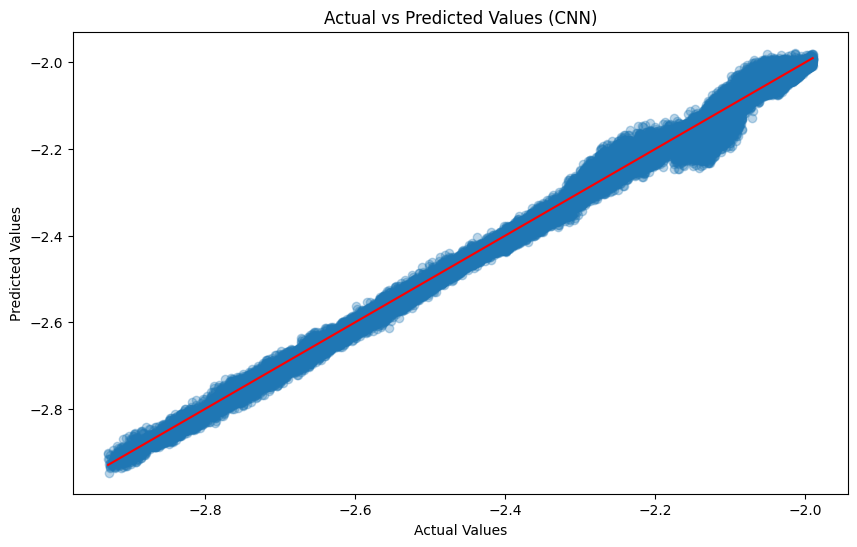

In [3]:
# Make predictions on the test set
start_time = time.time()
y_pred = model.predict(X_test_reshaped)
end_time = time.time()
test_time = end_time - start_time
print(f"Testing time: {test_time:.2f} seconds")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (CNN)')
plt.show()


## Feature Importance

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Feature 'mass': Importance Score = 0.031372481296940063
Feature 'z': Importance Score = 0.01533502027015745
Feature 'fov': Importance Score = 8.610799999731817e-05
Feature 'mlt': Importance Score = 5.8792073552051225e-05
Feature 'age': Importance Score = 0.1027337376014935
Feature 'teff': Importance Score = 0.02470641882683968
Feature 'lum': Importance Score = 0.0


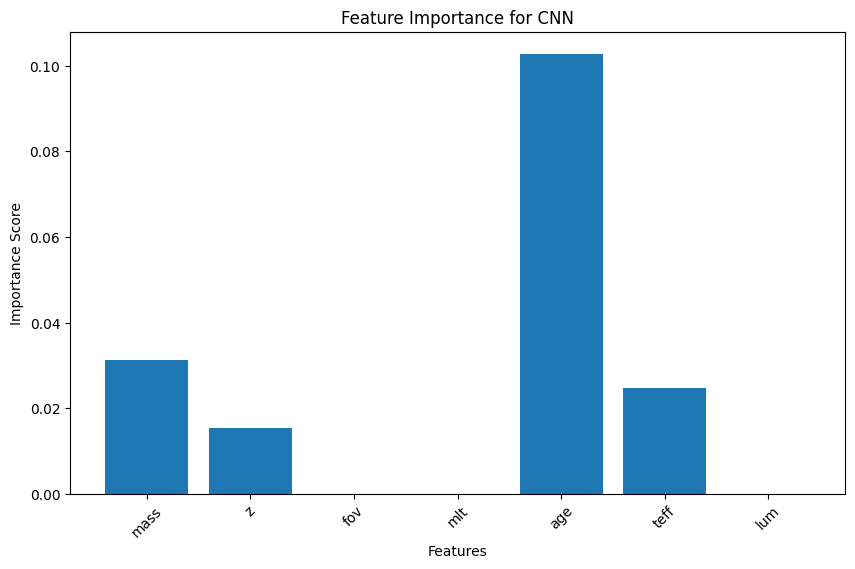

174/261 [===================>..........] - ETA: 0s

216/261 [=======================>......] - ETA: 0s

261/261 [==============================] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


  1/261 [..............................] - ETA: 3s

 44/261 [====>.........................] - ETA: 0s

 89/261 [=========>....................] - ETA: 0s

118/261 [============>.................] - ETA: 0s

164/261 [=================>............] - ETA: 0s

211/261 [=======================>......] - ETA: 0s

254/261 [============================>.] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


  1/261 [..............................] - ETA: 3s

 46/261 [====>.........................] - ETA: 0s

 86/261 [========>.....................] - ETA: 0s

132/261 [==============>...............] - ETA: 0s

176/261 [===================>..........] - ETA: 0s

220/261 [========================>.....] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


  1/261 [..............................] - ETA: 4s

 43/261 [===>..........................] - ETA: 0s

 82/261 [========>.....................] - ETA: 0s

128/261 [=============>................] - ETA: 0s

169/261 [==================>...........] - ETA: 0s

210/261 [=======================>......] - ETA: 0s

248/261 [===========================>..] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


  1/261 [..............................] - ETA: 3s

 45/261 [====>.........................] - ETA: 0s

 89/261 [=========>....................] - ETA: 0s

130/261 [=============>................] - ETA: 0s

149/261 [================>.............] - ETA: 0s

192/261 [=====================>........] - ETA: 0s

226/261 [========================>.....] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


Feature 'mass': Importance Score = 0.010909453834678152
Feature 'z': Importance Score = 0.016385731766265108
Feature 'fov': Importance Score = 6.16337381401194e-05
Feature 'mlt': Importance Score = 0.0001226048782817479
Feature 'age': Importance Score = 0.10707558548320675
Feature 'teff': Importance Score = 0.02032024334566176
Feature 'lum': Importance Score = 0.0


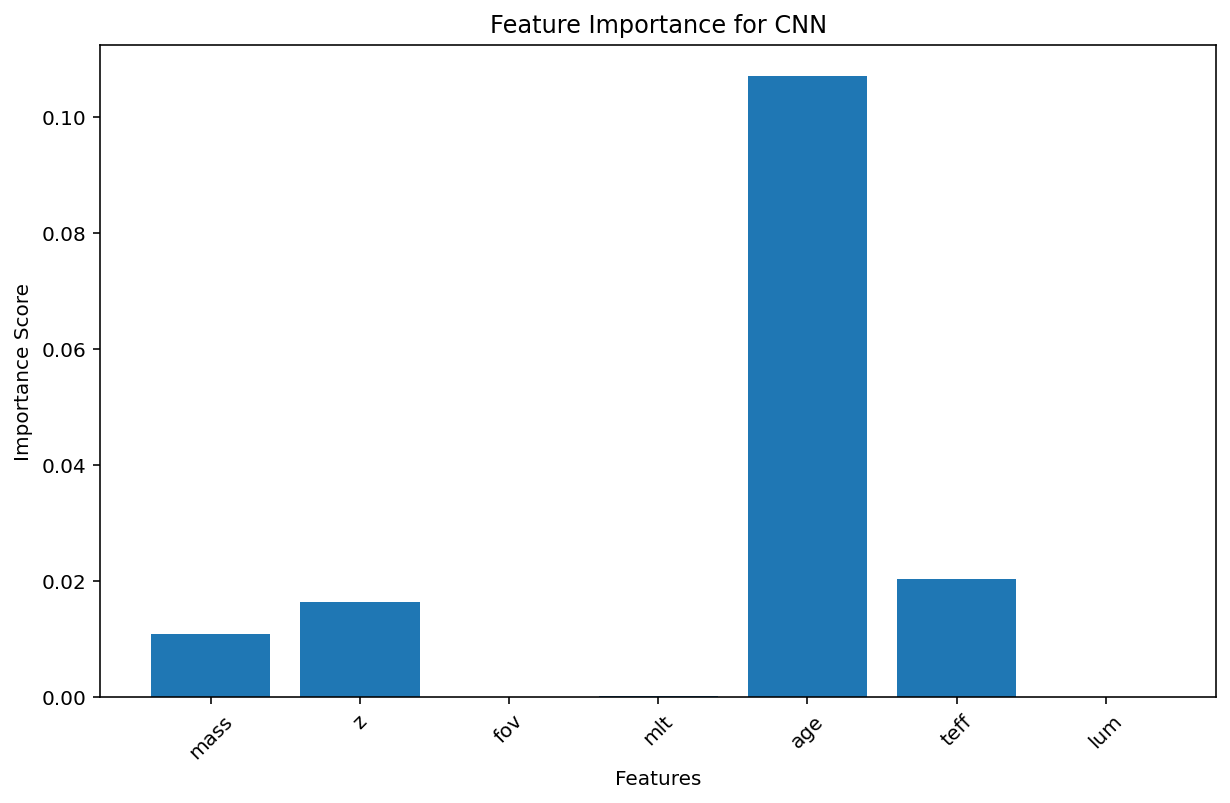

In [4]:
import matplotlib.pyplot as plt

def compute_feature_importance(model, X_test, y_test):
    # Compute baseline performance
    y_pred = model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    baseline_performance = mean_squared_error(y_test, y_pred)
    
    feature_importance = []
    
    for col in range(X_test.shape[1]):
        # Permute the feature
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, col])
        
        # Reshape the data for Conv1D input
        X_test_permuted_reshaped = X_test_permuted.reshape(-1, X_test_permuted.shape[1], 1)
        
        # Compute performance with permuted feature
        y_pred_permuted = model.predict(X_test_permuted_reshaped)
        permuted_performance = mean_squared_error(y_test, y_pred_permuted)
        
        # Calculate importance as the change in performance
        importance = permuted_performance - baseline_performance
        feature_importance.append(importance)
    
    return np.array(feature_importance)

# Assuming compute_feature_importance returns a list or array of importance scores
importance_scores = compute_feature_importance(model, X_test_scaled, y_test)

# Define the features, excluding 'age' as it does not have a corresponding importance score
features = ['mass', 'z','fov','mlt', 'age', 'teff', 'lum']

# Check if lengths match
if len(importance_scores) != len(features):
    print(f"Length of importance_scores: {len(importance_scores)}")
    print(f"Length of features: {len(features)}")
    raise ValueError("The lengths of importance_scores and features do not match.")

# Display the feature importance
for i, score in enumerate(importance_scores):
    print(f"Feature '{features[i]}': Importance Score = {score}")

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), importance_scores, tick_label=features)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for CNN')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()



## SHAP

In [5]:
# Install SHAP library
!pip install shap
import shap

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


W0000 00:00:1727546010.213049 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.238020 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.238599 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.239471 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.239930 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.240391 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.240842 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.241367 1642303 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1727546010.241900 1642303 gp

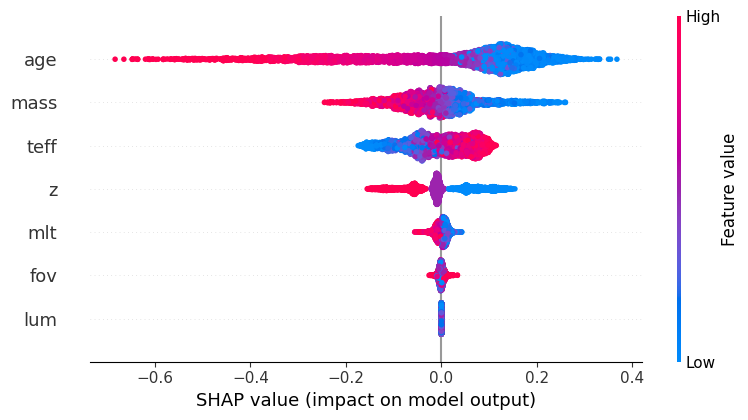

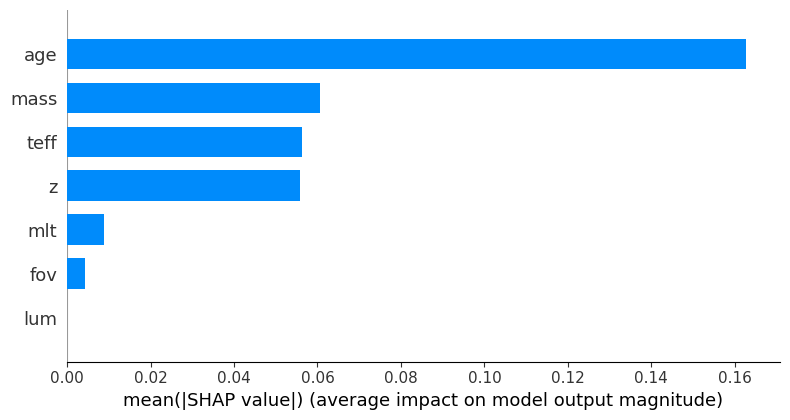

In [6]:

#===============================================================================
X_train_sample=pd.DataFrame(X_train_scaled).sample(n=5000, random_state=43).to_numpy()
X_test_sample=pd.DataFrame(X_test_scaled).sample(n=5000, random_state=45).to_numpy()
#===============================================================================

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train_sample)

# Get SHAP values for a subset of the test set
shap_values = explainer(X_test_sample)

# Plot feature importance bar chart
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")

